**중요도가 높을 것으로 예상되는 변수들:**

- **수집된 신선 난자 수**
    - 뚜렷한 분포 차이를 보임
    - 임신 성공 그룹이 더 많은 난자 수를 보임
    - 5-15개 정도의 적정 범위가 존재
- **미세주입된 난자 수**
    - 임신 성공과 양의 상관관계를 보임
    - 대부분 5-7개 구간에서 높은 빈도
- **미세주입에서 생성된 배아 수**
    - 임신 성공 그룹에서 확연히 높은 값을 보임
    - 매우 중요한 예측 변수로 판단됨
- **이식된 배아 수**
    - 대부분 1-3개 범위
    - 2개 이식이 가장 일반적
    - 성공 그룹이 약간 더 많은 수의 배아 이식 경향

**제한적이거나 사용이 어려울 것으로 보이는 변수들:**

- 해동 관련 변수들 (해동된 배아 수, 해동 난자 수 등)
    - 대부분 0값이며 매우 드문 케이스
    - 경과일 관련 변수들
    - 대부분 0에 집중됨
- 예측력이 매우 제한적일 것으로 예상
- PGD, PGS 시술 여부
    - 결측치가 너무 많아 사용이 제한적

**Feature Engineering 가능성이 있는 부분:**

- 배아 생성 효율성
    - (생성된 배아 수) / (미세주입된 난자 수)
    ```python
    # 배아 생성 효율성
     df['배아_생성_효율'] = df['미세주입에서 생성된 배아 수'] / df['미세주입된 난자 수']
    ```
- 난자 활용도
    - (미세주입된 난자 수) / (수집된 신선 난자 수)
    - 임상적으로 의미 있는 구간화
    - 특히 난자 수, 배아 수 등에서 적정 범위 기반 카테고리화
    ```python
    # 난자 활용도
    df['난자_활용도'] = df['미세주입된 난자 수'] / df['수집된 신선 난자 수']
    ```

## 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

plt.rc('font', family='AppleGothic') # MacOS용
# plt.rc('font', family='Malgun Gothic') # 윈도우 or 코랩

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
target = '임신 성공 여부'

In [4]:
print("=== Dataset Shapes ===")
print(f"Train 데이터셋 크기: {train.shape}")
print(f"Test 데이터셋 크기: {test.shape}\n")

=== Dataset Shapes ===
Train 데이터셋 크기: (256351, 69)
Test 데이터셋 크기: (90067, 68)



In [5]:
train.dtypes.value_counts()

float64    29
object     21
int64      19
Name: count, dtype: int64

In [6]:
train.describe().T

count      mean       std  min  25%  50%   75%   max
임신 시도 또는 마지막 임신 경과 연수    9370.0  9.270651  3.550313  0.0  7.0  9.0  11.0  20.0
배란 자극 여부               256351.0  0.771286  0.420005  0.0  1.0  1.0   1.0   1.0
단일 배아 이식 여부            250060.0  0.233476  0.423043  0.0  0.0  0.0   0.0   1.0
착상 전 유전 검사 사용 여부         2718.0  1.000000  0.000000  1.0  1.0  1.0   1.0   1.0
착상 전 유전 진단 사용 여부       250060.0  0.012781  0.112328  0.0  0.0  0.0   0.0   1.0
남성 주 불임 원인             256351.0  0.028516  0.166441  0.0  0.0  0.0   0.0   1.0
남성 부 불임 원인             256351.0  0.013115  0.113767  0.0  0.0  0.0   0.0   1.0
여성 주 불임 원인             256351.0  0.030724  0.172568  0.0  0.0  0.0   0.0   1.0
여성 부 불임 원인             256351.0  0.012432  0.110805  0.0  0.0  0.0   0.0   1.0
부부 주 불임 원인             256351.0  0.033068  0.178814  0.0  0.0  0.0   0.0   1.0
부부 부 불임 원인             256351.0  0.008765  0.093212  0.0  0.0  0.0   0.0   1.0
불명확 불임 원인              256351.0  0.250730  0.433434  0.0  0.0  0.0   1.0   1.0
불임 원인 - 난관 질환          256351.0  0.138704  0.345638  0.0  0.0  0.0   0.0   1.0
불임 원인 - 남성 요인          256351.0  0.372403  0.483446  0.0  0.0  0.0   1.0   1.0
불임 원인 - 배란 장애          256351.0  0.130392  0.336734  0.0  0.0  0.0   0.0   1.0
불임 원인 - 여성 요인          256351.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
불임 원인 - 자궁경부 문제        256351.0  0.000039  0.006246  0.0  0.0  0.0   0.0   1.0
불임 원인 - 자궁내막증          256351.0  0.071394  0.257483  0.0  0.0  0.0   0.0   1.0
불임 원인 - 정자 농도          256351.0  0.001077  0.032795  0.0  0.0  0.0   0.0   1.0
불임 원인 - 정자 면역학적 요인     256351.0  0.000004  0.001975  0.0  0.0  0.0   0.0   1.0
불임 원인 - 정자 운동성         256351.0  0.000378  0.019449  0.0  0.0  0.0   0.0   1.0
불임 원인 - 정자 형태          256351.0  0.000558  0.023612  0.0  0.0  0.0   0.0   1.0
총 생성 배아 수              250060.0  5.061145  4.664337  0.0  1.0  4.0   8.0  51.0
미세주입된 난자 수             250060.0  4.170799  5.625943  0.0  0.0  0.0   7.0  51.0
미세주입에서 생성된 배아 수        250060.0  2.843650  4.094640  0.0  0.0  0.0   5.0  43.0
이식된 배아 수               250060.0  1.368156  0.771961  0.0  1.0  1.0   2.0   3.0
미세주입 배아 이식 수           250060.0  0.724718  0.894352  0.0  0.0  0.0   2.0   3.0
저장된 배아 수               250060.0  1.185975  2.502318  0.0  0.0  0.0   2.0  51.0
미세주입 후 저장된 배아 수        250060.0  0.612933  1.842522  0.0  0.0  0.0   0.0  51.0
해동된 배아 수               250060.0  0.454571  1.415320  0.0  0.0  0.0   0.0  32.0
해동 난자 수                250060.0  0.046401  0.688246  0.0  0.0  0.0   0.0  36.0
수집된 신선 난자 수            250060.0  8.563717  7.317230  0.0  2.0  8.0  13.0  51.0
저장된 신선 난자 수            250060.0  0.093418  1.105882  0.0  0.0  0.0   0.0  51.0
혼합된 난자 수               250060.0  7.698928  6.451914  0.0  3.0  7.0  11.0  51.0
파트너 정자와 혼합된 난자 수       250060.0  7.107326  6.532466  0.0  0.0  6.0  11.0  51.0
기증자 정자와 혼합된 난자 수       250060.0  0.534728  2.509487  0.0  0.0  0.0   0.0  50.0
동결 배아 사용 여부            250060.0  0.160465  0.367038  0.0  0.0  0.0   0.0   1.0
신선 배아 사용 여부            250060.0  0.840342  0.366289  0.0  1.0  1.0   1.0   1.0
기증 배아 사용 여부            250060.0  0.009830  0.098656  0.0  0.0  0.0   0.0   1.0
대리모 여부                 250060.0  0.004195  0.064633  0.0  0.0  0.0   0.0   1.0
PGD 시술 여부                2179.0  1.000000  0.000000  1.0  1.0  1.0   1.0   1.0
PGS 시술 여부                1929.0  1.000000  0.000000  1.0  1.0  1.0   1.0   1.0
난자 채취 경과일              198863.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
난자 해동 경과일                1436.0  0.001393  0.037307  0.0  0.0  0.0   0.0   1.0
난자 혼합 경과일              202616.0  0.005385  0.111504  0.0  0.0  0.0   0.0   7.0
배아 이식 경과일              212785.0  3.254741  1.715697  0.0  2.0  3.0   5.0   7.0
배아 해동 경과일               40369.0  0.045629  0.418672  0.0  0.0  0.0   0.0   7.0
임신 성공 여부               256351.0  0.258349  0.437728  0.0  0.0  0.0   1.0   1.0

다시 시작함

In [7]:
columns_dict = {
    "시술 정보": [
        "시술 시기 코드", "시술 당시 나이", "임신 시도 또는 마지막 임신 경과 연수",
        "시술 유형", "특정 시술 유형"
    ],
    "배란 및 배아 관련": [
        "배란 자극 여부", "배란 유도 유형", "단일 배아 이식 여부",
        "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부"
    ],
    "불임 원인": [
        "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
        "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인",
        "불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애",
        "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
        "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성",
        "불임 원인 - 정자 형태"
    ],
    "시술 횟수": [
        "배아 생성 주요 이유", "총 시술 횟수", "클리닉 내 총 시술 횟수",
        "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수",
        "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수",
        "IVF 출산 횟수", "DI 출산 횟수"
    ],
    "배아 및 난자 관련": [
        "총 생성 배아 수", "미세주입된 난자 수", "미세주입에서 생성된 배아 수",
        "이식된 배아 수", "미세주입 배아 이식 수", "저장된 배아 수",
        "미세주입 후 저장된 배아 수", "해동된 배아 수", "해동 난자 수",
        "수집된 신선 난자 수", "저장된 신선 난자 수",
        "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "기증자 정자와 혼합된 난자 수"
    ],
    "난자 및 정자 출처": [
        "난자 출처", "정자 출처", "난자 기증자 나이", "정자 기증자 나이"
    ],
    "특수 시술": [
        "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부",
        "대리모 여부", "PGD 시술 여부", "PGS 시술 여부"
    ],
    "시술 진행 과정": [
        "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일",
        "배아 이식 경과일", "배아 해동 경과일"
    ]
}

# EDA

## 1. **시술 정보 관련 컬럼**
* 시술 시기 코드
* 시술 당시 나이
* 임신 시도 또는 마지막 임신 경과 연수
* 시술 유형
* 특정 시술 유형

In [8]:
surgery_info = train[columns_dict['시술 정보']]
# 컬럼명 출력
print("\n📌 [시술 정보 컬럼 목록]")
print(", ".join(surgery_info.columns))

# 데이터 타입 출력
print("\n📌 [시술 정보 컬럼별 데이터 타입]")
print(surgery_info.dtypes)  # to_string() 사용해서 보기 좋게 출력

# 결측치 개수 출력 (비율 포함)
missing_values = surgery_info.isnull().sum()
missing_percent = (missing_values / len(surgery_info)) * 100

print("\n📌 [시술 정보 결측치 개수 및 비율]")
print(pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_percent}).to_string())



📌 [시술 정보 컬럼 목록]
시술 시기 코드, 시술 당시 나이, 임신 시도 또는 마지막 임신 경과 연수, 시술 유형, 특정 시술 유형

📌 [시술 정보 컬럼별 데이터 타입]
시술 시기 코드                  object
시술 당시 나이                  object
임신 시도 또는 마지막 임신 경과 연수    float64
시술 유형                     object
특정 시술 유형                  object
dtype: object

📌 [시술 정보 결측치 개수 및 비율]
                       결측치 개수  결측치 비율(%)
시술 시기 코드                    0   0.000000
시술 당시 나이                    0   0.000000
임신 시도 또는 마지막 임신 경과 연수  246981  96.344855
시술 유형                       0   0.000000
특정 시술 유형                    2   0.000780


<Figure size 1000x500 with 0 Axes>

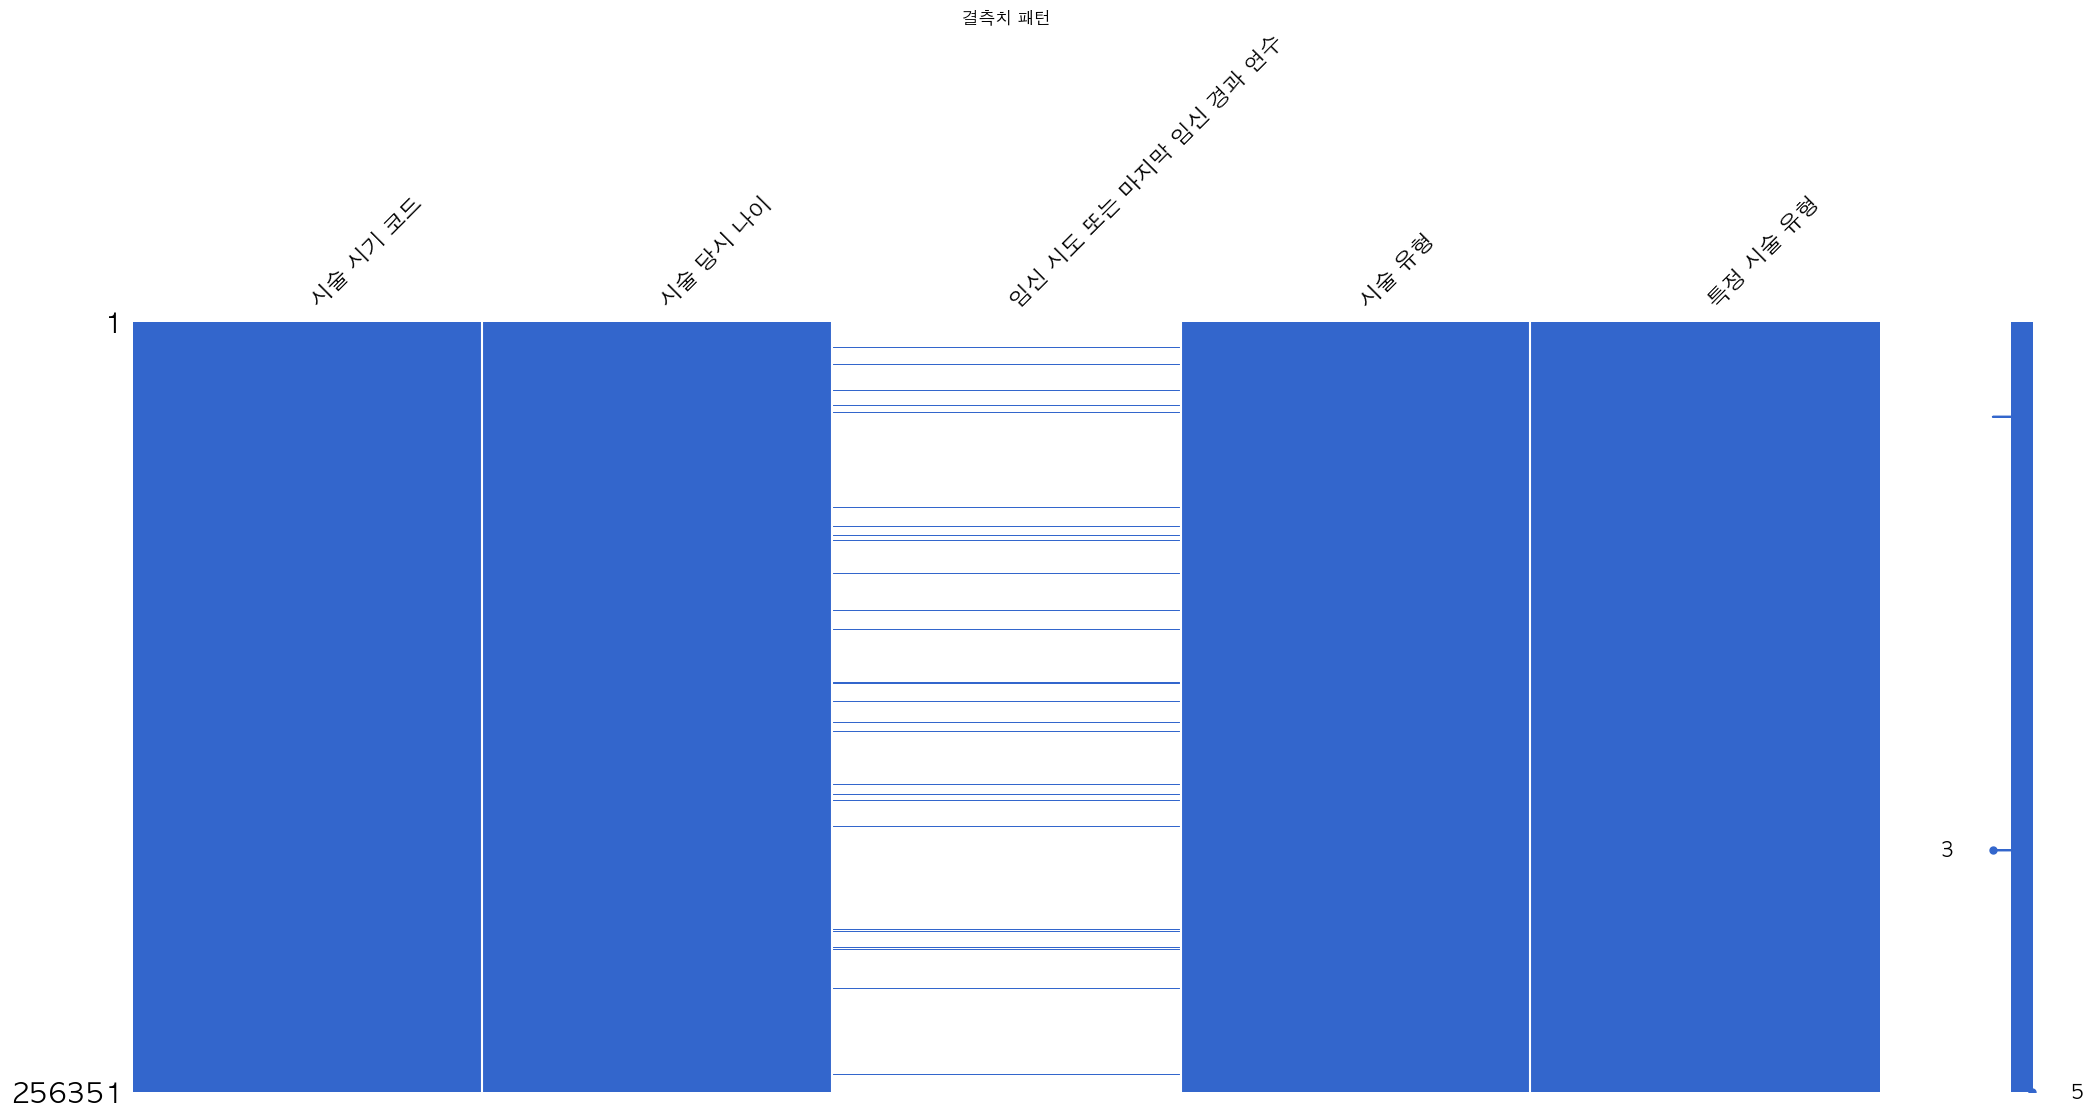

In [9]:
# 📌 3️⃣ 결측치 행렬 그래프
plt.figure(figsize=(10, 5))
msno.matrix(surgery_info, color=(0.2, 0.4, 0.8))  # 결측치를 색상으로 표현
plt.title("결측치 패턴")
plt.show()

In [10]:
# 결측치가 특정 행에서 많이 발생하는지 확인
print(surgery_info.isnull().sum().sort_values(ascending=False))

임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
시술 시기 코드                      0
시술 당시 나이                      0
시술 유형                         0
dtype: int64


In [11]:
# 결측치가 있는 행을 출력해서 패턴 확인
print(surgery_info[surgery_info.isnull().any(axis=1)].head())

  시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형
0   TRZKPL  만18-34세                    NaN   IVF     ICSI
1   TRYBLT  만45-50세                    NaN   IVF     ICSI
2   TRVNRY  만18-34세                    NaN   IVF      IVF
3   TRJXFG  만35-37세                    NaN   IVF     ICSI
4   TRVNRY  만18-34세                    NaN   IVF     ICSI


In [12]:
surgery_info.describe(include='all').T

count unique      top    freq      mean       std  \
시술 시기 코드               256351      7   TRDQAZ   38969       NaN       NaN   
시술 당시 나이               256351      7  만18-34세  102476       NaN       NaN   
임신 시도 또는 마지막 임신 경과 연수  9370.0    NaN      NaN     NaN  9.270651  3.550313   
시술 유형                  256351      2      IVF  250060       NaN       NaN   
특정 시술 유형               256349     24     ICSI  122368       NaN       NaN   

                       min  25%  50%   75%   max  
시술 시기 코드               NaN  NaN  NaN   NaN   NaN  
시술 당시 나이               NaN  NaN  NaN   NaN   NaN  
임신 시도 또는 마지막 임신 경과 연수  0.0  7.0  9.0  11.0  20.0  
시술 유형                  NaN  NaN  NaN   NaN   NaN  
특정 시술 유형               NaN  NaN  NaN   NaN   NaN

In [13]:
surgery_info["임신 성공 여부"] = train["임신 성공 여부"]

/var/folders/ff/gt7xnldx7fd17_99cwr9mmk00000gn/T/ipykernel_16071/770158686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surgery_info["임신 성공 여부"] = train["임신 성공 여부"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

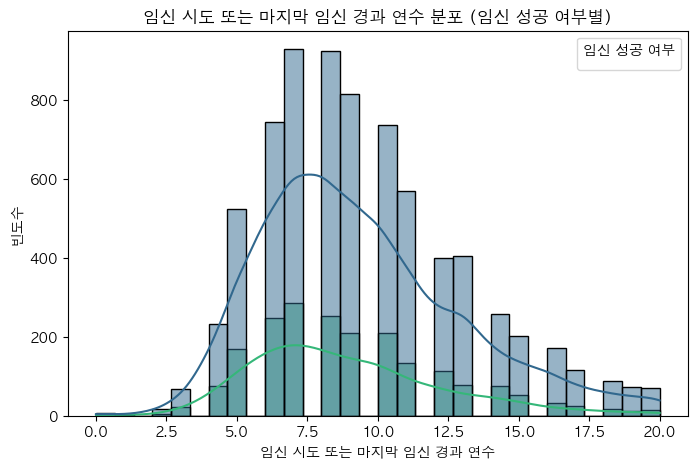

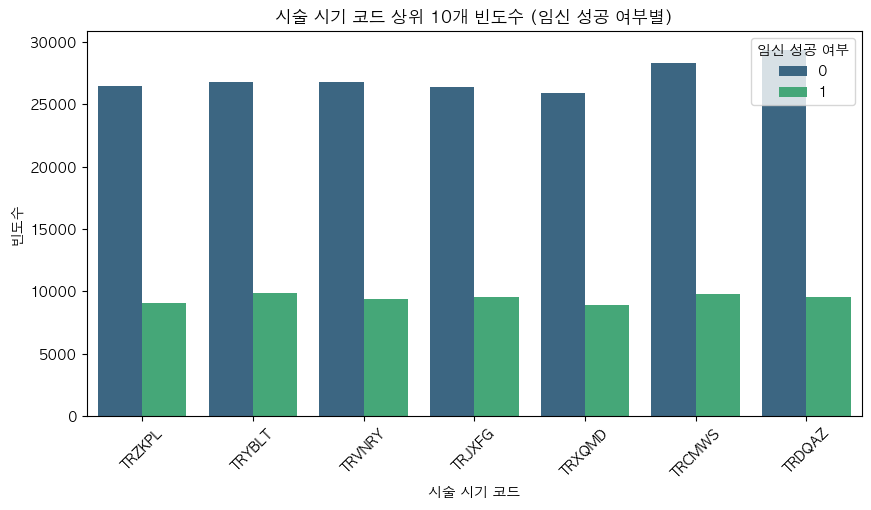

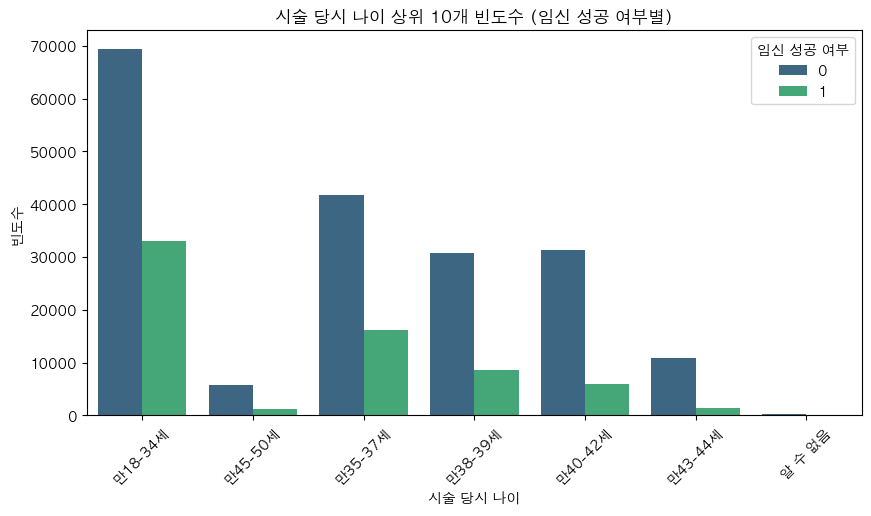

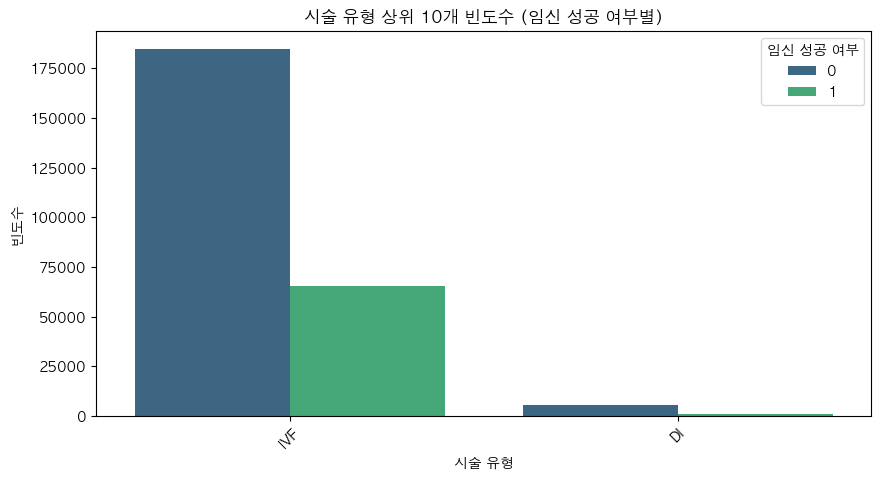

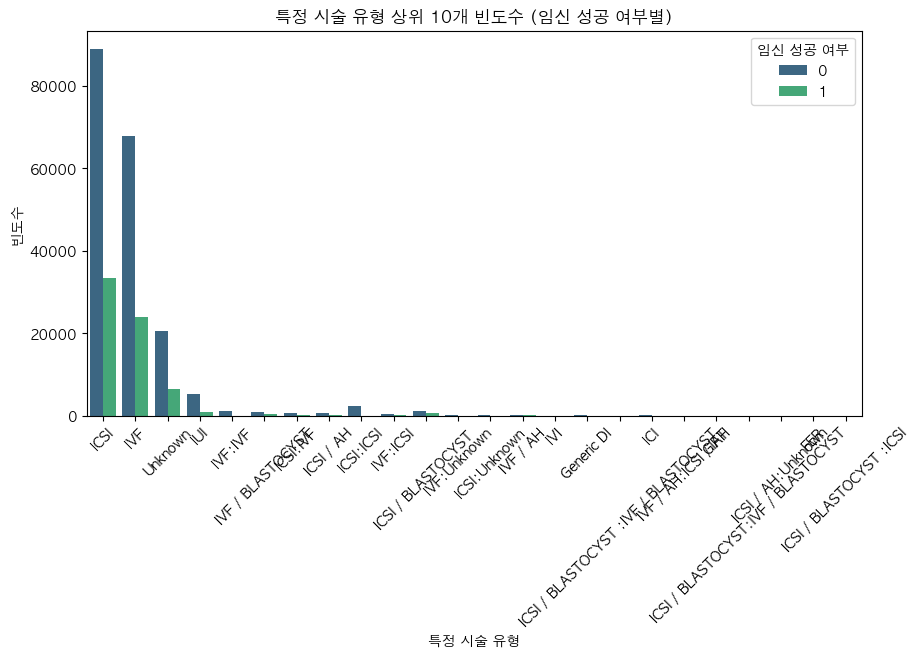

In [34]:
# 1. 수치형 데이터 기술 통계 분석
numeric_columns = surgery_info.select_dtypes(include=['number']).columns.drop(labels=[target])
surgery_numeric_stats = surgery_info[numeric_columns].describe()

# 2. 범주형 데이터 빈도수 분석
categorical_columns = surgery_info.select_dtypes(include=['object']).columns
categorical_counts = {col: surgery_info[col].value_counts() for col in categorical_columns}

plt.figure(figsize=(12, 6))
for col in numeric_columns:
    if col == '임신 성공 여부':
        continue
    plt.figure(figsize=(8, 5))
    sns.histplot(data=surgery_info, x=col, hue="임신 성공 여부", kde=True, bins=30, palette="viridis")
    plt.title(f"{col} 분포 (임신 성공 여부별)")
    plt.xlabel(col)
    plt.ylabel("빈도수")
    plt.legend(title="임신 성공 여부")
    plt.show()

# 4. 범주형 데이터 빈도수 시각화 (임신 성공 여부별) - `countplot()` 사용
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=surgery_info, x=col, hue="임신 성공 여부", palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{col} 상위 10개 빈도수 (임신 성공 여부별)")
    plt.xlabel(col)
    plt.ylabel("빈도수")
    plt.legend(title="임신 성공 여부")
    plt.show()

<Figure size 1200x600 with 0 Axes>

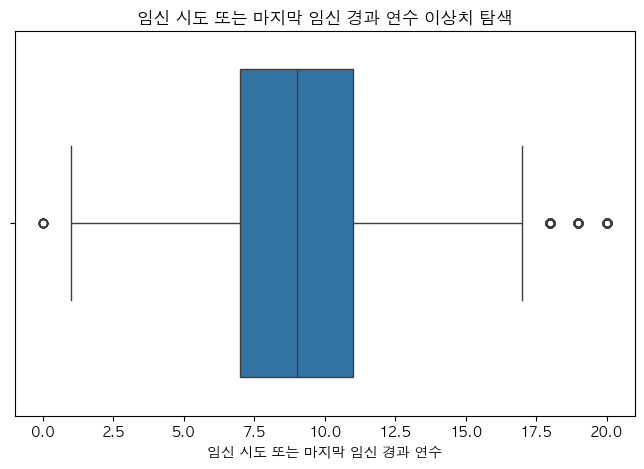

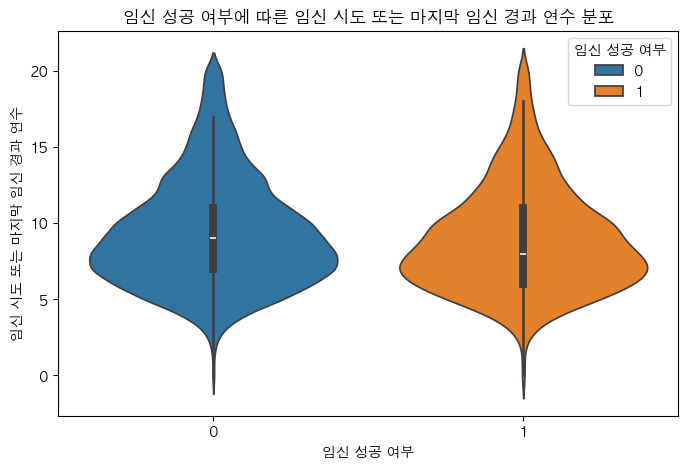

In [37]:
# 박스플롯을 이용한 이상치 탐색
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=surgery_info, x=col)
    plt.title(f"{col} 이상치 탐색")
    plt.xlabel(col)
    plt.show()

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=surgery_info, x='임신 성공 여부', y=col, hue='임신 성공 여부')
    plt.title(f'임신 성공 여부에 따른 {col} 분포')
    plt.show()

바이올린 플롯을 봤을 때 유사한 그래프를 가짐.
&Rightarrow; 임신 성공여부랑 크게 관련이 없나?

## 2. 배란 및 배아 관련 컬럼
* 배란 자극 여부
* 배란 유도 유형
* 단일 배아 이식 여부
* 착상 전 유전 검사 사용 여부
* 착상 전 유전 진단 사용 여부

여기 numerical 데이터는 다 binary 임.

`배란 자극 여부`

`단일 배아 이식 여부`

`착상 전 유전 검사 사용 여부` = 결측치 많음

`착상 전 유전 진단 사용 여부`

---
`배란 유도 유형`
  * 기록되지 않은 시행 + 알 수 없음이 대부분. &Rightarrow; 필요없는 데이터 아님?


📌 [배란 및 배아 관련 컬럼 목록]
배란 자극 여부, 배란 유도 유형, 단일 배아 이식 여부, 착상 전 유전 검사 사용 여부, 착상 전 유전 진단 사용 여부

📌 [배란 및 배아 관련 컬럼별 데이터 타입]
배란 자극 여부              int64
배란 유도 유형             object
단일 배아 이식 여부         float64
착상 전 유전 검사 사용 여부    float64
착상 전 유전 진단 사용 여부    float64
dtype: object

📌 [배란 및 배아 관련 결측치 개수 및 비율]
                  결측치 개수  결측치 비율(%)
배란 자극 여부               0   0.000000
배란 유도 유형               0   0.000000
단일 배아 이식 여부         6291   2.454057
착상 전 유전 검사 사용 여부  253633  98.939735
착상 전 유전 진단 사용 여부    6291   2.454057

📌 [배란 및 배아 관련 컬럼별 Unique Values]

배란 자극 여부:
- Unique 값 개수: 2
- Unique 값 목록: [1 0]
- 값별 빈도수:
배란 자극 여부
1    197720
0     58631
--------------------------------------------------

배란 유도 유형:
- Unique 값 개수: 4
- Unique 값 목록: ['기록되지 않은 시행' '알 수 없음' '세트로타이드 (억제제)' '생식선 자극 호르몬']
- 값별 빈도수:
배란 유도 유형
기록되지 않은 시행      194432
알 수 없음           61917
세트로타이드 (억제제)         1
생식선 자극 호르몬           1
--------------------------------------------------

단일 배아 이식 여부:
- Unique 값 개수: 2
- Unique 값 목록: [ 0. 

<Figure size 1000x500 with 0 Axes>

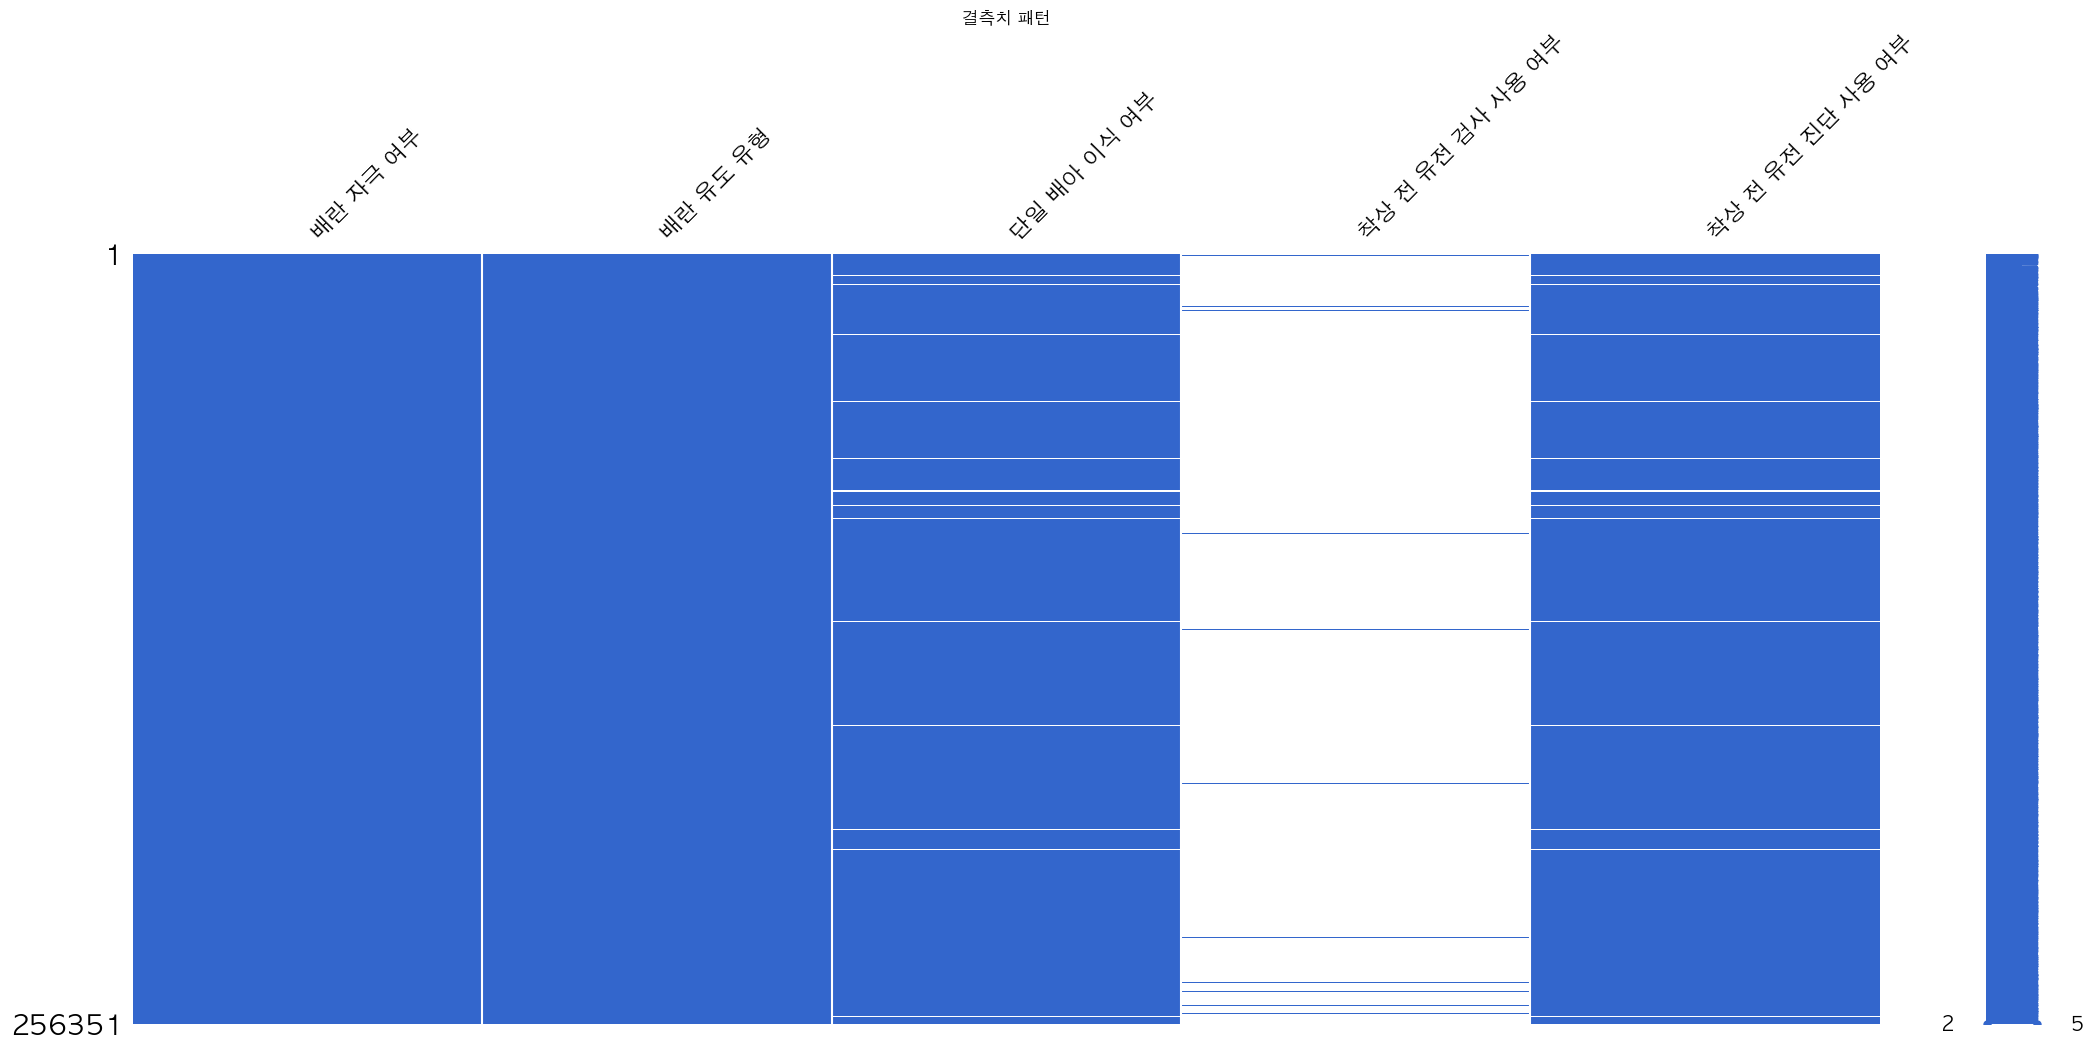

In [30]:
ovulation_info = train[columns_dict['배란 및 배아 관련']]

# 컬럼명 출력
print("\n📌 [배란 및 배아 관련 컬럼 목록]")
print(", ".join(ovulation_info.columns))

# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(ovulation_info.dtypes)

# 결측치 개수 출력 (비율 포함)
missing_values = ovulation_info.isnull().sum()
missing_percent = (missing_values / len(ovulation_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())

# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in ovulation_info.columns:
    n_unique = ovulation_info[col].nunique()
    unique_values = ovulation_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    print(f"- 값별 빈도수:")
    print(ovulation_info[col].value_counts().to_string())
    print("-" * 50)

# 📌 3️⃣ 결측치 행렬 그래프
plt.figure(figsize=(10, 5))
msno.matrix(ovulation_info, color=(0.2, 0.4, 0.8))  # 결측치를 색상으로 표현
plt.title("결측치 패턴")
plt.show()

In [27]:
ovulation_info = train[columns_dict['배란 및 배아 관련']].copy()
ovulation_info["임신 성공 여부"] = train["임신 성공 여부"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

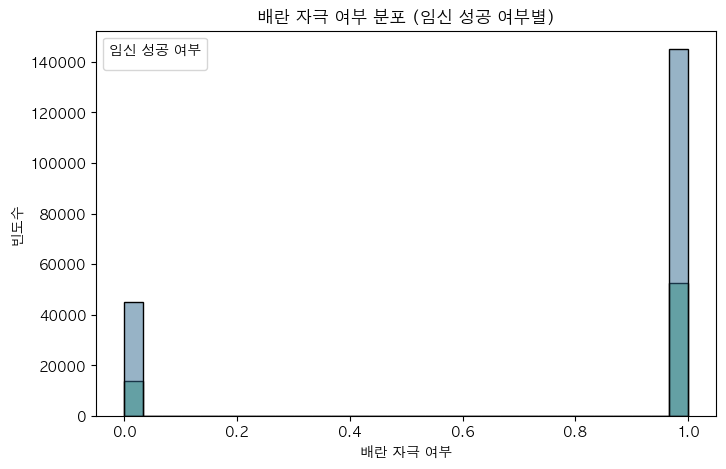

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


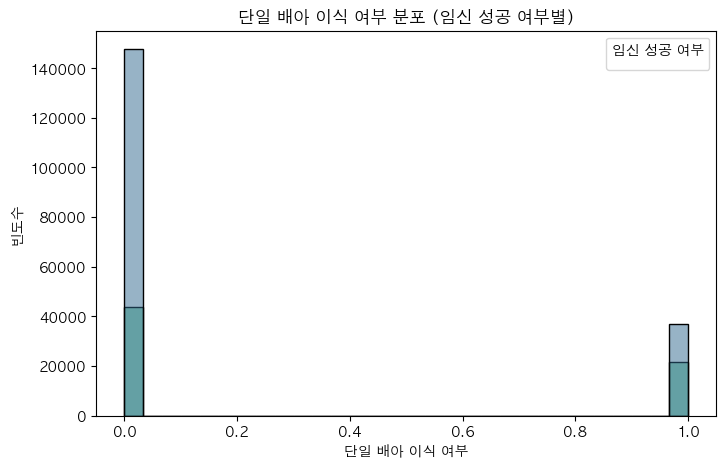

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


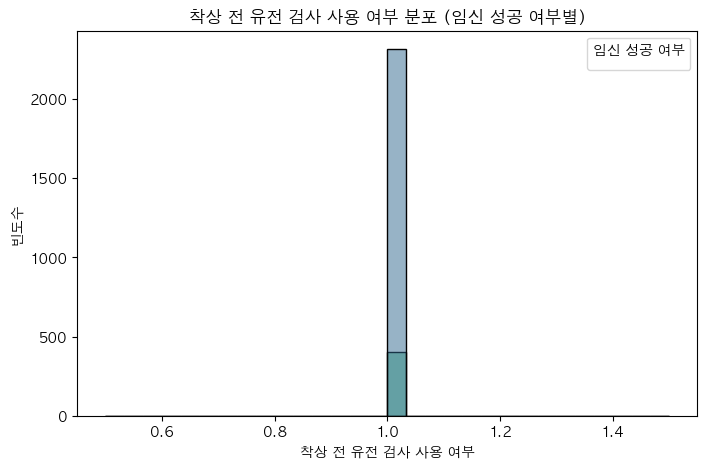

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


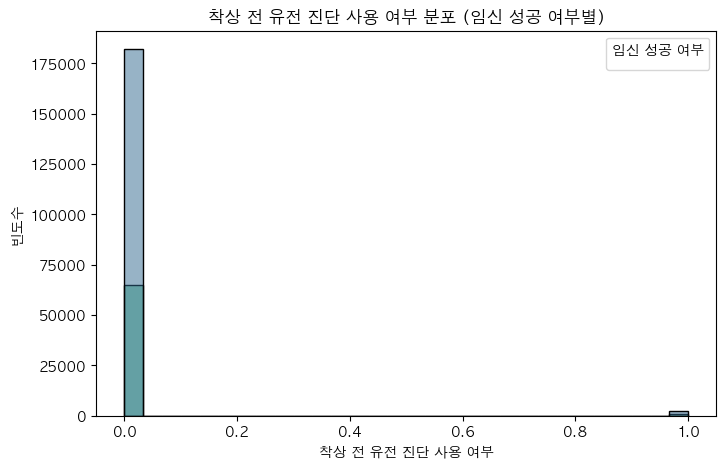

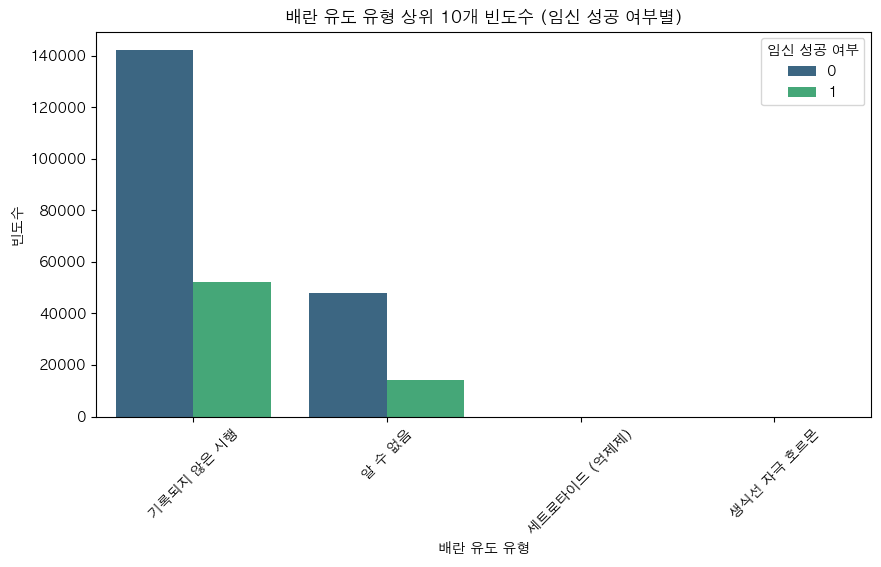

In [ ]:
# 1. 수치형 데이터 기술 통계 분석
numeric_columns = ovulation_info.select_dtypes(include=['number']).columns.drop(labels=[target])
surgery_numeric_stats = ovulation_info[numeric_columns].describe()

# 2. 범주형 데이터 빈도수 분석
categorical_columns = ovulation_info.select_dtypes(include=['object']).columns
categorical_counts = {col: ovulation_info[col].value_counts() for col in categorical_columns}

plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=ovulation_info, x=col, hue="임신 성공 여부", bins=30, palette="viridis")
    plt.title(f"{col} 분포 (임신 성공 여부별)")
    plt.xlabel(col)
    plt.ylabel("빈도수")
    plt.legend(title="임신 성공 여부")
    plt.show()

# 4. 범주형 데이터 빈도수 시각화 (임신 성공 여부별) - `countplot()` 사용
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=ovulation_info, x=col, hue="임신 성공 여부", palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{col} 상위 10개 빈도수 (임신 성공 여부별)")
    plt.xlabel(col)
    plt.ylabel("빈도수")
    plt.legend(title="임신 성공 여부")
    plt.show()

이진변수는 이상치 탐색 필요없음

## 3. 불임 원인 관련 컬럼
* 남성 주 불임 원인
* 남성 부 불임 원인
* 여성 주 불임 원인
* 여성 부 불임 원인
* 부부 주 불임 원인
* 부부 부 불임 원인
* 불명확 불임 원인
* 불임 원인 - 난관 질환
* 불임 원인 - 남성 요인
* 불임 원인 - 배란 장애
* 불임 원인 - 여성 요인
* 불임 원인 - 자궁경부 문제
* 불임 원인 - 자궁내막증
* 불임 원인 - 정자 농도
* 불임 원인 - 정자 면역학적 요인
* 불임 원인 - 정자 운동성
* 불임 원인 - 정자 형태

데이터 왤케 많냐..

* 모두 다 `int64` 타입, 결측치 없음, 모두 다 이진변수임.

In [124]:
infertility_info = train[columns_dict['불임 원인']].copy()

# 컬럼명 출력
print("\n📌 [배란 및 배아 관련 컬럼 목록]")
print(", ".join(infertility_info.columns))

# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(infertility_info.dtypes)


📌 [배란 및 배아 관련 컬럼 목록]
남성 주 불임 원인, 남성 부 불임 원인, 여성 주 불임 원인, 여성 부 불임 원인, 부부 주 불임 원인, 부부 부 불임 원인, 불명확 불임 원인, 불임 원인 - 난관 질환, 불임 원인 - 남성 요인, 불임 원인 - 배란 장애, 불임 원인 - 여성 요인, 불임 원인 - 자궁경부 문제, 불임 원인 - 자궁내막증, 불임 원인 - 정자 농도, 불임 원인 - 정자 면역학적 요인, 불임 원인 - 정자 운동성, 불임 원인 - 정자 형태

📌 [배란 및 배아 관련 컬럼별 데이터 타입]
남성 주 불임 원인            int64
남성 부 불임 원인            int64
여성 주 불임 원인            int64
여성 부 불임 원인            int64
부부 주 불임 원인            int64
부부 부 불임 원인            int64
불명확 불임 원인             int64
불임 원인 - 난관 질환         int64
불임 원인 - 남성 요인         int64
불임 원인 - 배란 장애         int64
불임 원인 - 여성 요인         int64
불임 원인 - 자궁경부 문제       int64
불임 원인 - 자궁내막증         int64
불임 원인 - 정자 농도         int64
불임 원인 - 정자 면역학적 요인    int64
불임 원인 - 정자 운동성        int64
불임 원인 - 정자 형태         int64
dtype: object


In [125]:
# 결측치 개수 출력 (비율 포함)
missing_values = infertility_info.isnull().sum()
missing_percent = (missing_values / len(infertility_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())


📌 [배란 및 배아 관련 결측치 개수 및 비율]
                    결측치 개수  결측치 비율(%)
남성 주 불임 원인               0        0.0
남성 부 불임 원인               0        0.0
여성 주 불임 원인               0        0.0
여성 부 불임 원인               0        0.0
부부 주 불임 원인               0        0.0
부부 부 불임 원인               0        0.0
불명확 불임 원인                0        0.0
불임 원인 - 난관 질환            0        0.0
불임 원인 - 남성 요인            0        0.0
불임 원인 - 배란 장애            0        0.0
불임 원인 - 여성 요인            0        0.0
불임 원인 - 자궁경부 문제          0        0.0
불임 원인 - 자궁내막증            0        0.0
불임 원인 - 정자 농도            0        0.0
불임 원인 - 정자 면역학적 요인       0        0.0
불임 원인 - 정자 운동성           0        0.0
불임 원인 - 정자 형태            0        0.0


In [126]:
# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in infertility_info.columns:
    n_unique = infertility_info[col].nunique()
    unique_values = infertility_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    print(f"- 값별 빈도수:")
    print(infertility_info[col].value_counts().to_string())
    print("-" * 50)


📌 [배란 및 배아 관련 컬럼별 Unique Values]

남성 주 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
남성 주 불임 원인
0    249041
1      7310
--------------------------------------------------

남성 부 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
남성 부 불임 원인
0    252989
1      3362
--------------------------------------------------

여성 주 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
여성 주 불임 원인
0    248475
1      7876
--------------------------------------------------

여성 부 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
여성 부 불임 원인
0    253164
1      3187
--------------------------------------------------

부부 주 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
부부 주 불임 원인
0    247874
1      8477
--------------------------------------------------

부부 부 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
부부 부 불임 원인
0    254104
1      2247
--------------------------------------------------

불명확 불임 원인:
- Unique 값 개수: 2
- Unique 값 목록: [0 1]
- 값별 빈도수:
불명확 불임 원인
0    192076
1 

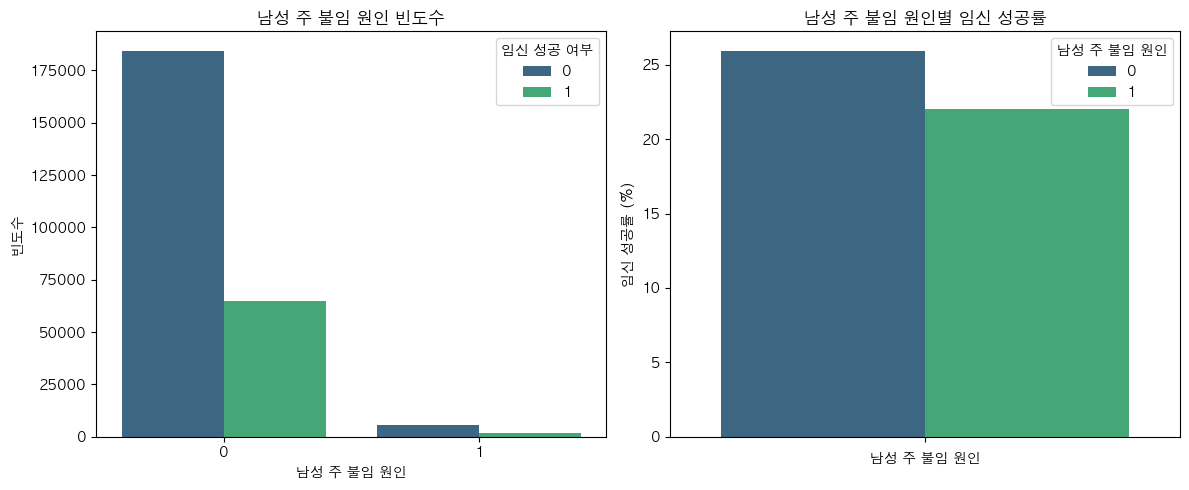


=== 남성 주 불임 원인 ===

값별 통계:
             count   mean
남성 주 불임 원인               
0           249041  25.95
1             7310  22.00

교차표 (%):
임신 성공 여부            0          1
남성 주 불임 원인                      
0           74.052465  25.947535
1           78.002736  21.997264


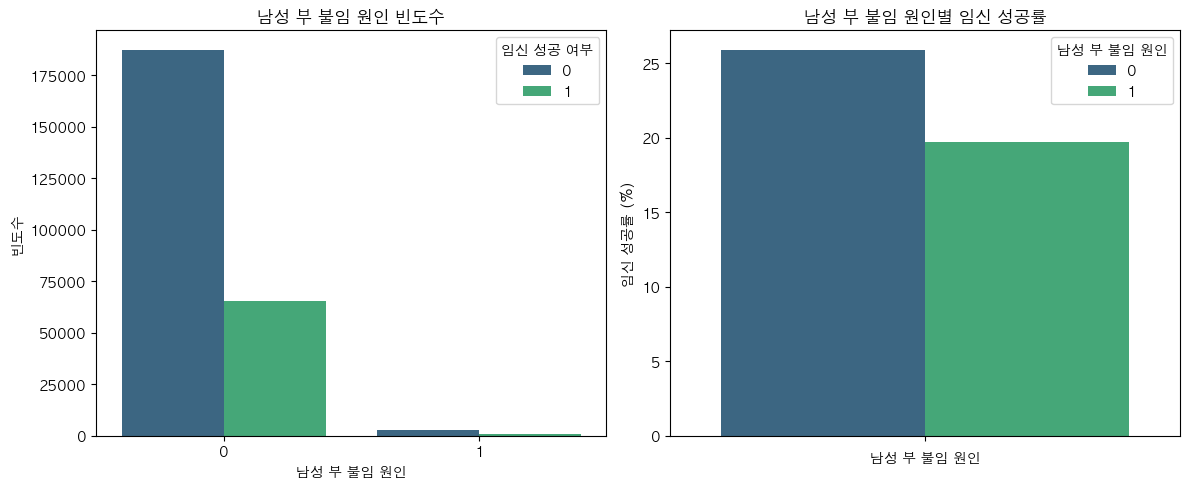


=== 남성 부 불임 원인 ===

값별 통계:
             count   mean
남성 부 불임 원인               
0           252989  25.92
1             3362  19.75

교차표 (%):
임신 성공 여부            0          1
남성 부 불임 원인                      
0           74.084249  25.915751
1           80.249851  19.750149


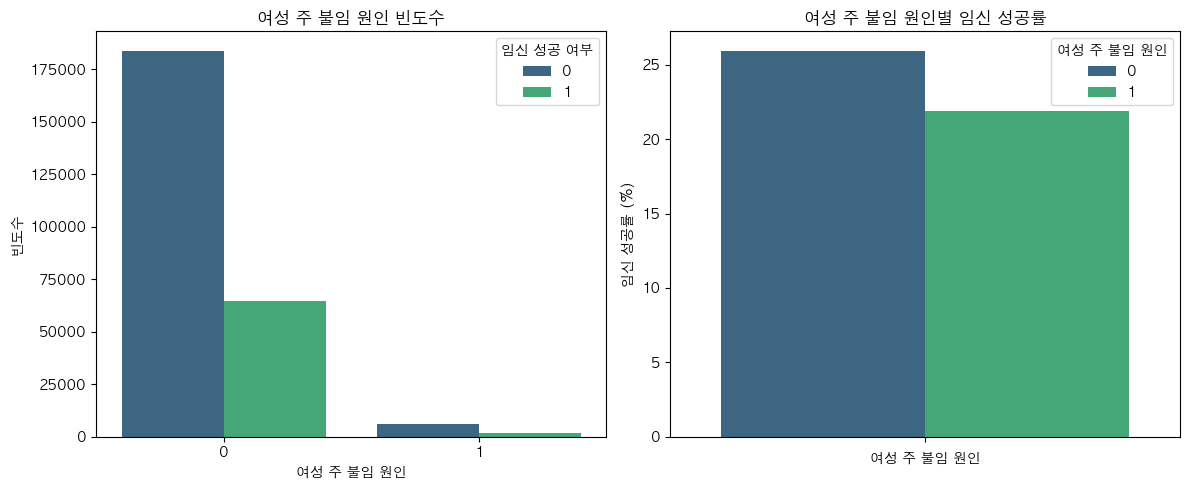


=== 여성 주 불임 원인 ===

값별 통계:
             count   mean
여성 주 불임 원인               
0           248475  25.96
1             7876  21.91

교차표 (%):
임신 성공 여부            0          1
여성 주 불임 원인                      
0           74.040849  25.959151
1           78.085322  21.914678


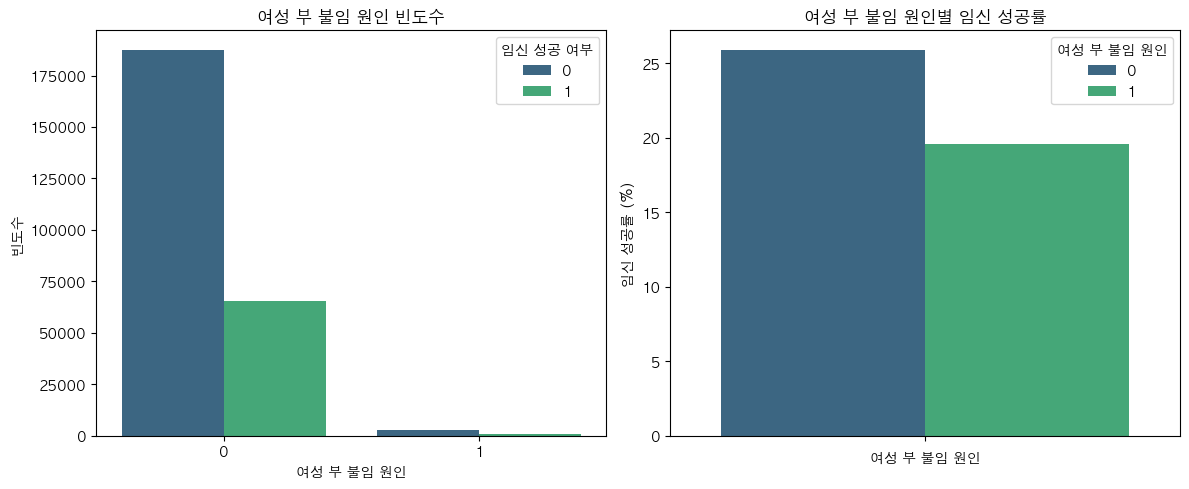


=== 여성 부 불임 원인 ===

값별 통계:
             count   mean
여성 부 불임 원인               
0           253164  25.91
1             3187  19.58

교차표 (%):
임신 성공 여부            0          1
여성 부 불임 원인                      
0           74.086363  25.913637
1           80.420458  19.579542


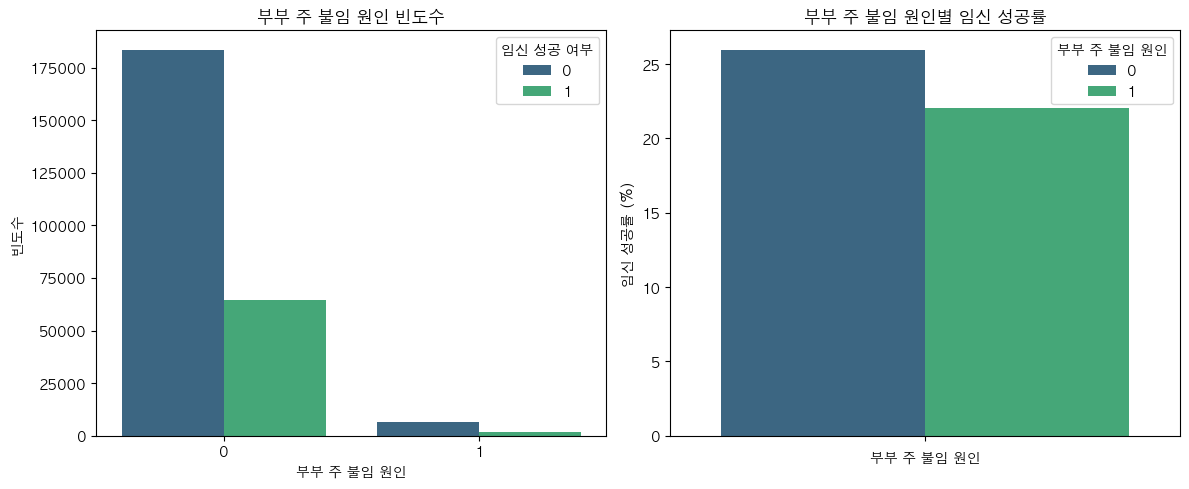


=== 부부 주 불임 원인 ===

값별 통계:
             count   mean
부부 주 불임 원인               
0           247874  25.97
1             8477  22.02

교차표 (%):
임신 성공 여부            0          1
부부 주 불임 원인                      
0           74.034792  25.965208
1           77.975699  22.024301


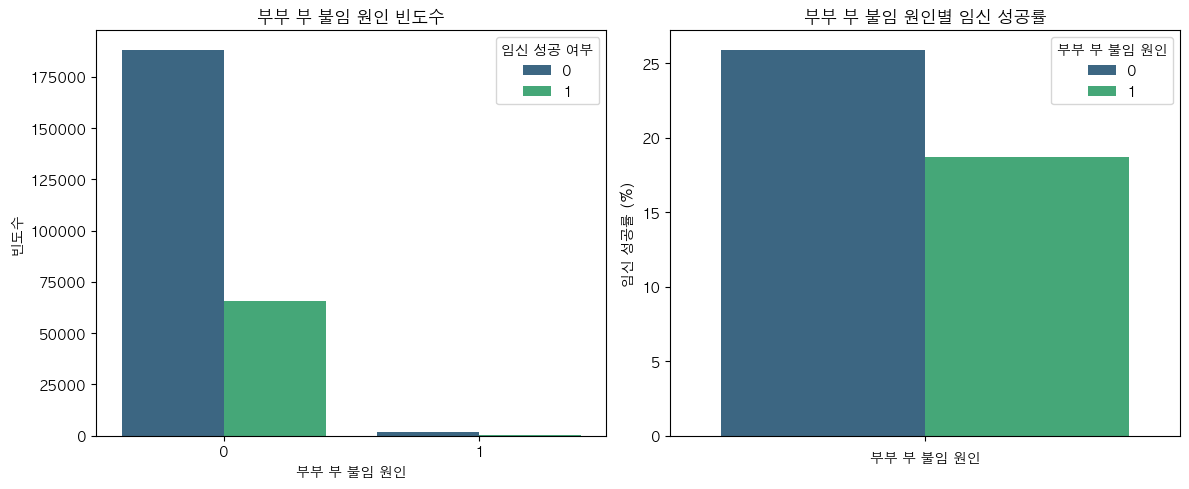


=== 부부 부 불임 원인 ===

값별 통계:
             count   mean
부부 부 불임 원인               
0           254104  25.90
1             2247  18.69

교차표 (%):
임신 성공 여부            0          1
부부 부 불임 원인                      
0           74.101943  25.898057
1           81.308411  18.691589


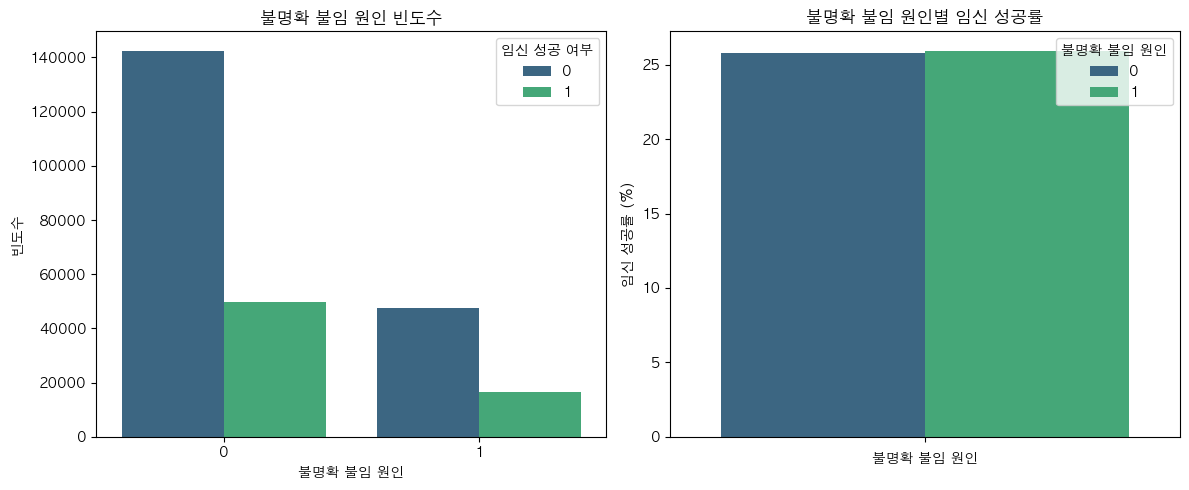


=== 불명확 불임 원인 ===

값별 통계:
            count   mean
불명확 불임 원인               
0          192076  25.80
1           64275  25.95

교차표 (%):
임신 성공 여부           0          1
불명확 불임 원인                      
0          74.202399  25.797601
1          74.053676  25.946324


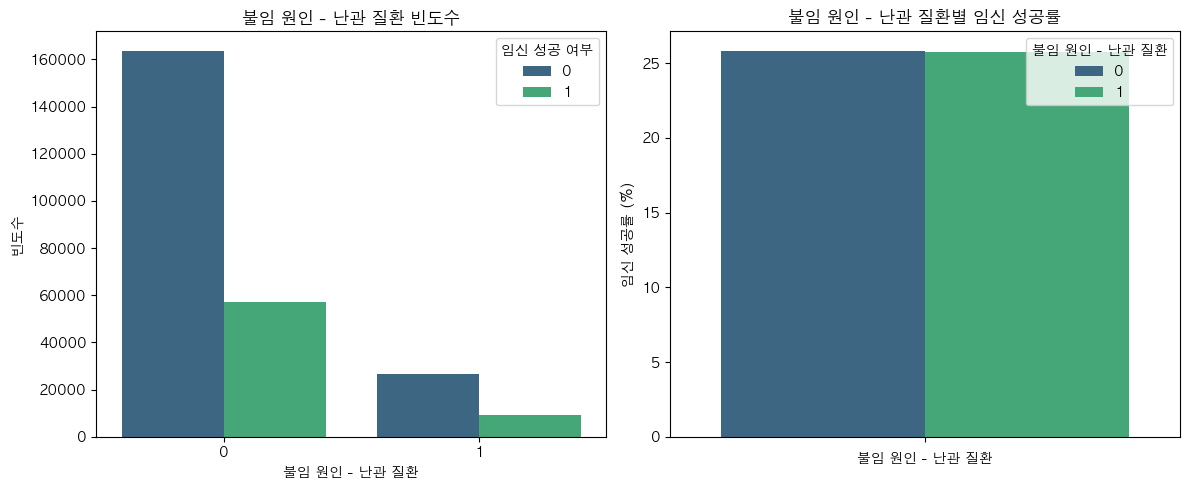


=== 불임 원인 - 난관 질환 ===

값별 통계:
                count   mean
불임 원인 - 난관 질환               
0              220794  25.84
1               35557  25.78

교차표 (%):
임신 성공 여부               0          1
불임 원인 - 난관 질환                      
0              74.155548  25.844452
1              74.224485  25.775515


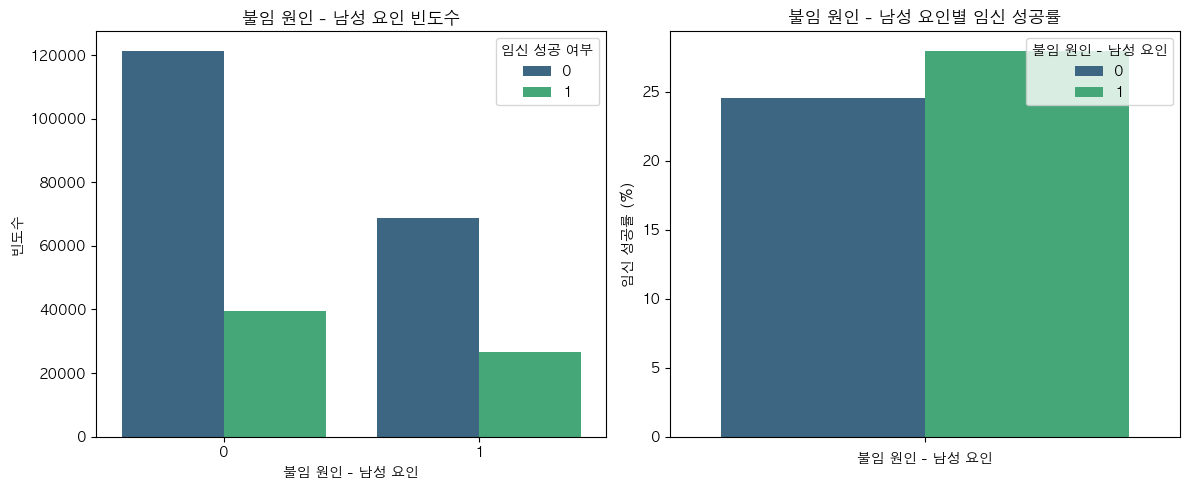


=== 불임 원인 - 남성 요인 ===

값별 통계:
                count   mean
불임 원인 - 남성 요인               
0              160885  24.56
1               95466  27.99

교차표 (%):
임신 성공 여부               0          1
불임 원인 - 남성 요인                      
0              75.443329  24.556671
1              72.010978  27.989022


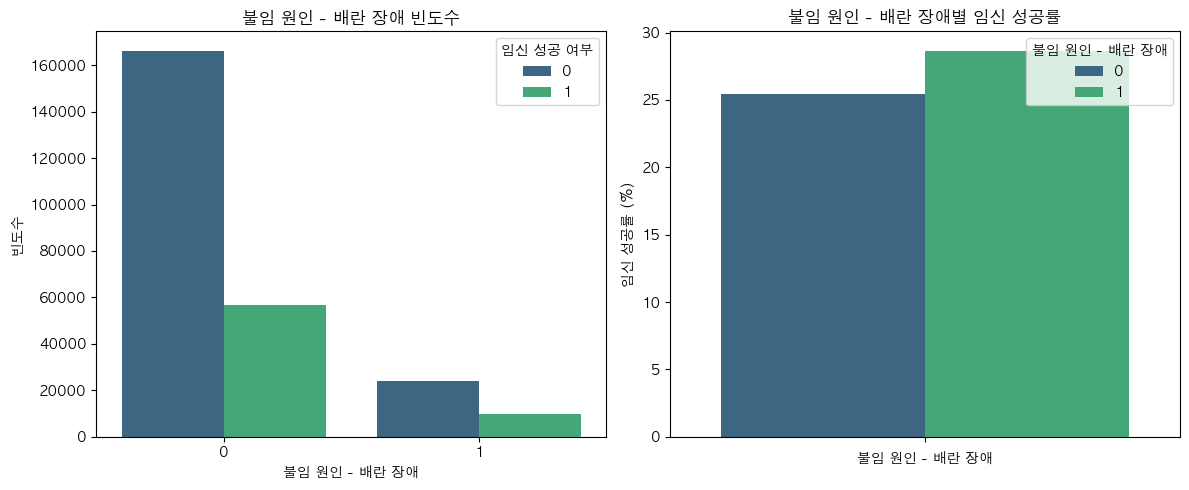


=== 불임 원인 - 배란 장애 ===

값별 통계:
                count   mean
불임 원인 - 배란 장애               
0              222925  25.41
1               33426  28.66

교차표 (%):
임신 성공 여부               0          1
불임 원인 - 배란 장애                      
0              74.589212  25.410788
1              71.336684  28.663316


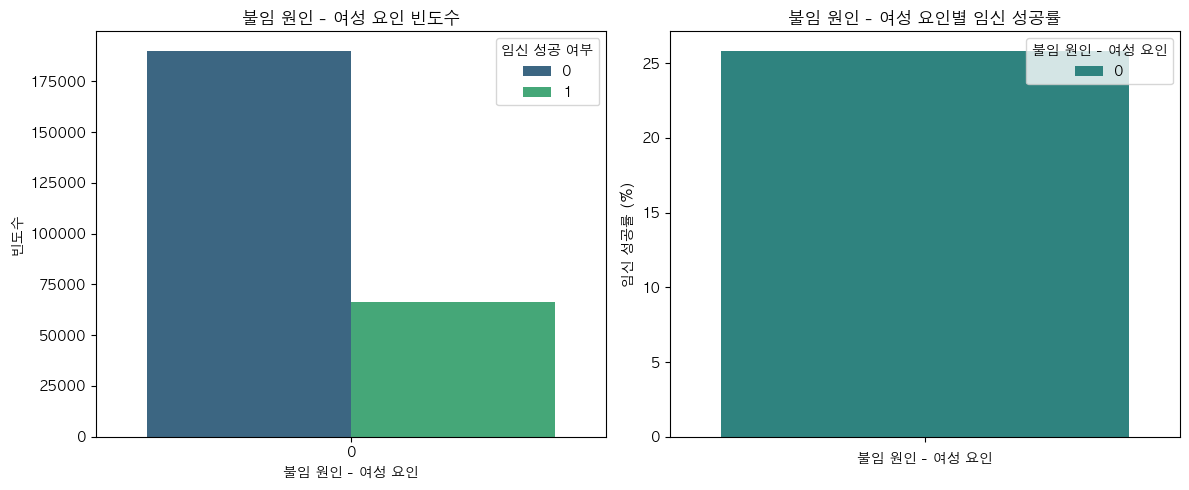


=== 불임 원인 - 여성 요인 ===

값별 통계:
                count   mean
불임 원인 - 여성 요인               
0              256351  25.83

교차표 (%):
임신 성공 여부              0         1
불임 원인 - 여성 요인                    
0              74.16511  25.83489


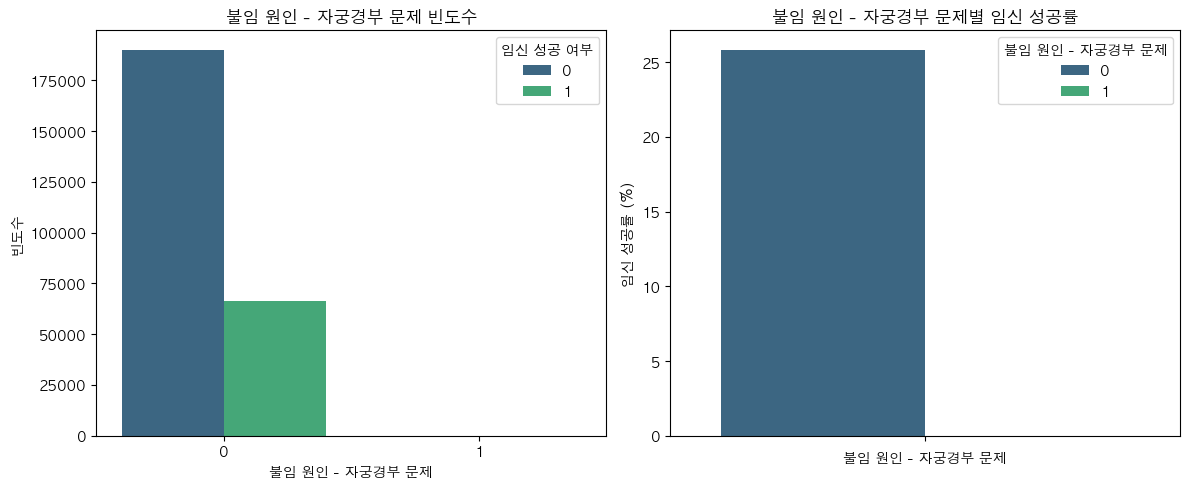


=== 불임 원인 - 자궁경부 문제 ===

값별 통계:
                  count   mean
불임 원인 - 자궁경부 문제               
0                256341  25.84
1                    10   0.00

교차표 (%):
임신 성공 여부                  0          1
불임 원인 - 자궁경부 문제                       
0                 74.164102  25.835898
1                100.000000   0.000000


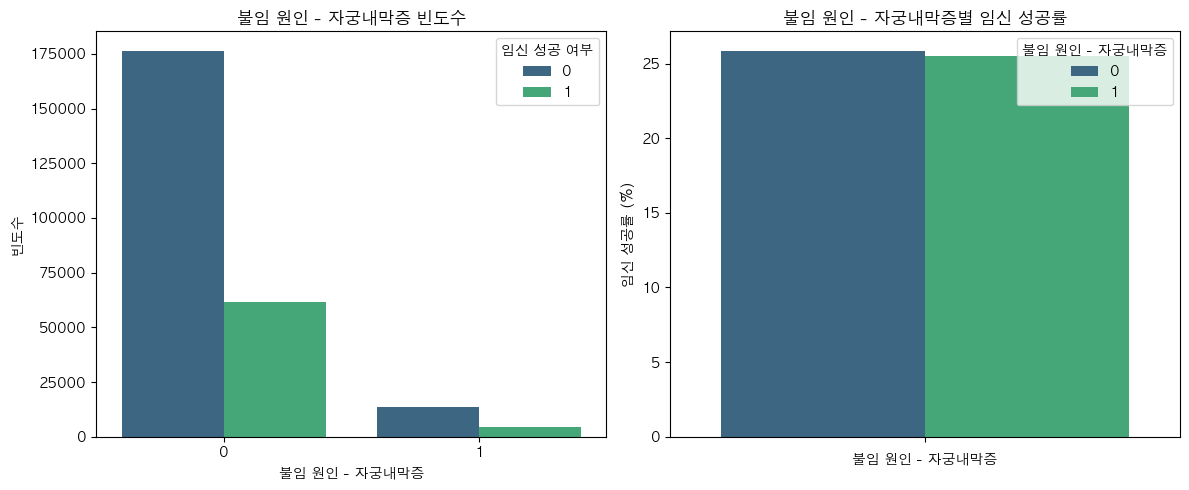


=== 불임 원인 - 자궁내막증 ===

값별 통계:
                count   mean
불임 원인 - 자궁내막증               
0              238049  25.86
1               18302  25.48

교차표 (%):
임신 성공 여부               0          1
불임 원인 - 자궁내막증                      
0              74.138098  25.861902
1              74.516446  25.483554


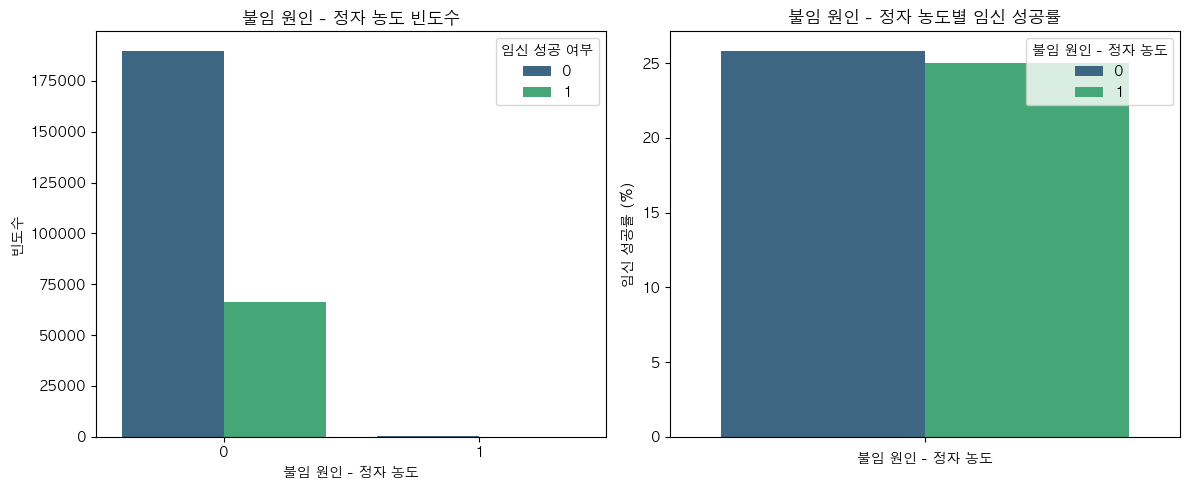


=== 불임 원인 - 정자 농도 ===

값별 통계:
                count   mean
불임 원인 - 정자 농도               
0              256075  25.84
1                 276  25.00

교차표 (%):
임신 성공 여부              0         1
불임 원인 - 정자 농도                    
0              74.16421  25.83579
1              75.00000  25.00000


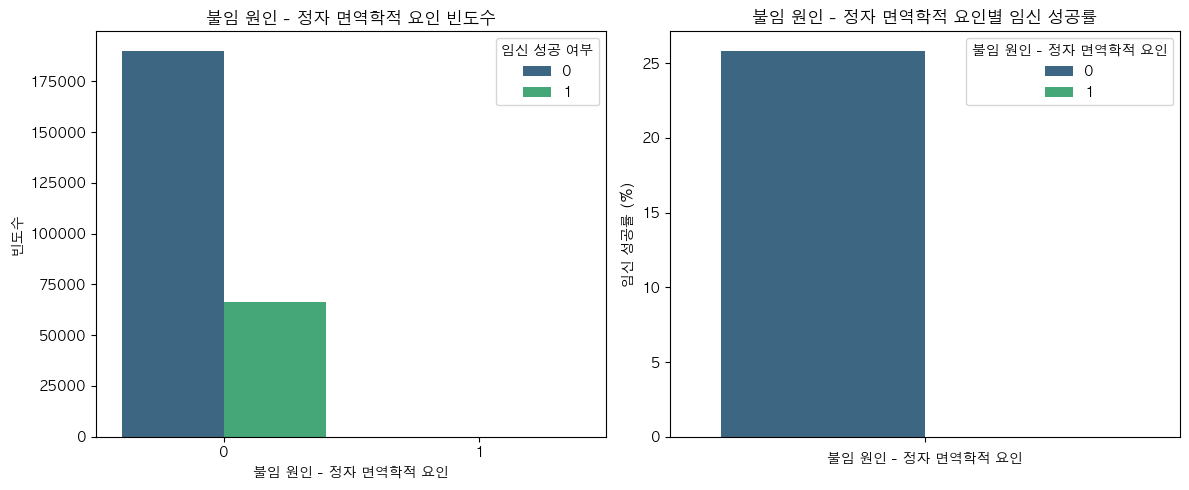


=== 불임 원인 - 정자 면역학적 요인 ===

값별 통계:
                     count   mean
불임 원인 - 정자 면역학적 요인               
0                   256350  25.83
1                        1   0.00

교차표 (%):
임신 성공 여부                     0          1
불임 원인 - 정자 면역학적 요인                       
0                    74.165009  25.834991
1                   100.000000   0.000000


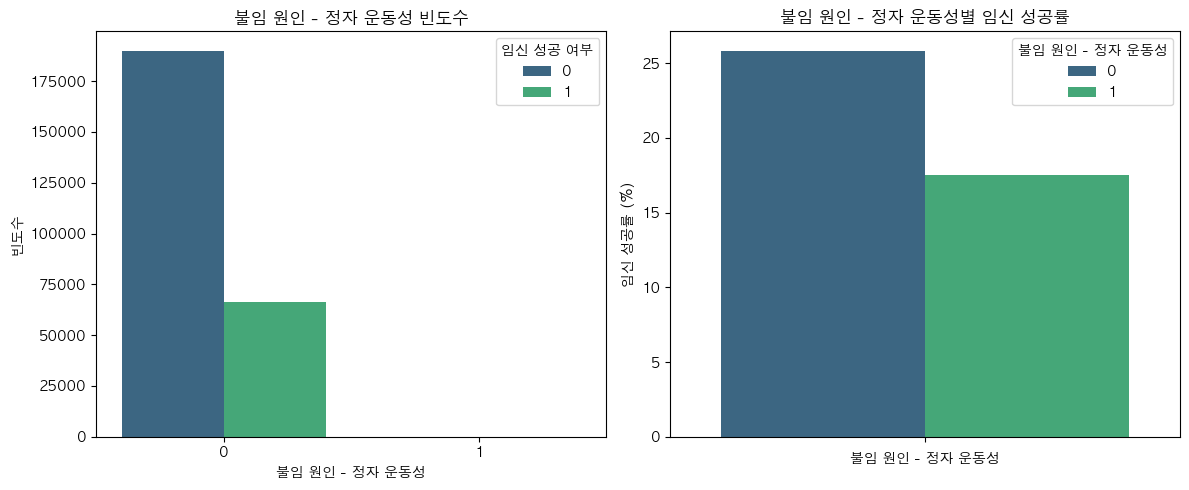


=== 불임 원인 - 정자 운동성 ===

값별 통계:
                 count   mean
불임 원인 - 정자 운동성               
0               256254  25.84
1                   97  17.53

교차표 (%):
임신 성공 여부                0          1
불임 원인 - 정자 운동성                      
0               74.161964  25.838036
1               82.474227  17.525773


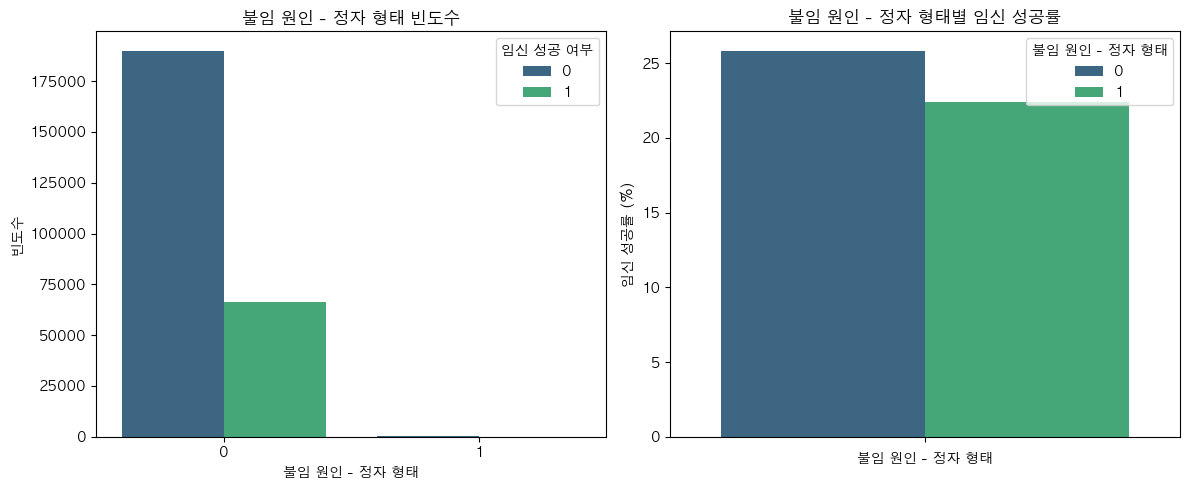


=== 불임 원인 - 정자 형태 ===

값별 통계:
                count   mean
불임 원인 - 정자 형태               
0              256208  25.84
1                 143  22.38

교차표 (%):
임신 성공 여부               0          1
불임 원인 - 정자 형태                      
0              74.163180  25.836820
1              77.622378  22.377622


In [128]:
infertility_info["임신 성공 여부"] = train["임신 성공 여부"]

numeric_columns = infertility_info.columns.drop(labels=[target])

# 시각화
for col in infertility_info.columns:
    if col == '임신 성공 여부':
        continue
    
    plt.figure(figsize=(12, 5))
    
    # 왼쪽: 빈도수 시각화
    plt.subplot(1, 2, 1)
    sns.countplot(data=infertility_info, x=col, hue='임신 성공 여부', palette='viridis')
    plt.title(f'{col} 빈도수')
    plt.xlabel(col)
    plt.ylabel('빈도수')
    plt.legend(title='임신 성공 여부')
    
    # 오른쪽: 임신 성공률 시각화
    plt.subplot(1, 2, 2)
    
    # 임신 성공률 계산
    success_rates = infertility_info.groupby(col)['임신 성공 여부'].agg(['count', 'mean'])
    success_rates['mean'] = success_rates['mean'] * 100  # 백분율로 변환
    
    # 막대 그래프 그리기
    sns.barplot(hue=success_rates.index, y=success_rates['mean'], palette='viridis')
    plt.title(f'{col}별 임신 성공률')
    plt.xlabel(col)
    plt.ylabel('임신 성공률 (%)')
    
    plt.tight_layout()
    plt.show()
    
    # 통계 정보 출력
    print(f"\n=== {col} ===")
    print("\n값별 통계:")
    print(success_rates.round(2))
    print("\n교차표 (%):")
    print(pd.crosstab(infertility_info[col], 
                     infertility_info['임신 성공 여부'], 
                     normalize='index') * 100)
    print("="*50)

## 4. 시술 횟수 관련 컬럼
* 배아 생성 주요 이유
* 총 시술 횟수
* 클리닉 내 총 시술 횟수
* IVF 시술 횟수
* DI 시술 횟수
* 총 임신 횟수
* IVF 임신 횟수
* DI 임신 횟수
* 총 출산 횟수
* IVF 출산 횟수
* DI 출산 횟수
---
* 다 object 타입,
* `배아 생성 주요 이유` 만 결측치 존재 (2.45%)
  * value 묶어주기.

In [121]:
procedure_count_info = train[columns_dict['시술 횟수']].copy()

# 컬럼명 출력
print("\n📌 [배란 및 배아 관련 컬럼 목록]")
print(", ".join(procedure_count_info.columns))

# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(procedure_count_info.dtypes)

# 결측치 개수 출력 (비율 포함)
missing_values = procedure_count_info.isnull().sum()
missing_percent = (missing_values / len(procedure_count_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())


📌 [배란 및 배아 관련 컬럼 목록]
배아 생성 주요 이유, 총 시술 횟수, 클리닉 내 총 시술 횟수, IVF 시술 횟수, DI 시술 횟수, 총 임신 횟수, IVF 임신 횟수, DI 임신 횟수, 총 출산 횟수, IVF 출산 횟수, DI 출산 횟수

📌 [배란 및 배아 관련 컬럼별 데이터 타입]
배아 생성 주요 이유      object
총 시술 횟수          object
클리닉 내 총 시술 횟수    object
IVF 시술 횟수        object
DI 시술 횟수         object
총 임신 횟수          object
IVF 임신 횟수        object
DI 임신 횟수         object
총 출산 횟수          object
IVF 출산 횟수        object
DI 출산 횟수         object
dtype: object

📌 [배란 및 배아 관련 결측치 개수 및 비율]
               결측치 개수  결측치 비율(%)
배아 생성 주요 이유      6291   2.454057
총 시술 횟수             0   0.000000
클리닉 내 총 시술 횟수       0   0.000000
IVF 시술 횟수           0   0.000000
DI 시술 횟수            0   0.000000
총 임신 횟수             0   0.000000
IVF 임신 횟수           0   0.000000
DI 임신 횟수            0   0.000000
총 출산 횟수             0   0.000000
IVF 출산 횟수           0   0.000000
DI 출산 횟수            0   0.000000


In [122]:
# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in procedure_count_info.columns:
    n_unique = procedure_count_info[col].nunique()
    unique_values = procedure_count_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    print(f"- 값별 빈도수:")
    print(procedure_count_info[col].value_counts().to_string())
    print("-" * 50)


📌 [배란 및 배아 관련 컬럼별 Unique Values]

배아 생성 주요 이유:
- Unique 값 개수: 13
- Unique 값 목록: ['현재 시술용' nan '난자 저장용' '배아 저장용' '기증용, 현재 시술용' '기증용, 배아 저장용' '기증용'
 '기증용, 난자 저장용' '배아 저장용, 현재 시술용' '난자 저장용, 배아 저장용' '기증용, 배아 저장용, 현재 시술용'
 '연구용, 현재 시술용' '난자 저장용, 현재 시술용' '난자 저장용, 배아 저장용, 연구용']
- 값별 빈도수:
배아 생성 주요 이유
현재 시술용                 233732
배아 저장용                   9192
기증용, 현재 시술용              3784
난자 저장용                   1959
기증용                      1108
기증용, 배아 저장용               125
배아 저장용, 현재 시술용             83
기증용, 난자 저장용                44
기증용, 배아 저장용, 현재 시술용        20
난자 저장용, 배아 저장용              6
난자 저장용, 현재 시술용              5
연구용, 현재 시술용                 1
난자 저장용, 배아 저장용, 연구용         1
--------------------------------------------------

총 시술 횟수:
- Unique 값 개수: 7
- Unique 값 목록: ['0회' '1회' '2회' '6회 이상' '3회' '4회' '5회']
- 값별 빈도수:
총 시술 횟수
0회       97599
1회       56819
2회       39338
3회       24531
4회       15141
6회 이상    13817
5회        9106
--------------------------------------------------

클리닉 내 총

<Figure size 1200x600 with 0 Axes>

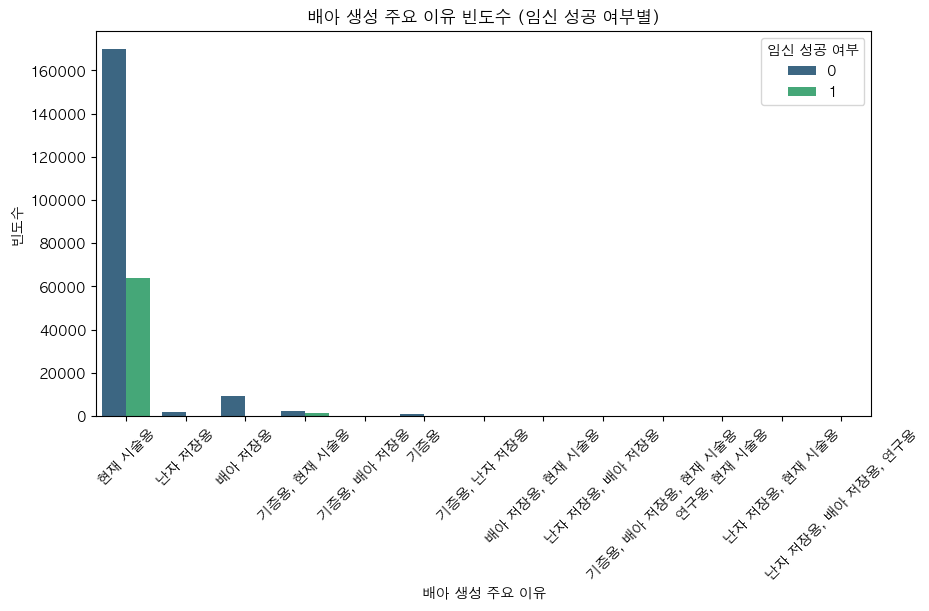

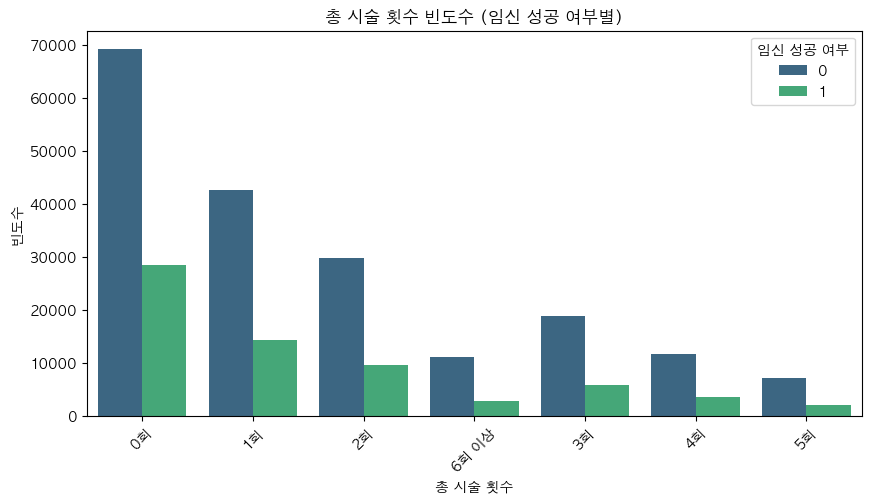

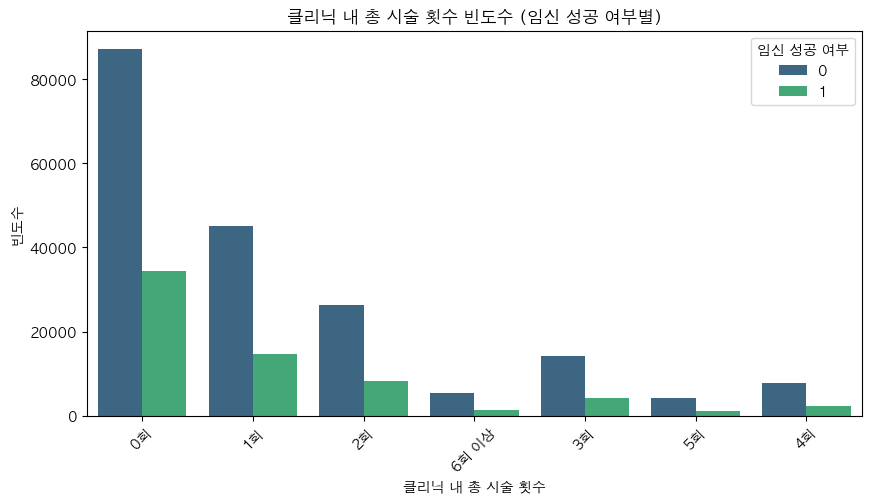

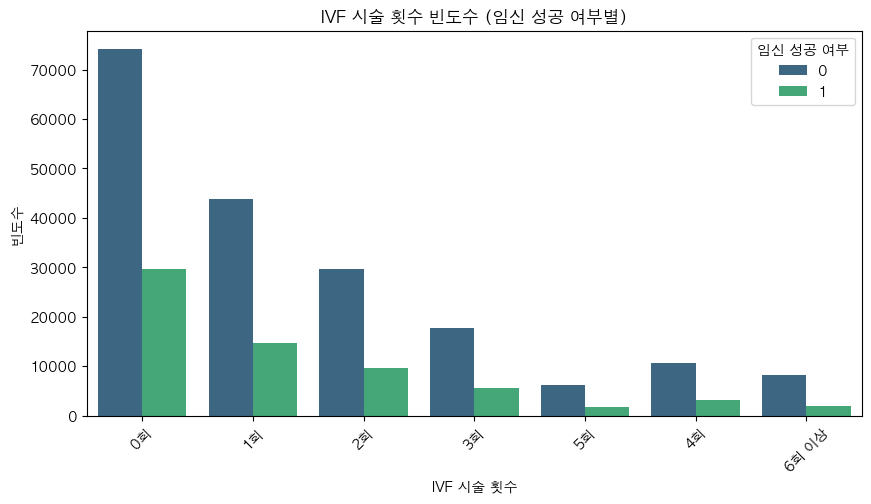

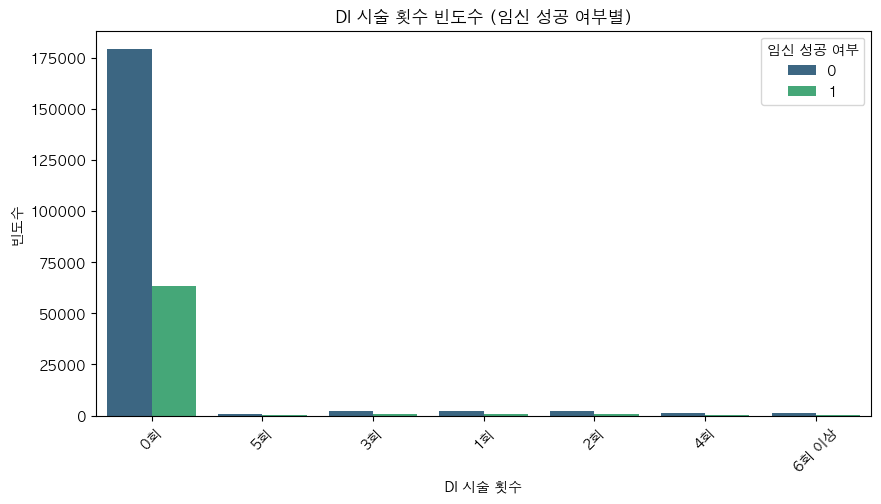

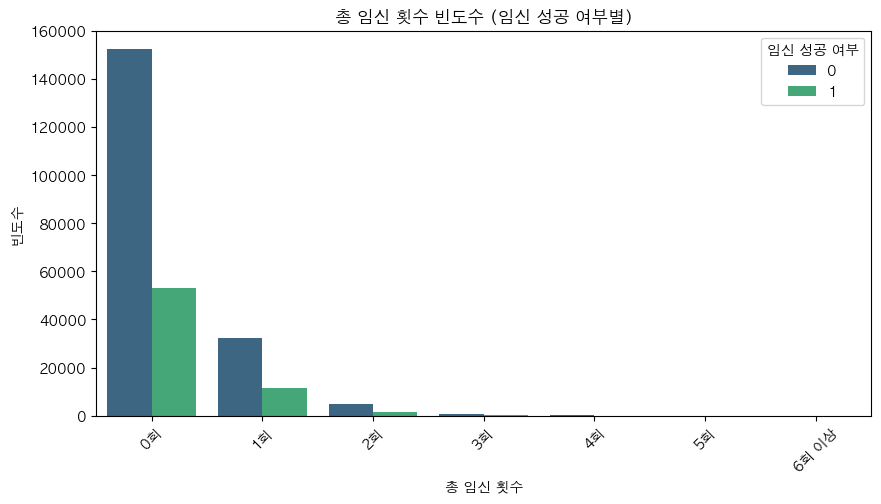

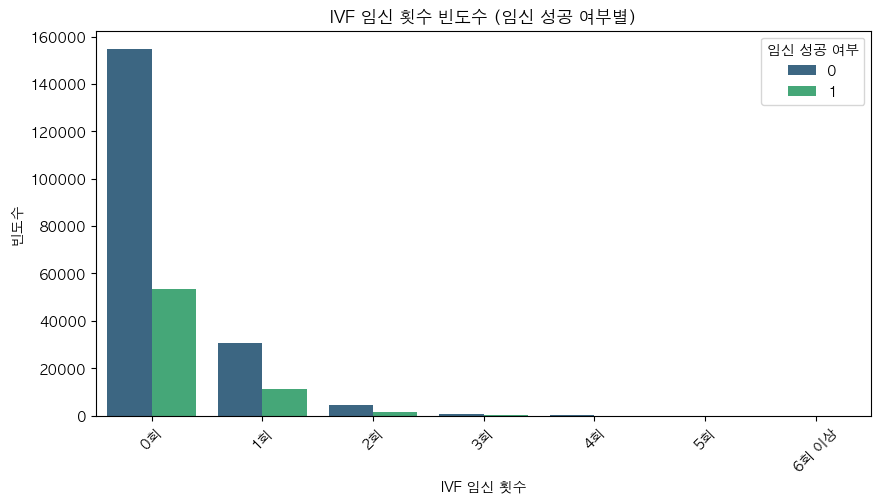

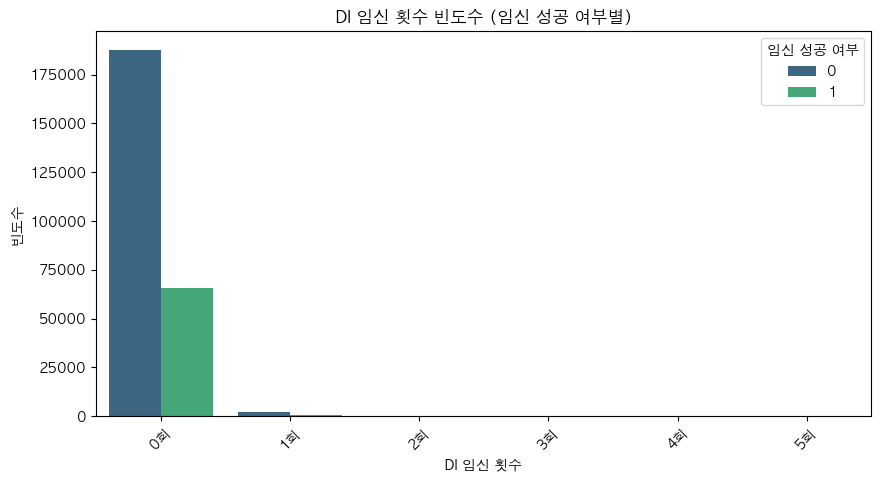

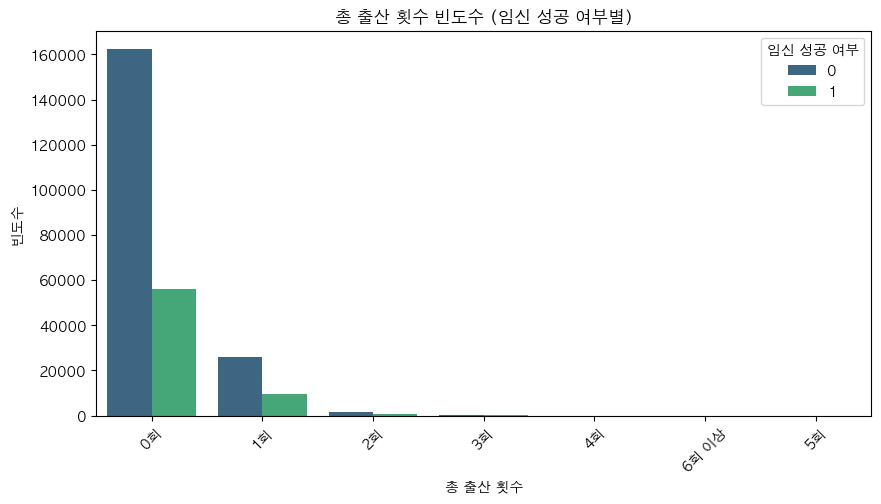

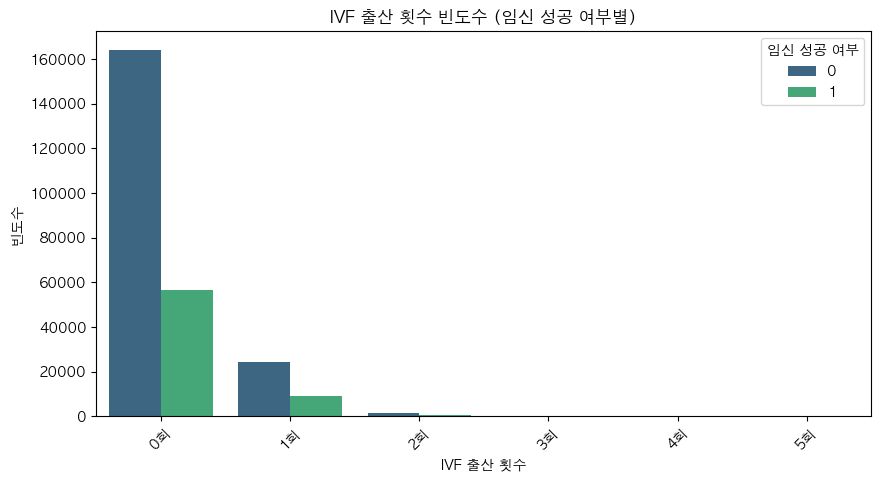

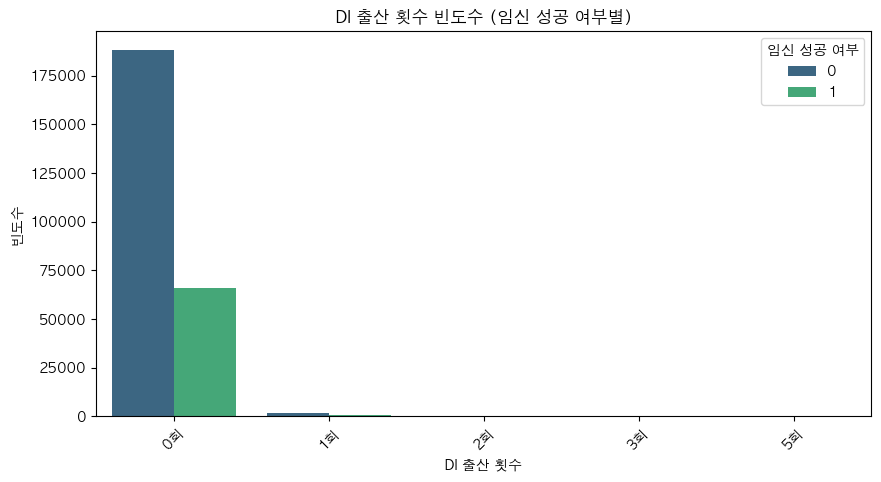

In [123]:
procedure_count_info["임신 성공 여부"] = train["임신 성공 여부"]

# 범주형 데이터 빈도수 분석
categorical_columns = procedure_count_info.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 6))
# 범주형 데이터 빈도수 시각화 (임신 성공 여부별) - `countplot()` 사용
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=procedure_count_info, x=col, hue="임신 성공 여부", palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{col} 빈도수 (임신 성공 여부별)")
    plt.xlabel(col)
    plt.ylabel("빈도수")
    plt.legend(title="임신 성공 여부")
    plt.show()

## 5. 배아 및 난자 관련 컬럼
* 총 생성 배아 수
* 미세주입된 난자 수
* 미세주입에서 생성된 배아 수
* 이식된 배아 수
* 미세주입 배아 이식 수
* 저장된 배아 수
* 미세주입 후 저장된 배아 수
* 해동된 배아 수
* 해동 난자 수
* 수집된 신선 난자 수
* 저장된 신선 난자 수
* 혼합된 난자 수
* 파트너 정자와 혼합된 난자 수
* 기증자 정자와 혼합된 난자 수
---
* 모두 다 `float64` 타입이고, 결측치가 동일하게 6291개 있는데 동일한 행에서 결측치 발생.
* 분포 그렸을 때 대부분 0에 치중되어 있긴 했음. `이식된 배아 수` 랑 `미세주입 배아 이식 수` 빼고 둘은 unique 값 4개임.

In [54]:
embryo_egg_info = train[columns_dict['배아 및 난자 관련']].copy()
# 컬럼명 출력
print("\n📌 [배란 및 배아 관련 컬럼 목록]")
print(", ".join(embryo_egg_info.columns))

# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(embryo_egg_info.dtypes)



📌 [배란 및 배아 관련 컬럼 목록]
총 생성 배아 수, 미세주입된 난자 수, 미세주입에서 생성된 배아 수, 이식된 배아 수, 미세주입 배아 이식 수, 저장된 배아 수, 미세주입 후 저장된 배아 수, 해동된 배아 수, 해동 난자 수, 수집된 신선 난자 수, 저장된 신선 난자 수, 혼합된 난자 수, 파트너 정자와 혼합된 난자 수, 기증자 정자와 혼합된 난자 수

📌 [배란 및 배아 관련 컬럼별 데이터 타입]
총 생성 배아 수           float64
미세주입된 난자 수          float64
미세주입에서 생성된 배아 수     float64
이식된 배아 수            float64
미세주입 배아 이식 수        float64
저장된 배아 수            float64
미세주입 후 저장된 배아 수     float64
해동된 배아 수            float64
해동 난자 수             float64
수집된 신선 난자 수         float64
저장된 신선 난자 수         float64
혼합된 난자 수            float64
파트너 정자와 혼합된 난자 수    float64
기증자 정자와 혼합된 난자 수    float64
dtype: object


In [55]:
# 결측치 개수 출력 (비율 포함)
missing_values = embryo_egg_info.isnull().sum()
missing_percent = (missing_values / len(embryo_egg_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())


📌 [배란 및 배아 관련 결측치 개수 및 비율]
                  결측치 개수  결측치 비율(%)
총 생성 배아 수           6291   2.454057
미세주입된 난자 수          6291   2.454057
미세주입에서 생성된 배아 수     6291   2.454057
이식된 배아 수            6291   2.454057
미세주입 배아 이식 수        6291   2.454057
저장된 배아 수            6291   2.454057
미세주입 후 저장된 배아 수     6291   2.454057
해동된 배아 수            6291   2.454057
해동 난자 수             6291   2.454057
수집된 신선 난자 수         6291   2.454057
저장된 신선 난자 수         6291   2.454057
혼합된 난자 수            6291   2.454057
파트너 정자와 혼합된 난자 수    6291   2.454057
기증자 정자와 혼합된 난자 수    6291   2.454057


<Figure size 1000x500 with 0 Axes>

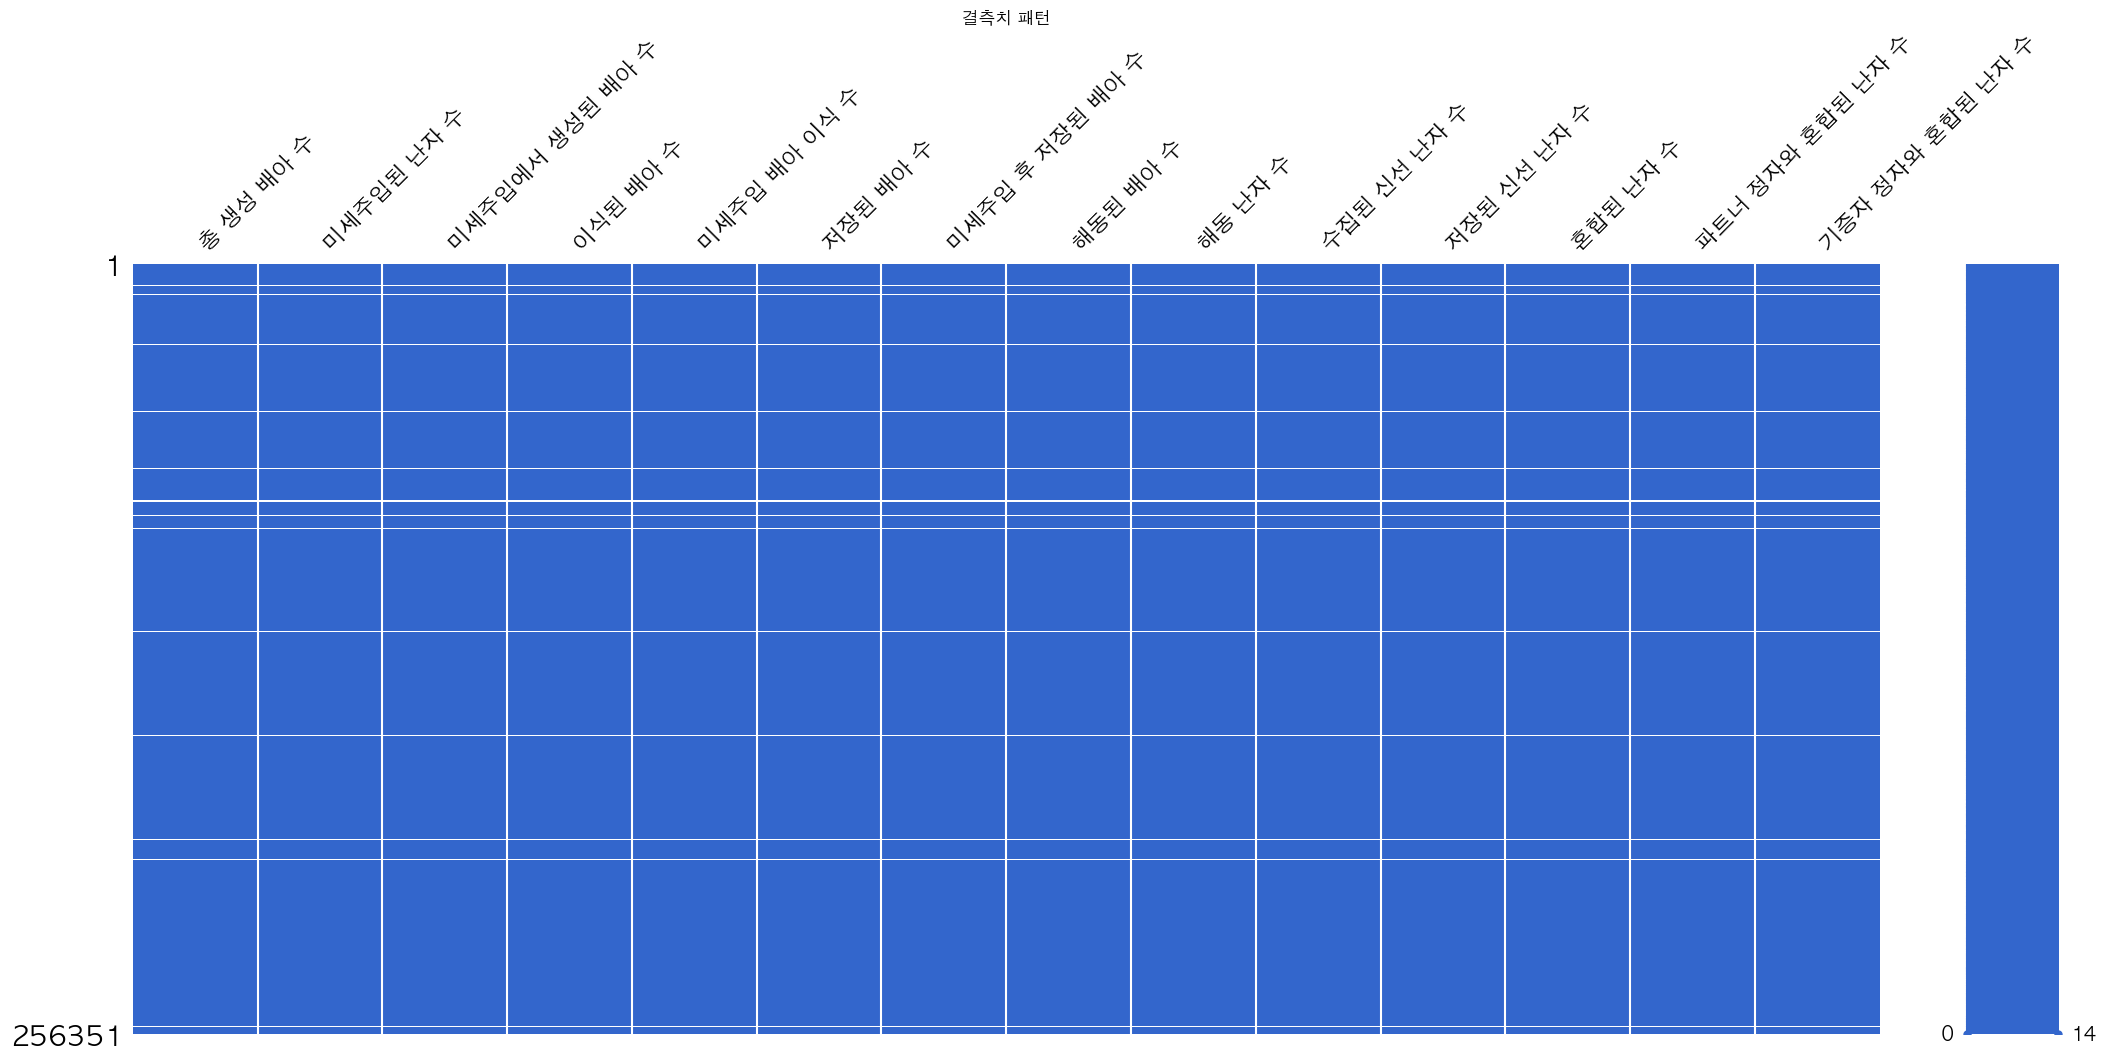

In [56]:
# 📌 3️⃣ 결측치 행렬 그래프
plt.figure(figsize=(10, 5))
msno.matrix(embryo_egg_info, color=(0.2, 0.4, 0.8))  # 결측치를 색상으로 표현
plt.title("결측치 패턴")
plt.show()

In [57]:
# 결측치가 있는 행을 출력해서 패턴 확인
embryo_egg_info[embryo_egg_info.isnull().any(axis=1)].head()

총 생성 배아 수  미세주입된 난자 수  미세주입에서 생성된 배아 수  이식된 배아 수  미세주입 배아 이식 수  저장된 배아 수  \
14         NaN         NaN              NaN       NaN           NaN       NaN   
39         NaN         NaN              NaN       NaN           NaN       NaN   
127        NaN         NaN              NaN       NaN           NaN       NaN   
162        NaN         NaN              NaN       NaN           NaN       NaN   
174        NaN         NaN              NaN       NaN           NaN       NaN   

     미세주입 후 저장된 배아 수  해동된 배아 수  해동 난자 수  수집된 신선 난자 수  저장된 신선 난자 수  혼합된 난자 수  \
14               NaN       NaN      NaN          NaN          NaN       NaN   
39               NaN       NaN      NaN          NaN          NaN       NaN   
127              NaN       NaN      NaN          NaN          NaN       NaN   
162              NaN       NaN      NaN          NaN          NaN       NaN   
174              NaN       NaN      NaN          NaN          NaN       NaN   

     파트너 정자와 혼합된 난자 수  기증자 정자와 혼합된 난자 수  
14                NaN               NaN  
39                NaN               NaN  
127               NaN               NaN  
162               NaN               NaN  
174               NaN               NaN

In [59]:
# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in embryo_egg_info.columns:
    n_unique = embryo_egg_info[col].nunique()
    unique_values = embryo_egg_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    # print(f"- 값별 빈도수:")
    # print(embryo_egg_info[col].value_counts().to_string())
    print("-" * 50)


📌 [배란 및 배아 관련 컬럼별 Unique Values]

총 생성 배아 수:
- Unique 값 개수: 45
- Unique 값 목록: [ 4.  0.  5.  6.  3. 12.  2. 13. nan  8.  7.  1. 14. 23. 18. 15. 11.  9.
 19. 10. 16. 21. 20. 17. 24. 26. 27. 25. 32. 22. 34. 28. 36. 31. 42. 41.
 51. 37. 30. 29. 33. 38. 35. 44. 40. 43.]
--------------------------------------------------

미세주입된 난자 수:
- Unique 값 개수: 52
- Unique 값 목록: [ 5.  1.  0.  4.  6.  2. nan  3.  8.  7. 22. 17. 19. 11.  9. 13. 14. 12.
 20. 10. 21. 23. 15. 18. 16. 27. 29. 26. 37. 24. 25. 30. 28. 40. 33. 42.
 46. 32. 51. 43. 34. 35. 48. 31. 45. 36. 39. 49. 41. 38. 44. 47. 50.]
--------------------------------------------------

미세주입에서 생성된 배아 수:
- Unique 값 개수: 41
- Unique 값 목록: [ 4.  0.  6.  3.  2. nan  5.  1.  7. 12.  8. 14. 13.  9. 11. 18. 16. 10.
 20. 15. 17. 21. 24. 26. 23. 25. 19. 22. 36. 28. 42. 32. 41. 27. 30. 29.
 34. 33. 31. 43. 38. 37.]
--------------------------------------------------

이식된 배아 수:
- Unique 값 개수: 4
- Unique 값 목록: [ 2.  0.  1. nan  3.]
------------------------------

In [60]:
embryo_egg_info["임신 성공 여부"] = train["임신 성공 여부"]

<Figure size 1500x600 with 0 Axes>

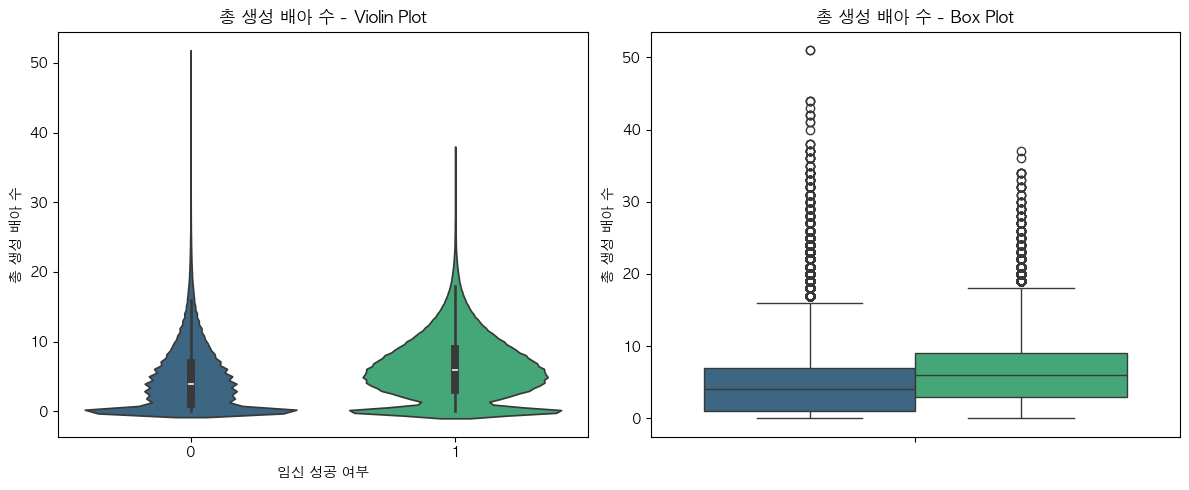


=== 총 생성 배아 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  4.655481  4.634827  0.0  1.0  4.0  7.0  51.0
1          65417.0  6.206154  4.555807  0.0  3.0  6.0  9.0  37.0




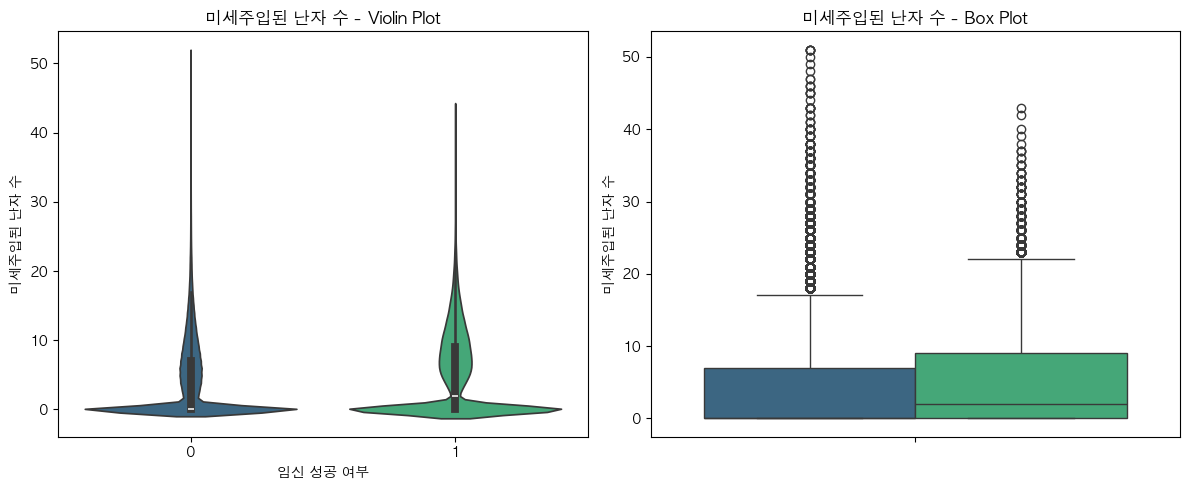


=== 미세주입된 난자 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  3.936001  5.527474  0.0  0.0  0.0  7.0  51.0
1          65417.0  4.833530  5.844387  0.0  0.0  2.0  9.0  43.0




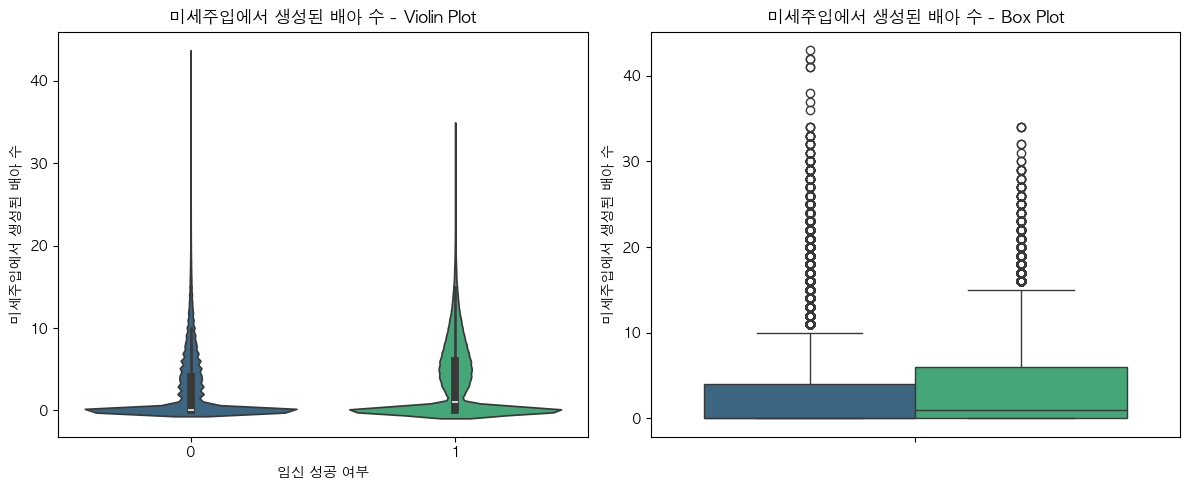


=== 미세주입에서 생성된 배아 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  2.623630  3.969246  0.0  0.0  0.0  4.0  43.0
1          65417.0  3.464665  4.370140  0.0  0.0  1.0  6.0  34.0




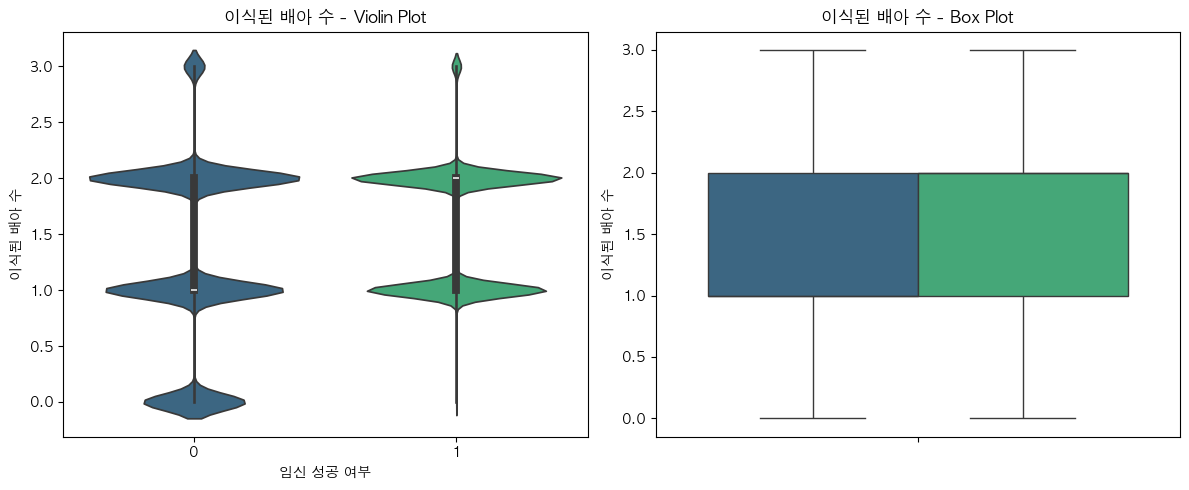


=== 이식된 배아 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%  max
임신 성공 여부                                                       
0         184643.0  1.295792  0.826918  0.0  1.0  1.0  2.0  3.0
1          65417.0  1.572405  0.539830  0.0  1.0  2.0  2.0  3.0




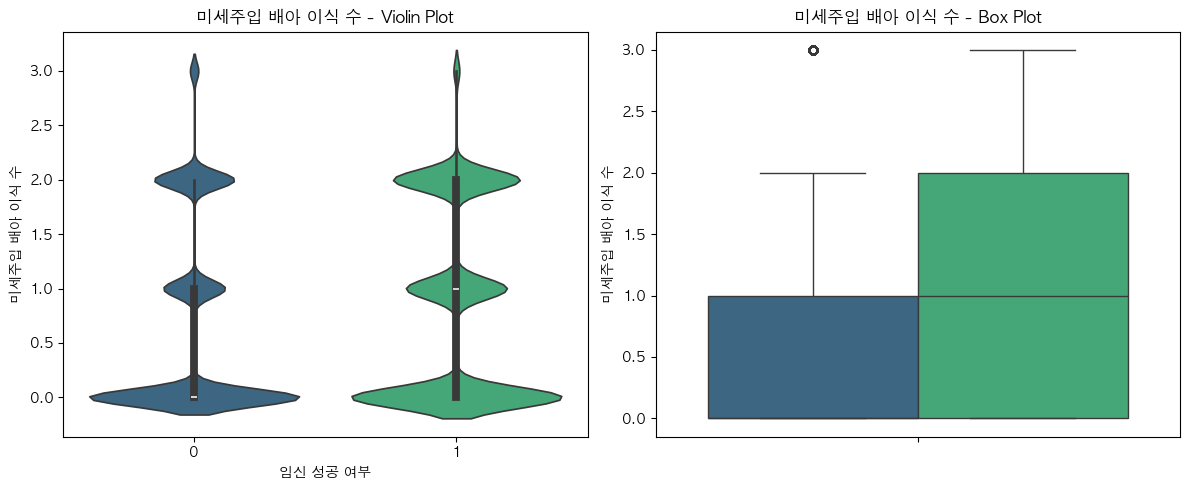


=== 미세주입 배아 이식 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%  max
임신 성공 여부                                                       
0         184643.0  0.685138  0.893774  0.0  0.0  0.0  1.0  3.0
1          65417.0  0.836434  0.886505  0.0  0.0  1.0  2.0  3.0




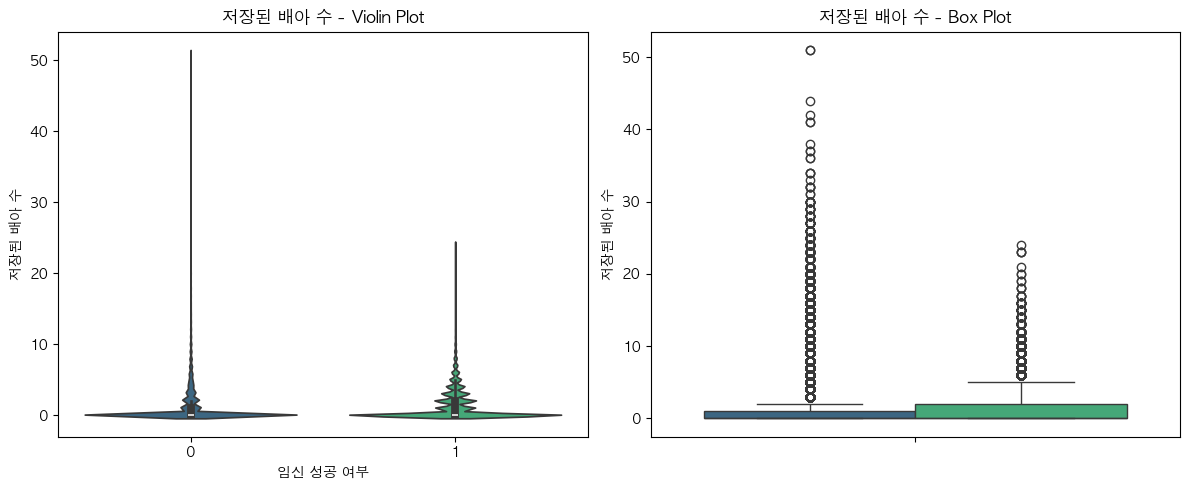


=== 저장된 배아 수 ===
기술 통계량:
             count     mean       std  min  25%  50%  75%   max
임신 성공 여부                                                       
0         184643.0  1.13232  2.625914  0.0  0.0  0.0  1.0  51.0
1          65417.0  1.33742  2.107508  0.0  0.0  0.0  2.0  24.0




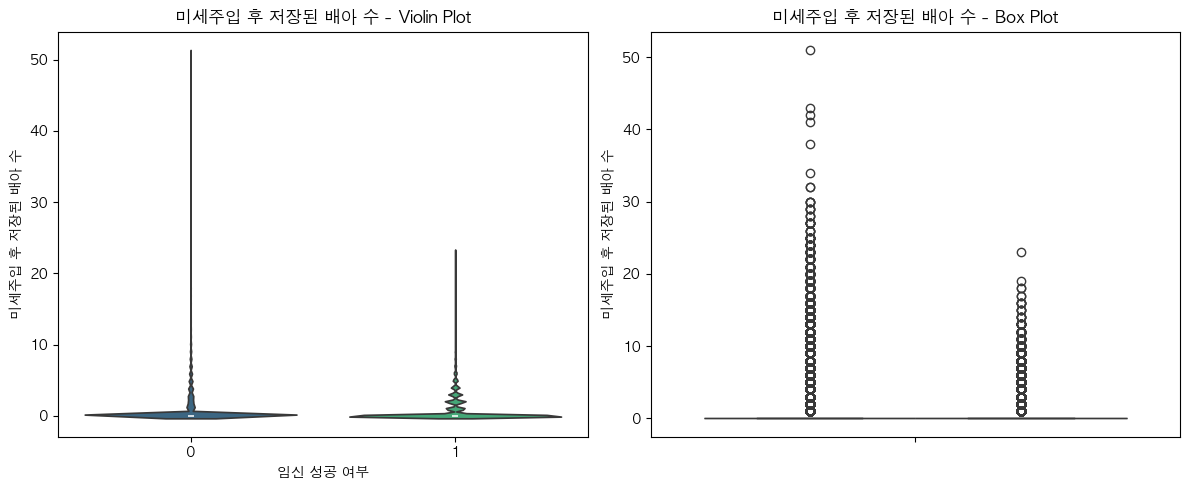


=== 미세주입 후 저장된 배아 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  0.589094  1.930314  0.0  0.0  0.0  0.0  51.0
1          65417.0  0.680221  1.566489  0.0  0.0  0.0  0.0  23.0




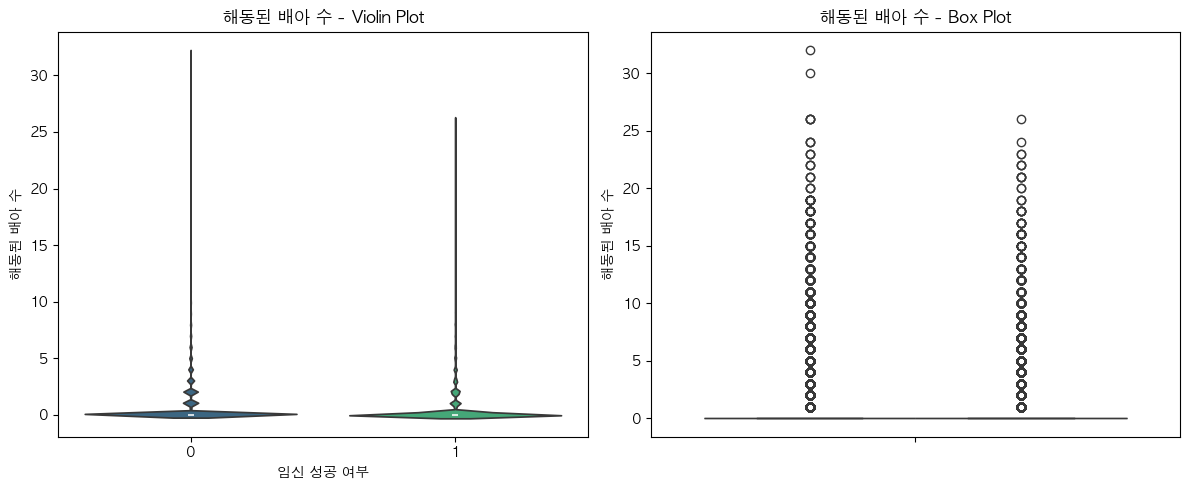


=== 해동된 배아 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  0.467128  1.411859  0.0  0.0  0.0  0.0  32.0
1          65417.0  0.419127  1.424458  0.0  0.0  0.0  0.0  26.0




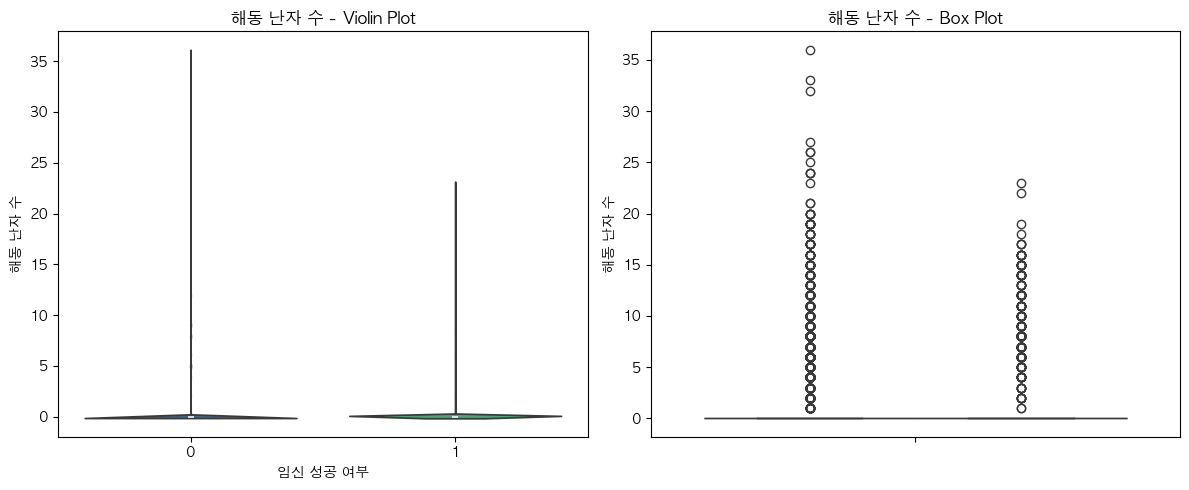


=== 해동 난자 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  0.047280  0.692543  0.0  0.0  0.0  0.0  36.0
1          65417.0  0.043918  0.675969  0.0  0.0  0.0  0.0  23.0




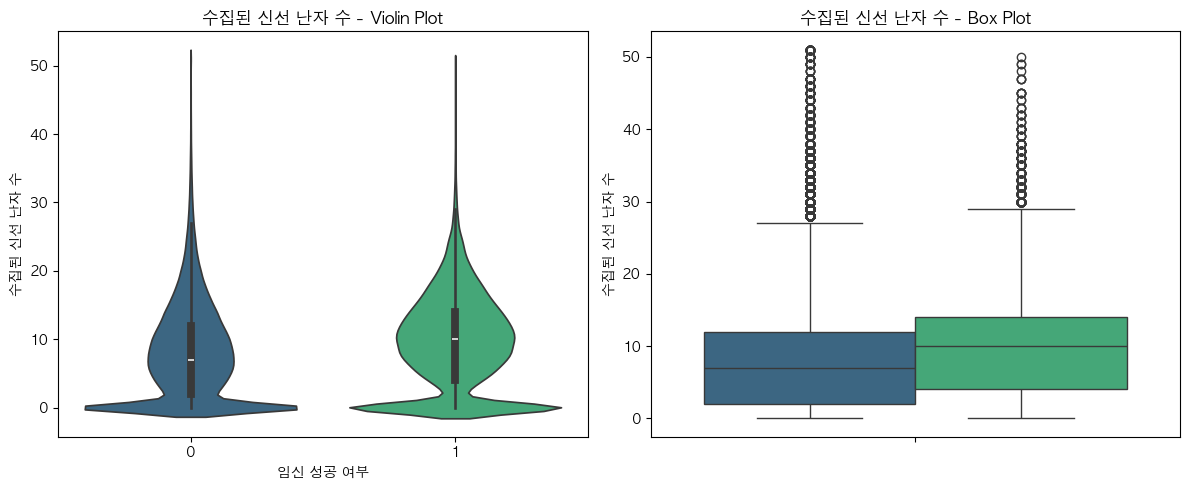


=== 수집된 신선 난자 수 ===
기술 통계량:
             count      mean       std  min  25%   50%   75%   max
임신 성공 여부                                                          
0         184643.0  8.202120  7.386673  0.0  2.0   7.0  12.0  51.0
1          65417.0  9.584344  7.017822  0.0  4.0  10.0  14.0  50.0




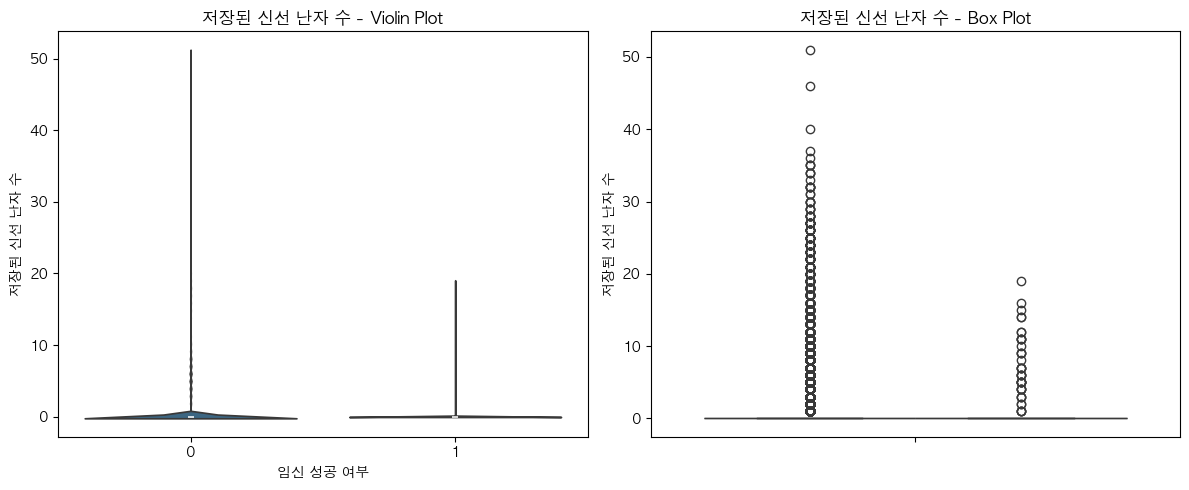


=== 저장된 신선 난자 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  0.124857  1.279145  0.0  0.0  0.0  0.0  51.0
1          65417.0  0.004678  0.214313  0.0  0.0  0.0  0.0  19.0




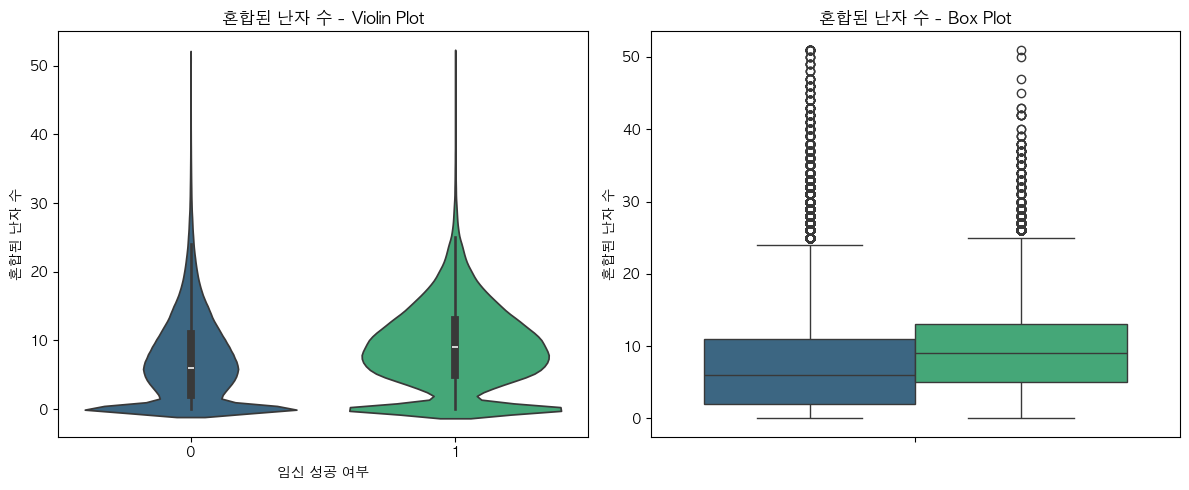


=== 혼합된 난자 수 ===
기술 통계량:
             count      mean       std  min  25%  50%   75%   max
임신 성공 여부                                                         
0         184643.0  7.252931  6.507931  0.0  2.0  6.0  11.0  51.0
1          65417.0  8.957779  6.118214  0.0  5.0  9.0  13.0  51.0




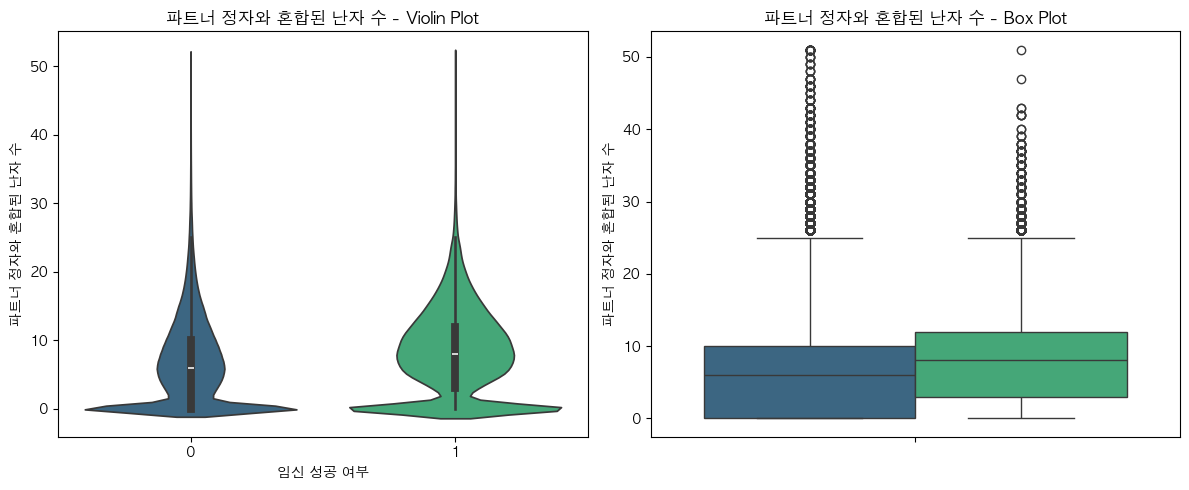


=== 파트너 정자와 혼합된 난자 수 ===
기술 통계량:
             count      mean       std  min  25%  50%   75%   max
임신 성공 여부                                                         
0         184643.0  6.699442  6.546742  0.0  0.0  6.0  10.0  51.0
1          65417.0  8.258603  6.352298  0.0  3.0  8.0  12.0  51.0




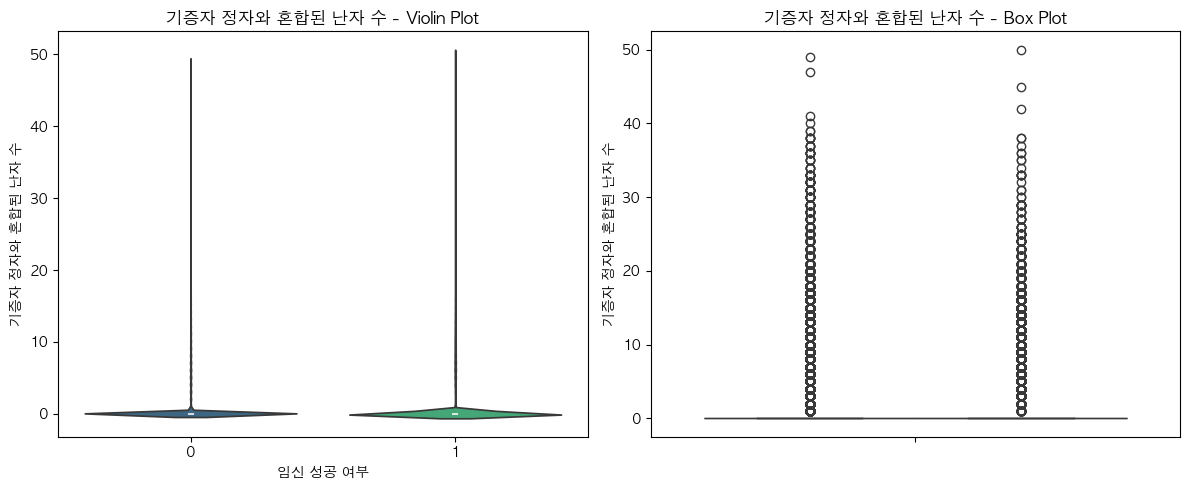


=== 기증자 정자와 혼합된 난자 수 ===
기술 통계량:
             count      mean       std  min  25%  50%  75%   max
임신 성공 여부                                                        
0         184643.0  0.495621  2.404524  0.0  0.0  0.0  0.0  49.0
1          65417.0  0.645108  2.781544  0.0  0.0  0.0  0.0  50.0




In [64]:
numeric_columns = embryo_egg_info.columns.drop(labels=[target])

plt.figure(figsize=(15, 6))
for ㅑ, col in enumerate(numeric_columns):
    plt.figure(figsize=(12, 5))

    # 왼쪽 violin plot
    plt.subplot(1, 2, 1)
    sns.violinplot(data=embryo_egg_info, x="임신 성공 여부", y=col, palette="viridis", hue='임신 성공 여부', legend=False)
    plt.title(f'{col} - Violin Plot')

    # 오른쪽: box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=embryo_egg_info, y=col, palette="viridis", hue='임신 성공 여부', legend=False)
    plt.title(f'{col} - Box Plot')

    plt.tight_layout()
    plt.show()

    # 기술 통계량 출력
    print(f"\n=== {col} ===")
    print("기술 통계량:")
    print(embryo_egg_info.groupby('임신 성공 여부')[col].describe())
    print("\n" + "="*50 + "\n")

## 6. 난자 및 정자 출처 관련 컬럼
* 난자 출처
* 정자 출처
* 난자 기증자 나이
* 정자 기증자 나이
---
* object 타입, 결측치 없음.
* 기증자는 알 수 없음이 대부분.

In [112]:
donor_source_info = train[columns_dict['난자 및 정자 출처']].copy()

# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(donor_source_info.dtypes)

# 결측치 개수 출력 (비율 포함)
missing_values = donor_source_info.isnull().sum()
missing_percent = (missing_values / len(donor_source_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())


📌 [배란 및 배아 관련 컬럼별 데이터 타입]
난자 출처        object
정자 출처        object
난자 기증자 나이    object
정자 기증자 나이    object
dtype: object

📌 [배란 및 배아 관련 결측치 개수 및 비율]
           결측치 개수  결측치 비율(%)
난자 출처           0        0.0
정자 출처           0        0.0
난자 기증자 나이       0        0.0
정자 기증자 나이       0        0.0


In [113]:
# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in donor_source_info.columns:
    n_unique = donor_source_info[col].nunique()
    unique_values = donor_source_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    print(f"- 값별 빈도수:")
    print(donor_source_info[col].value_counts().to_string())
    print("-" * 50)


📌 [배란 및 배아 관련 컬럼별 Unique Values]

난자 출처:
- Unique 값 개수: 3
- Unique 값 목록: ['본인 제공' '기증 제공' '알 수 없음']
- 값별 빈도수:
난자 출처
본인 제공     234291
기증 제공      15769
알 수 없음      6291
--------------------------------------------------

정자 출처:
- Unique 값 개수: 4
- Unique 값 목록: ['배우자 제공' '기증 제공' '배우자 및 기증 제공' '미할당']
- 값별 빈도수:
정자 출처
배우자 제공         229199
기증 제공           27016
미할당               122
배우자 및 기증 제공        14
--------------------------------------------------

난자 기증자 나이:
- Unique 값 개수: 5
- Unique 값 목록: ['알 수 없음' '만21-25세' '만31-35세' '만26-30세' '만20세 이하']
- 값별 빈도수:
난자 기증자 나이
알 수 없음     242381
만31-35세      6366
만26-30세      4976
만21-25세      2334
만20세 이하       294
--------------------------------------------------

정자 기증자 나이:
- Unique 값 개수: 7
- Unique 값 목록: ['알 수 없음' '만26-30세' '만21-25세' '만41-45세' '만36-40세' '만31-35세' '만20세 이하']
- 값별 빈도수:
정자 기증자 나이
알 수 없음     230518
만21-25세      5667
만36-40세      5282
만26-30세      5058
만31-35세      4911
만41-45세      3848
만20세 이하      1067
------------------------------

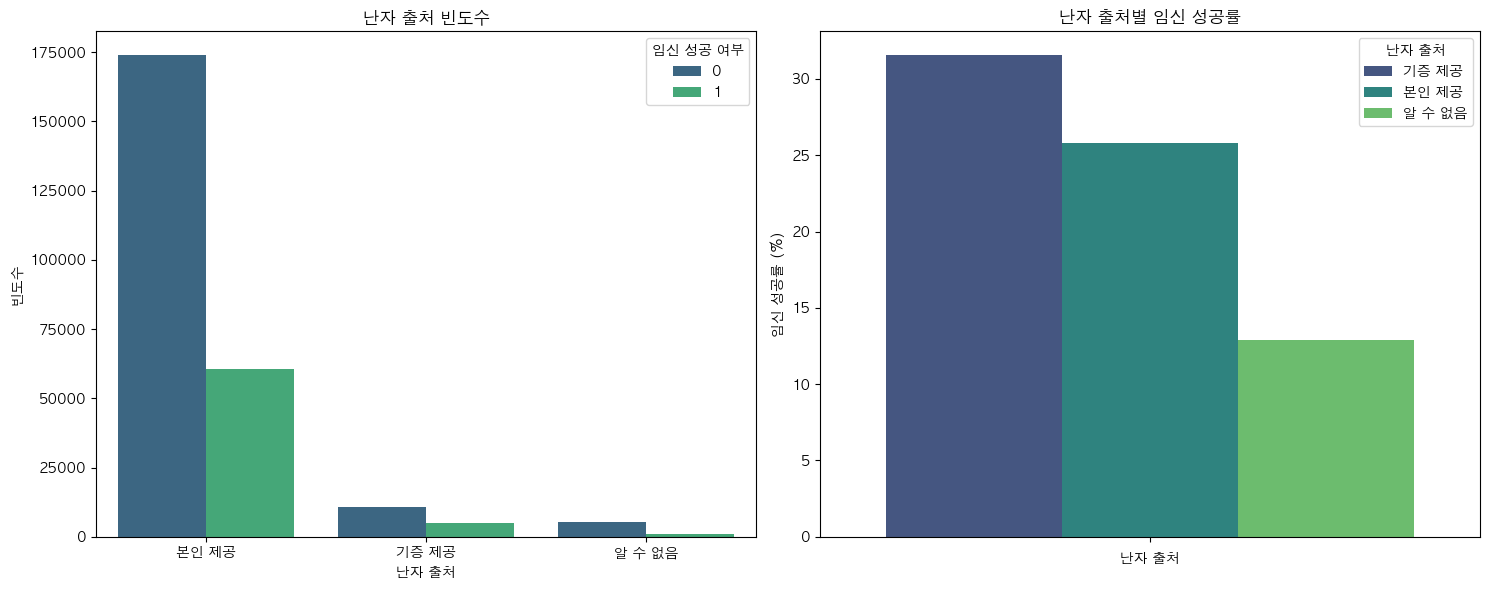


=== 난자 출처 ===

값별 통계:
         count   mean
난자 출처                
기증 제공    15769  31.54
본인 제공   234291  25.80
알 수 없음    6291  12.89

교차표 (%):
임신 성공 여부          0          1
난자 출처                         
기증 제공     68.457099  31.542901
본인 제공     74.201741  25.798259
알 수 없음    87.108568  12.891432


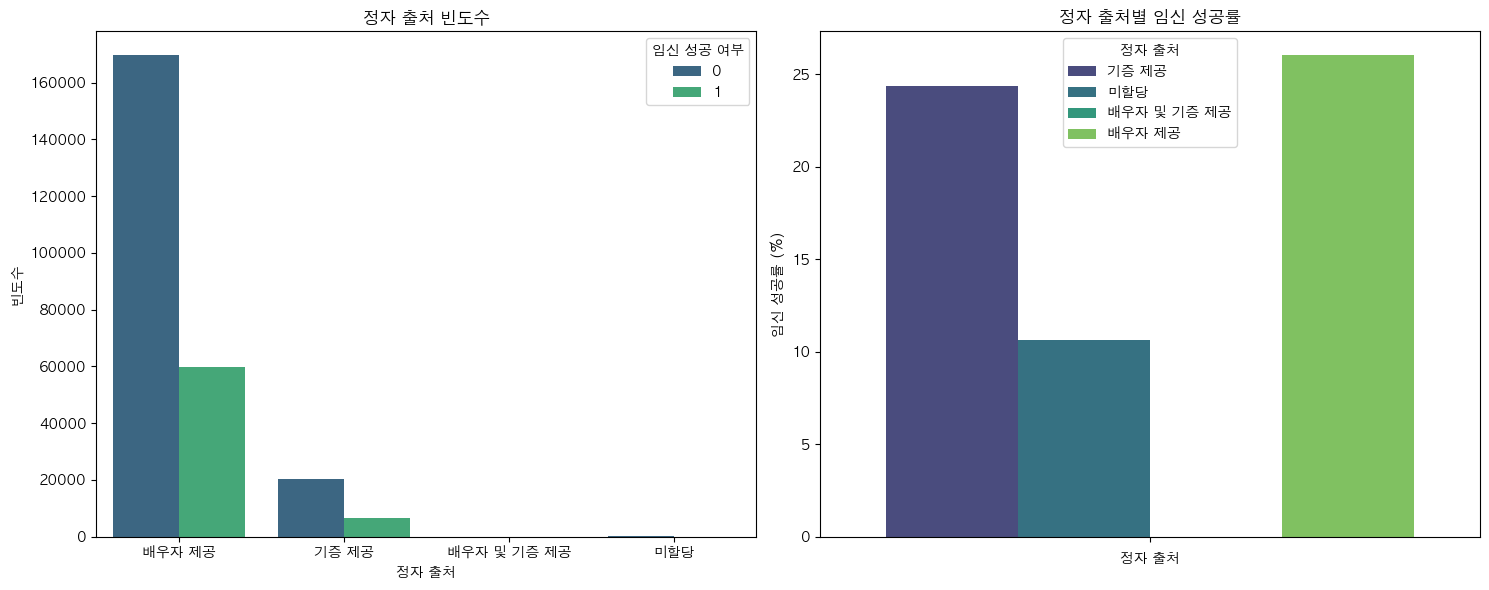


=== 정자 출처 ===

값별 통계:
              count   mean
정자 출처                     
기증 제공         27016  24.37
미할당             122  10.66
배우자 및 기증 제공      14   0.00
배우자 제공       229199  26.02

교차표 (%):
임신 성공 여부              0          1
정자 출처                             
기증 제공         75.625555  24.374445
미할당           89.344262  10.655738
배우자 및 기증 제공  100.000000   0.000000
배우자 제공        73.983307  26.016693


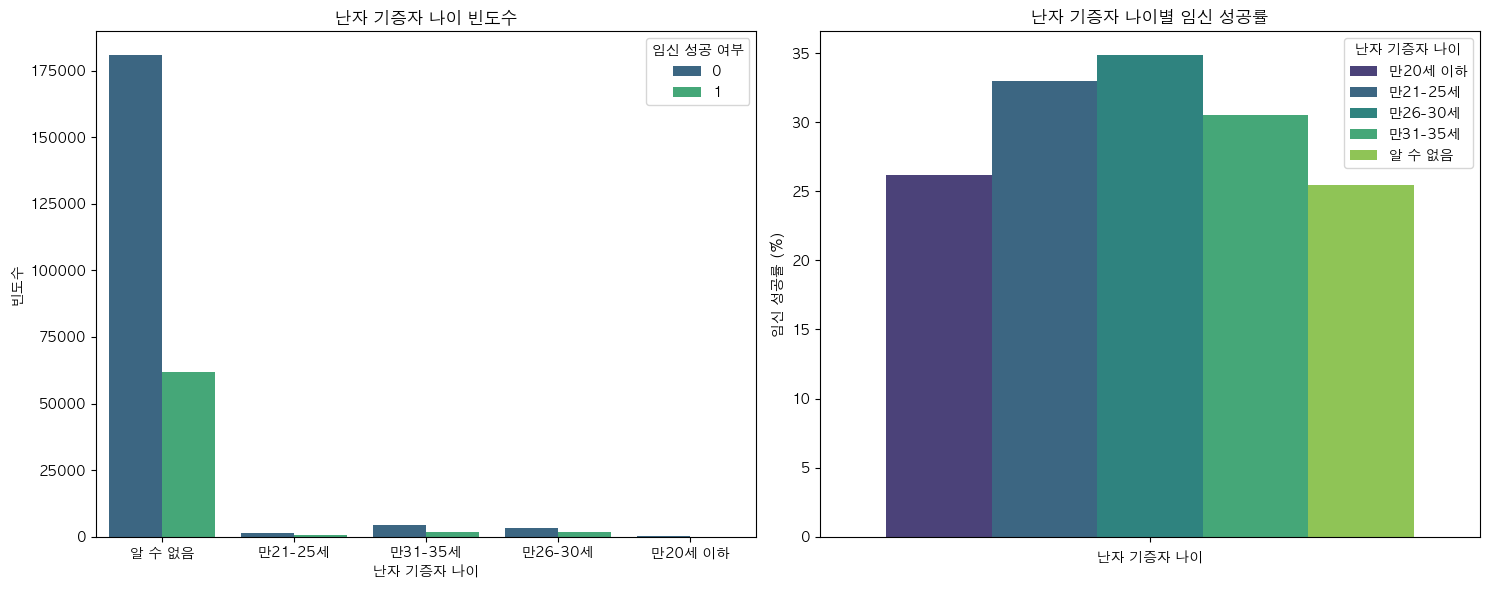


=== 난자 기증자 나이 ===

값별 통계:
            count   mean
난자 기증자 나이               
만20세 이하       294  26.19
만21-25세      2334  32.99
만26-30세      4976  34.83
만31-35세      6366  30.52
알 수 없음     242381  25.46

교차표 (%):
임신 성공 여부           0          1
난자 기증자 나이                      
만20세 이하    73.809524  26.190476
만21-25세    67.009426  32.990574
만26-30세    65.172830  34.827170
만31-35세    69.478479  30.521521
알 수 없음     74.542146  25.457854


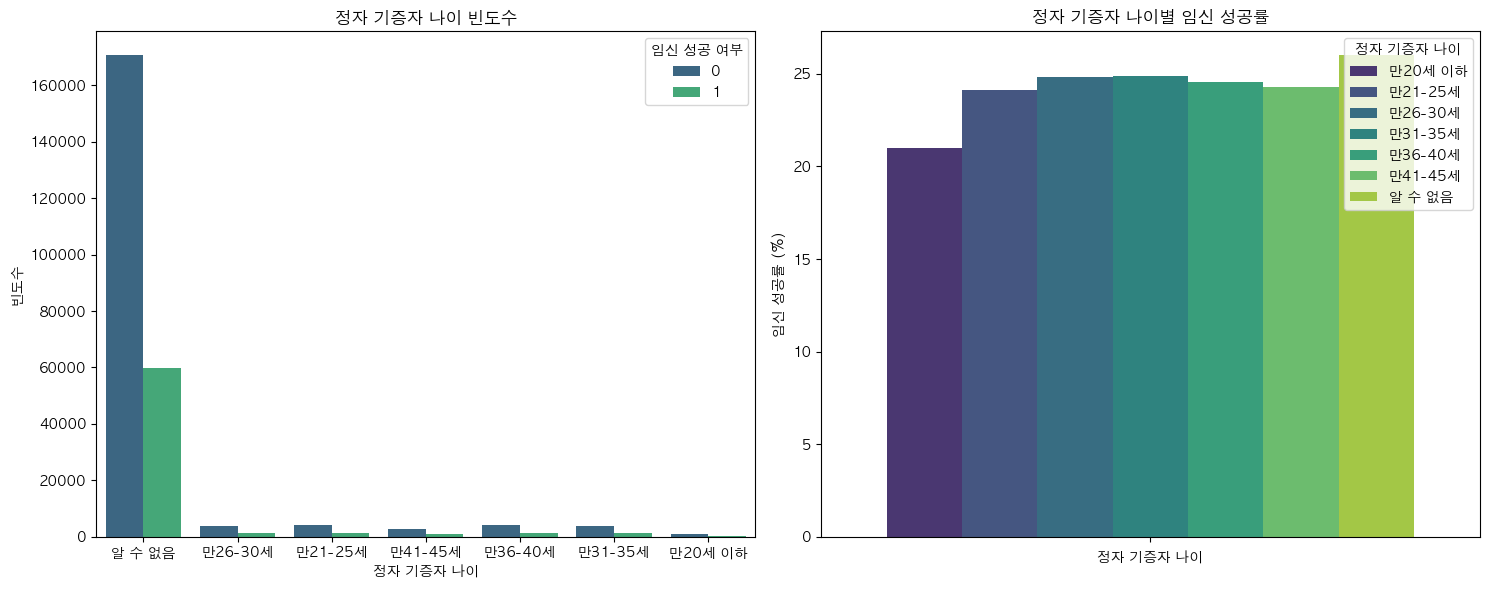


=== 정자 기증자 나이 ===

값별 통계:
            count   mean
정자 기증자 나이               
만20세 이하      1067  20.99
만21-25세      5667  24.14
만26-30세      5058  24.81
만31-35세      4911  24.86
만36-40세      5282  24.57
만41-45세      3848  24.30
알 수 없음     230518  26.00

교차표 (%):
임신 성공 여부           0          1
정자 기증자 나이                      
만20세 이하    79.006560  20.993440
만21-25세    75.860244  24.139756
만26-30세    75.187821  24.812179
만31-35세    75.137447  24.862553
만36-40세    75.425975  24.574025
만41-45세    75.701663  24.298337
알 수 없음     74.003332  25.996668


In [120]:
donor_source_info["임신 성공 여부"] = train["임신 성공 여부"]
# 범주형 데이터 빈도수 분석
categorical_columns = donor_source_info.select_dtypes(include=['object']).columns


# 시각화
for col in donor_source_info.columns:
    if col == '임신 성공 여부':
        continue 
    plt.figure(figsize=(15, 6))
    
    # 왼쪽: 빈도수 시각화
    plt.subplot(1, 2, 1)
    sns.countplot(data=donor_source_info, x=col, hue='임신 성공 여부', palette='viridis')
    plt.title(f'{col} 빈도수')
    plt.xlabel(col)
    plt.ylabel('빈도수')
    plt.legend(title='임신 성공 여부')
    
    # 오른쪽: 임신 성공률 시각화
    plt.subplot(1, 2, 2)
    
    # 임신 성공률 계산
    success_rates = donor_source_info.groupby(col)['임신 성공 여부'].agg(['count', 'mean'])
    success_rates['mean'] = success_rates['mean'] * 100  # 백분율로 변환

    # y축 최대값 가져오기
    y_max = success_rates['mean'].max()
    
    # 막대 그래프 그리기
    sns.barplot(hue=success_rates.index, y=success_rates['mean'], palette='viridis')
    plt.title(f'{col}별 임신 성공률')
    plt.xlabel(col)
    plt.ylabel('임신 성공률 (%)')
    
    plt.tight_layout()
    plt.show()

    # 통계 정보 출력
    print(f"\n=== {col} ===")
    print("\n값별 통계:")
    print(success_rates.round(2))
    print("\n교차표 (%):")
    print(pd.crosstab(donor_source_info[col], 
                     donor_source_info['임신 성공 여부'], 
                     normalize='index') * 100)
    print("="*50)

## 7. 특수 시술 관련 컬럼
* 동결 배아 사용 여부
* 신선 배아 사용 여부
* 기증 배아 사용 여부
* 대리모 여부
* PGD 시술 여부
* PGS 시술 여부
---
* PGD, PGS는 결측치가 너무 많아서 사실상 쓸모없는 데이터이고,
* 나머지는 동일한 행에 결측치가 존재하는 것으로 보임.

In [95]:
special_procedure_info = train[columns_dict['특수 시술']].copy()
# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(special_procedure_info.dtypes)

# 결측치 개수 출력 (비율 포함)
missing_values = special_procedure_info.isnull().sum()
missing_percent = (missing_values / len(special_procedure_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())


📌 [배란 및 배아 관련 컬럼별 데이터 타입]
동결 배아 사용 여부    float64
신선 배아 사용 여부    float64
기증 배아 사용 여부    float64
대리모 여부         float64
PGD 시술 여부      float64
PGS 시술 여부      float64
dtype: object

📌 [배란 및 배아 관련 결측치 개수 및 비율]
             결측치 개수  결측치 비율(%)
동결 배아 사용 여부    6291   2.454057
신선 배아 사용 여부    6291   2.454057
기증 배아 사용 여부    6291   2.454057
대리모 여부         6291   2.454057
PGD 시술 여부    254172  99.149994
PGS 시술 여부    254422  99.247516


<Figure size 1000x500 with 0 Axes>

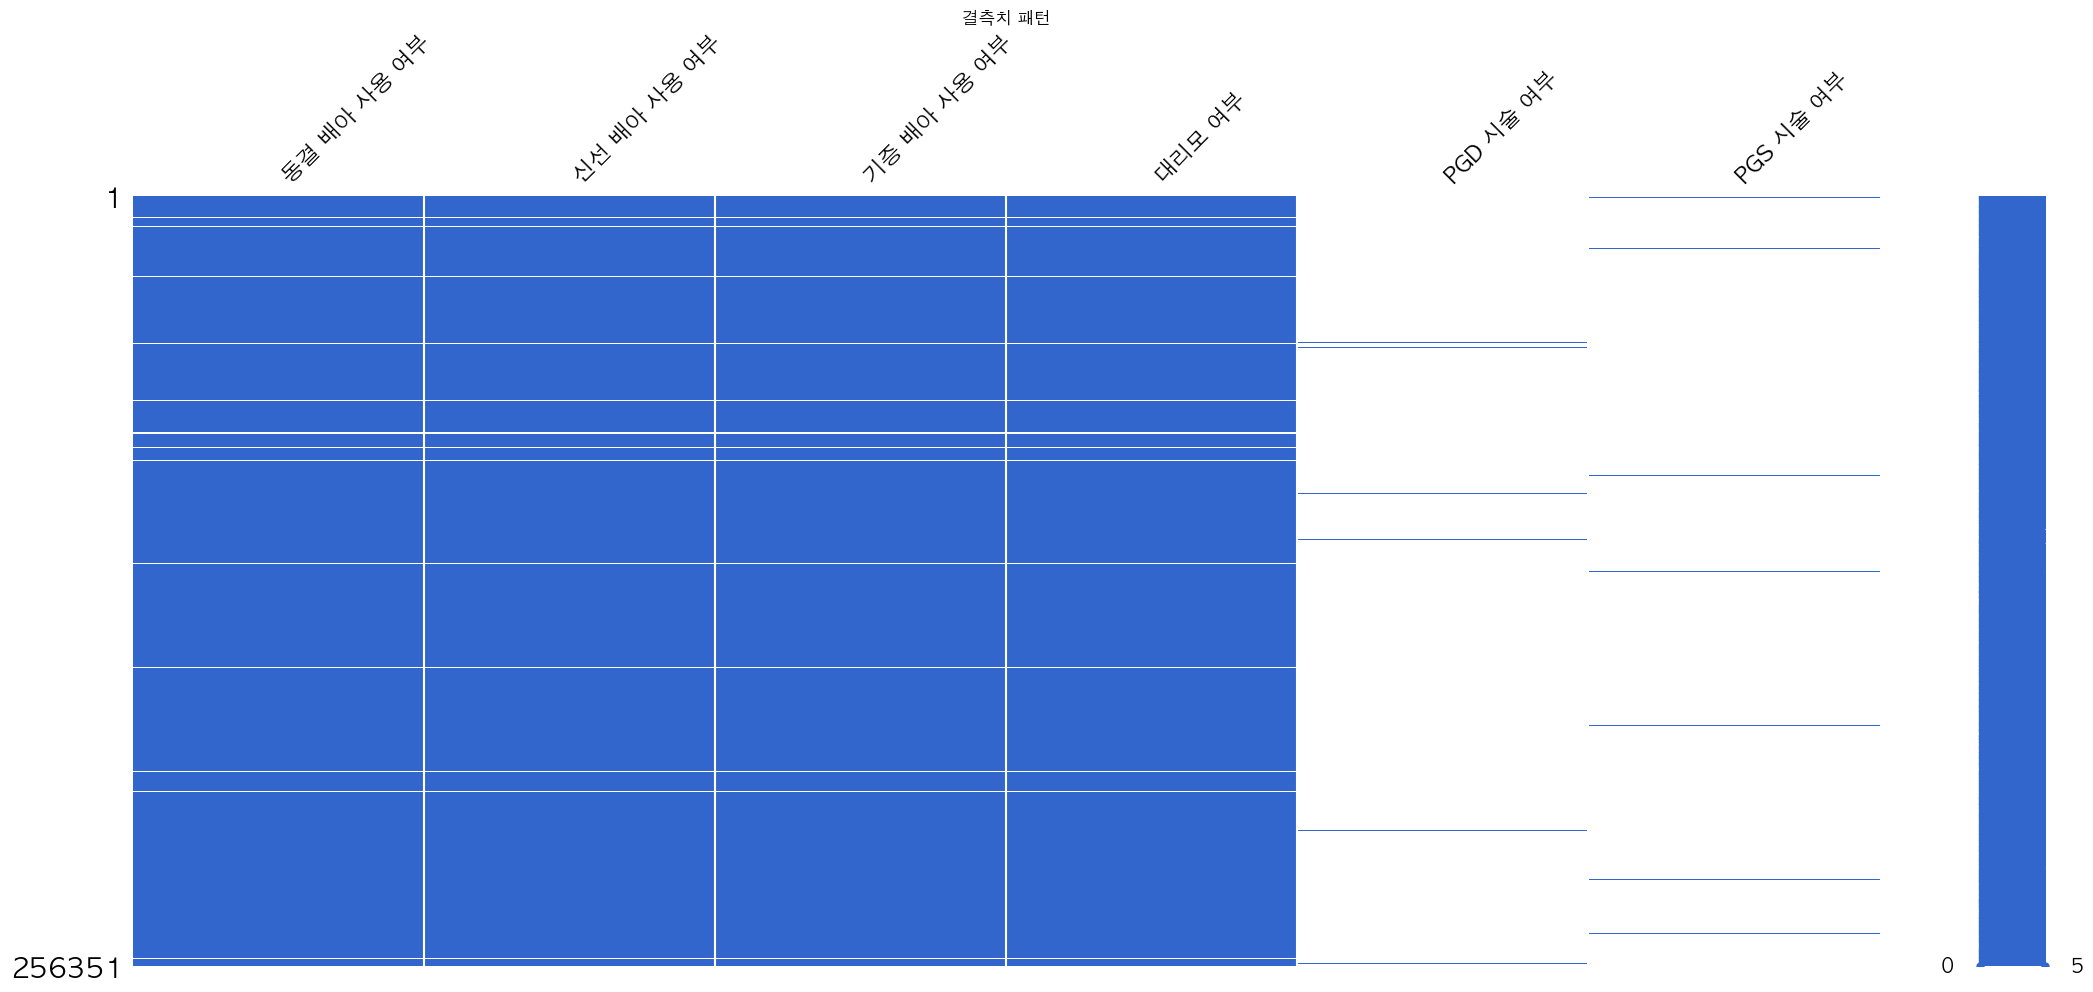

In [96]:
# 📌 3️⃣ 결측치 행렬 그래프
plt.figure(figsize=(10, 5))
msno.matrix(special_procedure_info, color=(0.2, 0.4, 0.8))  # 결측치를 색상으로 표현
plt.title("결측치 패턴")
plt.show()

In [97]:
# 결측치가 있는 행을 출력해서 패턴 확인
special_procedure_info[special_procedure_info['동결 배아 사용 여부'].isnull()].head(7)

동결 배아 사용 여부  신선 배아 사용 여부  기증 배아 사용 여부  대리모 여부  PGD 시술 여부  PGS 시술 여부
14           NaN          NaN          NaN     NaN        NaN        NaN
39           NaN          NaN          NaN     NaN        NaN        NaN
127          NaN          NaN          NaN     NaN        NaN        NaN
162          NaN          NaN          NaN     NaN        NaN        NaN
174          NaN          NaN          NaN     NaN        NaN        NaN
178          NaN          NaN          NaN     NaN        NaN        NaN
200          NaN          NaN          NaN     NaN        NaN        NaN

In [98]:
# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in special_procedure_info.columns:
    n_unique = special_procedure_info[col].nunique()
    unique_values = special_procedure_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    print(f"- 값별 빈도수:")
    print(special_procedure_info[col].value_counts().to_string())
    print("-" * 50)


📌 [배란 및 배아 관련 컬럼별 Unique Values]

동결 배아 사용 여부:
- Unique 값 개수: 2
- Unique 값 목록: [ 0.  1. nan]
- 값별 빈도수:
동결 배아 사용 여부
0.0    209934
1.0     40126
--------------------------------------------------

신선 배아 사용 여부:
- Unique 값 개수: 2
- Unique 값 목록: [ 1.  0. nan]
- 값별 빈도수:
신선 배아 사용 여부
1.0    210136
0.0     39924
--------------------------------------------------

기증 배아 사용 여부:
- Unique 값 개수: 2
- Unique 값 목록: [ 0. nan  1.]
- 값별 빈도수:
기증 배아 사용 여부
0.0    247602
1.0      2458
--------------------------------------------------

대리모 여부:
- Unique 값 개수: 2
- Unique 값 목록: [ 0. nan  1.]
- 값별 빈도수:
대리모 여부
0.0    249011
1.0      1049
--------------------------------------------------

PGD 시술 여부:
- Unique 값 개수: 1
- Unique 값 목록: [nan  1.]
- 값별 빈도수:
PGD 시술 여부
1.0    2179
--------------------------------------------------

PGS 시술 여부:
- Unique 값 개수: 1
- Unique 값 목록: [nan  1.]
- 값별 빈도수:
PGS 시술 여부
1.0    1929
--------------------------------------------------


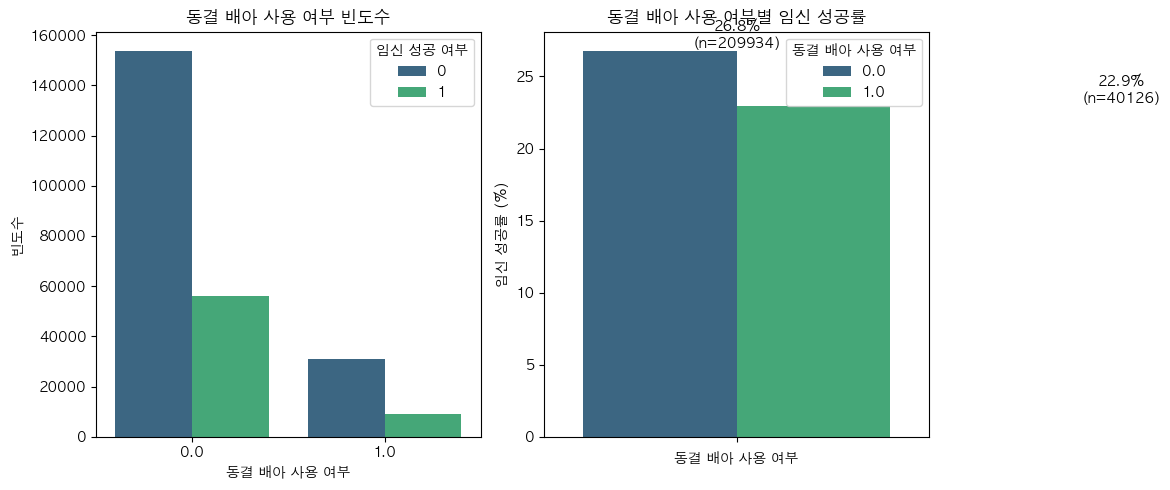


=== 동결 배아 사용 여부 ===

값별 통계:
              count   mean
동결 배아 사용 여부               
0.0          209934  26.78
1.0           40126  22.94

교차표 (%):
임신 성공 여부             0          1
동결 배아 사용 여부                      
0.0          73.223966  26.776034
1.0          77.059762  22.940238


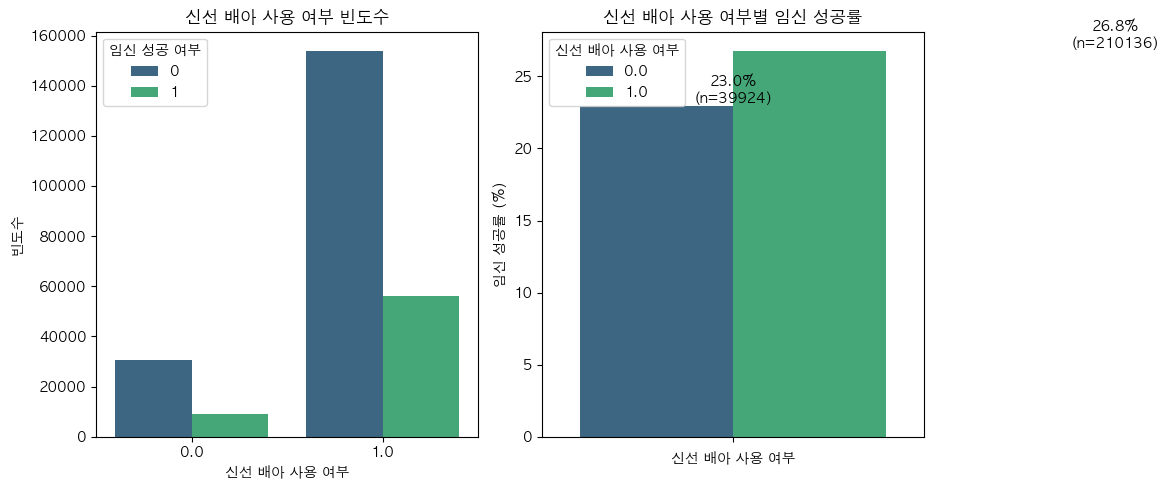


=== 신선 배아 사용 여부 ===

값별 통계:
              count   mean
신선 배아 사용 여부               
0.0           39924  22.96
1.0          210136  26.77

교차표 (%):
임신 성공 여부             0          1
신선 배아 사용 여부                      
0.0          77.041379  22.958621
1.0          73.231146  26.768854


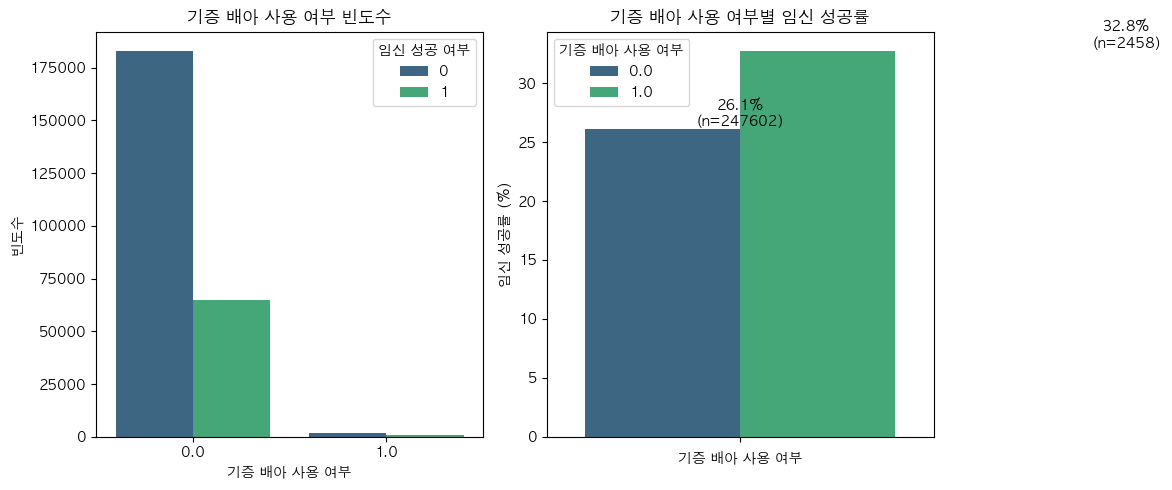


=== 기증 배아 사용 여부 ===

값별 통계:
              count   mean
기증 배아 사용 여부               
0.0          247602  26.10
1.0            2458  32.75

교차표 (%):
임신 성공 여부             0          1
기증 배아 사용 여부                      
0.0          73.904896  26.095104
1.0          67.249797  32.750203


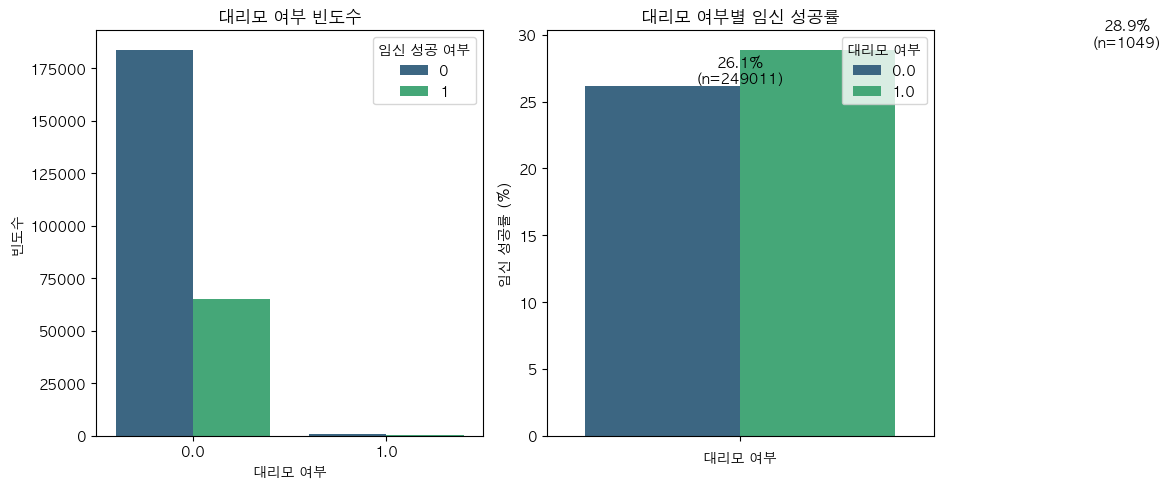


=== 대리모 여부 ===

값별 통계:
         count   mean
대리모 여부               
0.0     249011  26.15
1.0       1049  28.88

교차표 (%):
임신 성공 여부          0          1
대리모 여부                        
0.0       73.850954  26.149046
1.0       71.115348  28.884652


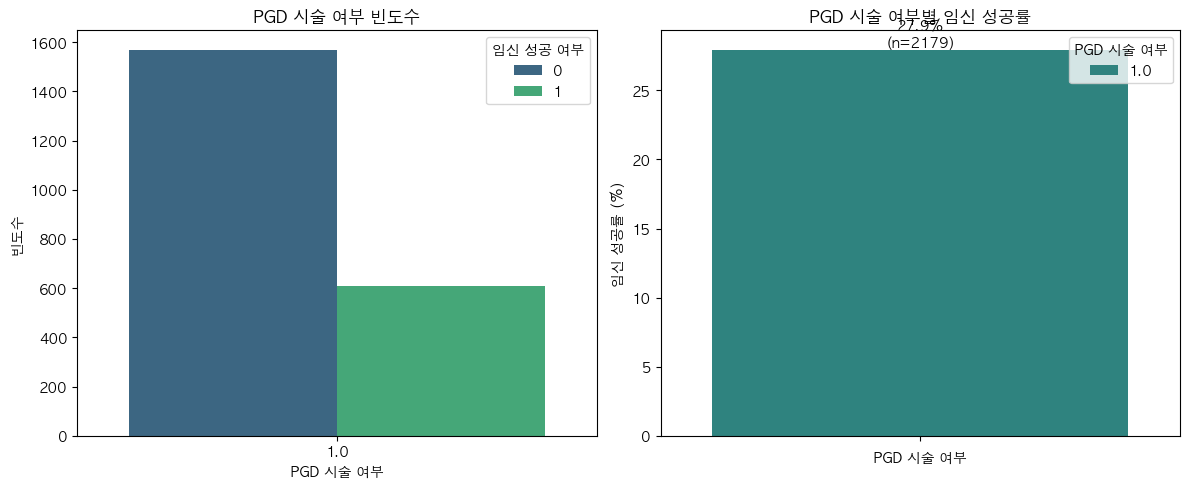


=== PGD 시술 여부 ===

값별 통계:
           count   mean
PGD 시술 여부              
1.0         2179  27.95

교차표 (%):
임신 성공 여부         0        1
PGD 시술 여부                  
1.0        72.0514  27.9486


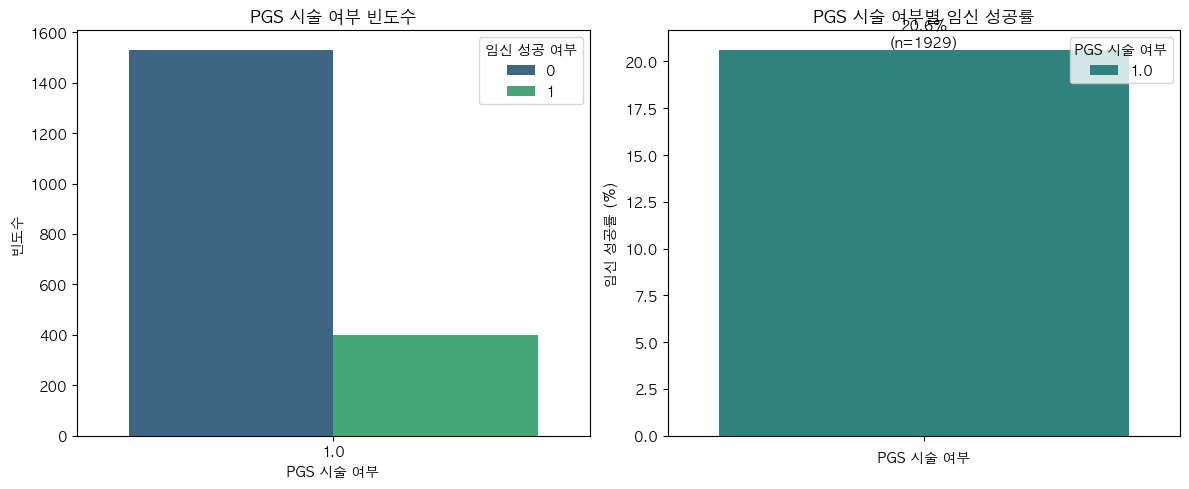


=== PGS 시술 여부 ===

값별 통계:
           count   mean
PGS 시술 여부              
1.0         1929  20.63

교차표 (%):
임신 성공 여부           0          1
PGS 시술 여부                      
1.0        79.367548  20.632452


In [104]:
special_procedure_info["임신 성공 여부"] = train["임신 성공 여부"]

# 시각화
for col in special_procedure_info.columns:
    if col == '임신 성공 여부':
        continue
        
    plt.figure(figsize=(12, 5))
    
    # 왼쪽: 빈도수 시각화
    plt.subplot(1, 2, 1)
    sns.countplot(data=special_procedure_info, x=col, hue='임신 성공 여부', palette='viridis')
    plt.title(f'{col} 빈도수')
    plt.xlabel(col)
    plt.ylabel('빈도수')
    plt.legend(title='임신 성공 여부')
    
    # 오른쪽: 임신 성공률 시각화
    plt.subplot(1, 2, 2)
    
    # 임신 성공률 계산
    success_rates = special_procedure_info.groupby(col)['임신 성공 여부'].agg(['count', 'mean'])
    success_rates['mean'] = success_rates['mean'] * 100  # 백분율로 변환
    
    # 막대 그래프 그리기
    sns.barplot(hue=success_rates.index, y=success_rates['mean'], palette='viridis')
    plt.title(f'{col}별 임신 성공률')
    plt.xlabel(col)
    plt.ylabel('임신 성공률 (%)')
    
    # 각 막대 위에 성공률과 샘플 수 표시
    for i, (_, row) in enumerate(success_rates.iterrows()):
        count = int(row['count'])
        rate = row['mean']
        plt.text(i, rate, f'{rate:.1f}%\n(n={count})', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 통계 정보 출력
    print(f"\n=== {col} ===")
    print("\n값별 통계:")
    print(success_rates.round(2))
    print("\n교차표 (%):")
    print(pd.crosstab(special_procedure_info[col], 
                     special_procedure_info['임신 성공 여부'], 
                     normalize='index') * 100)
    print("="*50)

## 8. 시술 진행 과정 관련 컬럼
* `난자 채취 경과일`
  * Unique Value : 1
* `난자 해동 경과일`
  * 결측치 비율이 너무 높음. 99%
  * Unique Value : 2
* `난자 혼합 경과일`
  * Unique Value : 8
* `배아 이식 경과일`
  * Unique Value : 8
* `배아 해동 경과일`
  * 결측치 비율이 너무 높음. 84%
  * Unique Value : 8
---
* 모두 float64 타입, 결측치 16 ~ 22 %
* 난자 채취랑 난자 혼합은 동일한 행 결측치 발생한 것으로 보임.

In [89]:
procedure_timeline_info = train[columns_dict['시술 진행 과정']].copy()
# 데이터 타입 출력
print("\n📌 [배란 및 배아 관련 컬럼별 데이터 타입]")
print(procedure_timeline_info.dtypes)

# 결측치 개수 출력 (비율 포함)
missing_values = procedure_timeline_info.isnull().sum()
missing_percent = (missing_values / len(procedure_timeline_info)) * 100

print("\n📌 [배란 및 배아 관련 결측치 개수 및 비율]")
print(pd.DataFrame({
    "결측치 개수": missing_values, 
    "결측치 비율(%)": missing_percent
}).to_string())


📌 [배란 및 배아 관련 컬럼별 데이터 타입]
난자 채취 경과일    float64
난자 해동 경과일    float64
난자 혼합 경과일    float64
배아 이식 경과일    float64
배아 해동 경과일    float64
dtype: object

📌 [배란 및 배아 관련 결측치 개수 및 비율]
           결측치 개수  결측치 비율(%)
난자 채취 경과일   57488  22.425503
난자 해동 경과일  254915  99.439831
난자 혼합 경과일   53735  20.961494
배아 이식 경과일   43566  16.994667
배아 해동 경과일  215982  84.252451


<Figure size 1000x500 with 0 Axes>

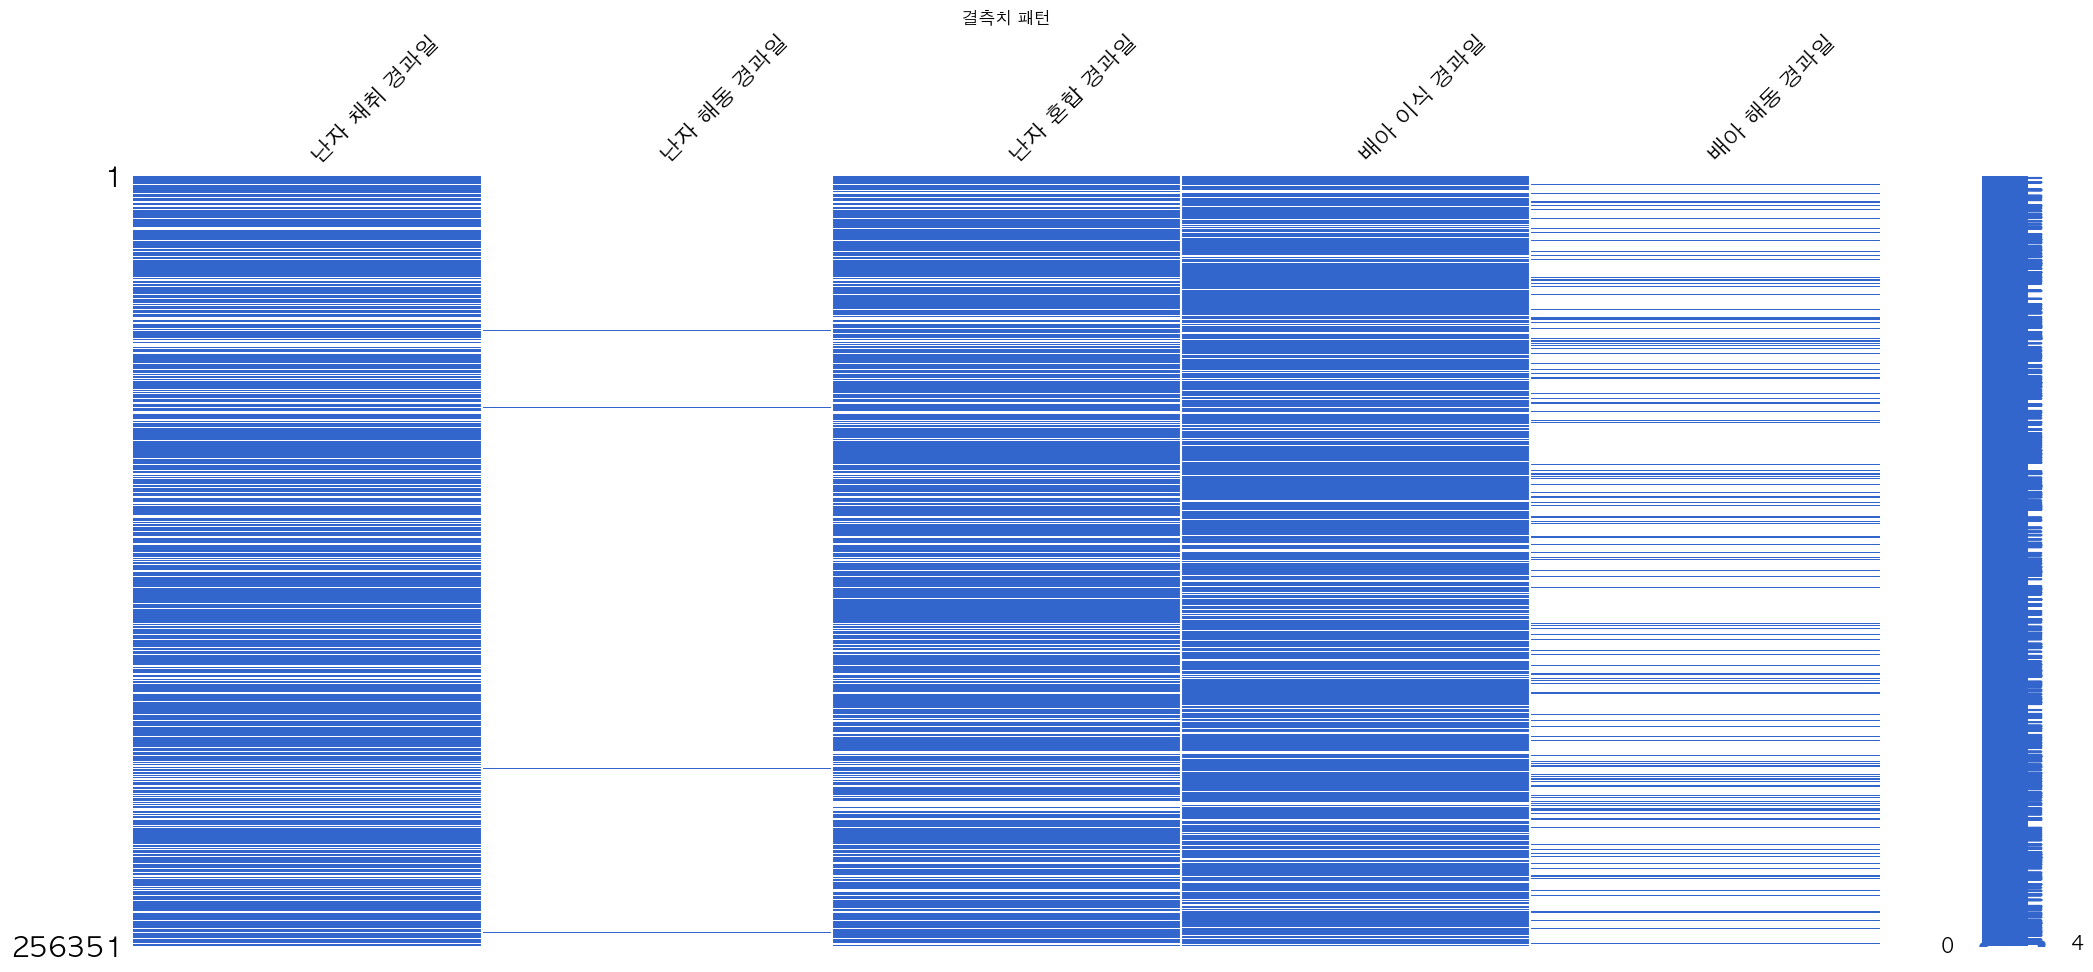

In [90]:
# 📌 3️⃣ 결측치 행렬 그래프
plt.figure(figsize=(10, 5))
msno.matrix(procedure_timeline_info, color=(0.2, 0.4, 0.8))  # 결측치를 색상으로 표현
plt.title("결측치 패턴")
plt.show()

In [91]:
# 컬럼별 unique value 확인
print("\n📌 [배란 및 배아 관련 컬럼별 Unique Values]")
for col in procedure_timeline_info.columns:
    n_unique = procedure_timeline_info[col].nunique()
    unique_values = procedure_timeline_info[col].unique()
    print(f"\n{col}:")
    print(f"- Unique 값 개수: {n_unique}")
    print(f"- Unique 값 목록: {unique_values}")
    print(f"- 값별 빈도수:")
    print(procedure_timeline_info[col].value_counts().to_string())
    print("-" * 50)


📌 [배란 및 배아 관련 컬럼별 Unique Values]

난자 채취 경과일:
- Unique 값 개수: 1
- Unique 값 목록: [ 0. nan]
- 값별 빈도수:
난자 채취 경과일
0.0    198863
--------------------------------------------------

난자 해동 경과일:
- Unique 값 개수: 2
- Unique 값 목록: [nan  0.  1.]
- 값별 빈도수:
난자 해동 경과일
0.0    1434
1.0       2
--------------------------------------------------

난자 혼합 경과일:
- Unique 값 개수: 8
- Unique 값 목록: [ 0. nan  3.  2.  1.  5.  6.  4.  7.]
- 값별 빈도수:
난자 혼합 경과일
0.0    201920
1.0       488
2.0       102
3.0        68
5.0        24
6.0         8
4.0         5
7.0         1
--------------------------------------------------

배아 이식 경과일:
- Unique 값 개수: 8
- Unique 값 목록: [ 3. nan  2.  5.  1.  0.  4.  6.  7.]
- 값별 빈도수:
배아 이식 경과일
5.0    81459
3.0    57924
2.0    35078
0.0    24904
1.0     6053
4.0     4504
6.0     2773
7.0       90
--------------------------------------------------

배아 해동 경과일:
- Unique 값 개수: 8
- Unique 값 목록: [nan  0.  5.  3.  2.  6.  1.  4.  7.]
- 값별 빈도수:
배아 해동 경과일
0.0    39801
2.0      182
3.0      164
5.0      14

In [92]:
procedure_timeline_info["임신 성공 여부"] = train["임신 성공 여부"]

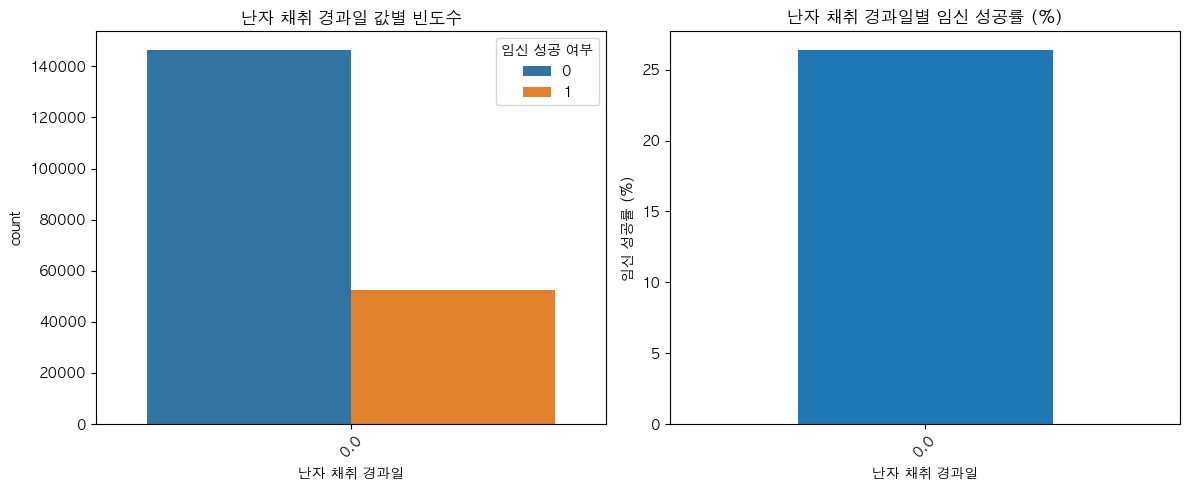


=== 난자 채취 경과일 ===

값별 임신 성공률:
난자 채취 경과일
0.0    26.38
Name: 임신 성공 여부, dtype: float64

교차표:
임신 성공 여부           0          1
난자 채취 경과일                      
0.0        73.618521  26.381479


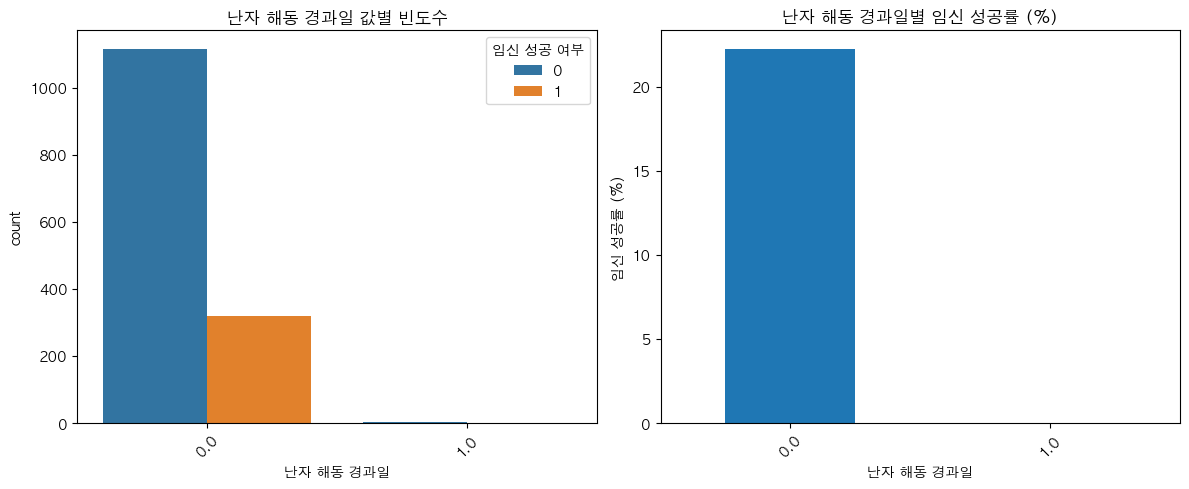


=== 난자 해동 경과일 ===

값별 임신 성공률:
난자 해동 경과일
0.0    22.25
1.0     0.00
Name: 임신 성공 여부, dtype: float64

교차표:
임신 성공 여부            0          1
난자 해동 경과일                       
0.0         77.754533  22.245467
1.0        100.000000   0.000000


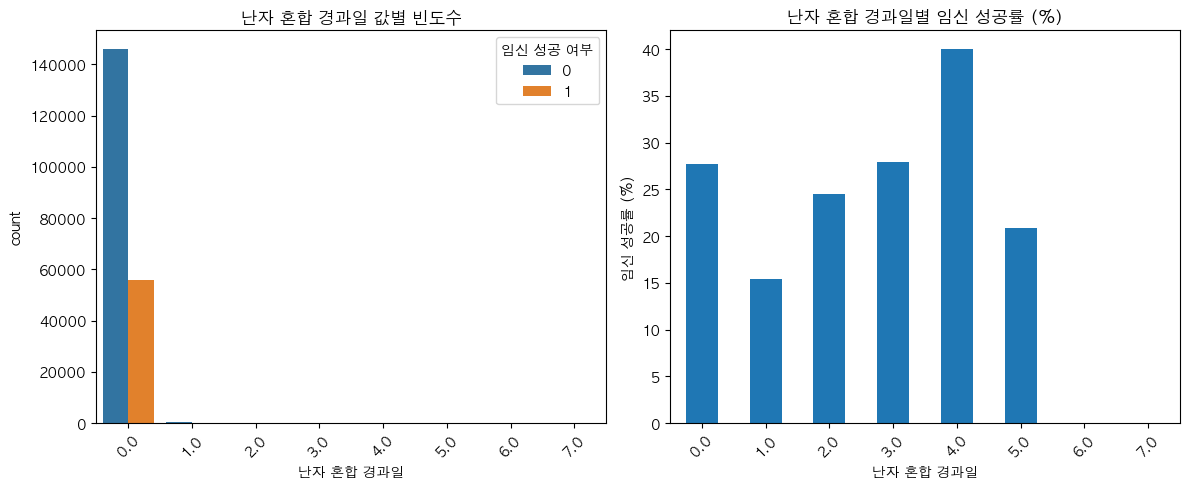


=== 난자 혼합 경과일 ===

값별 임신 성공률:
난자 혼합 경과일
0.0    27.71
1.0    15.37
2.0    24.51
3.0    27.94
4.0    40.00
5.0    20.83
6.0     0.00
7.0     0.00
Name: 임신 성공 여부, dtype: float64

교차표:
임신 성공 여부            0          1
난자 혼합 경과일                       
0.0         72.292492  27.707508
1.0         84.631148  15.368852
2.0         75.490196  24.509804
3.0         72.058824  27.941176
4.0         60.000000  40.000000
5.0         79.166667  20.833333
6.0        100.000000   0.000000
7.0        100.000000   0.000000


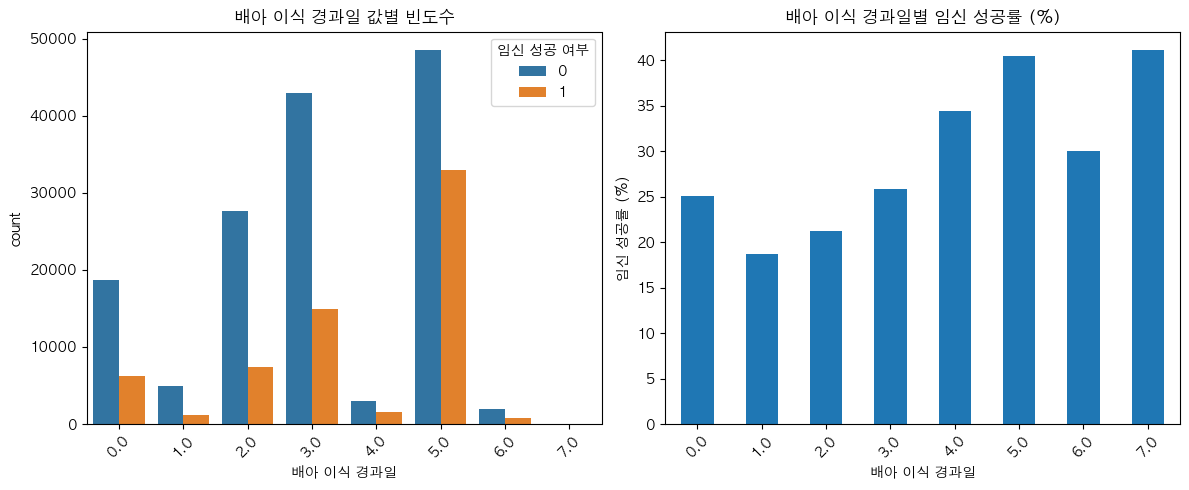


=== 배아 이식 경과일 ===

값별 임신 성공률:
배아 이식 경과일
0.0    25.10
1.0    18.70
2.0    21.25
3.0    25.88
4.0    34.44
5.0    40.44
6.0    30.00
7.0    41.11
Name: 임신 성공 여부, dtype: float64

교차표:
임신 성공 여부           0          1
배아 이식 경과일                      
0.0        74.895599  25.104401
1.0        81.298530  18.701470
2.0        78.753065  21.246935
3.0        74.122989  25.877011
4.0        65.563943  34.436057
5.0        59.555114  40.444886
6.0        69.996394  30.003606
7.0        58.888889  41.111111


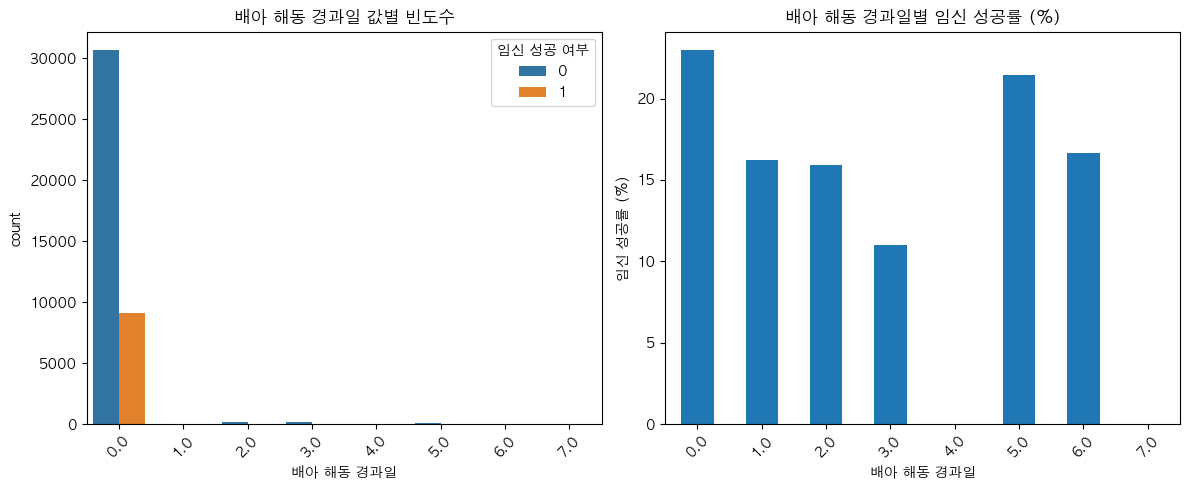


=== 배아 해동 경과일 ===

값별 임신 성공률:
배아 해동 경과일
0.0    22.97
1.0    16.22
2.0    15.93
3.0    10.98
4.0     0.00
5.0    21.43
6.0    16.67
7.0     0.00
Name: 임신 성공 여부, dtype: float64

교차표:
임신 성공 여부            0          1
배아 해동 경과일                       
0.0         77.033240  22.966760
1.0         83.783784  16.216216
2.0         84.065934  15.934066
3.0         89.024390  10.975610
4.0        100.000000   0.000000
5.0         78.571429  21.428571
6.0         83.333333  16.666667
7.0        100.000000   0.000000


In [94]:
# 시각화
for col in procedure_timeline_info.columns:
    if col == '임신 성공 여부':
        continue
        
    plt.figure(figsize=(12, 5))
    
    # 1. Countplot - 전체 빈도수
    plt.subplot(1, 2, 1)
    sns.countplot(data=procedure_timeline_info, x=col, hue='임신 성공 여부')
    plt.title(f'{col} 값별 빈도수')
    plt.xticks(rotation=45)
    
    # 2. 임신 성공률 계산 및 시각화
    plt.subplot(1, 2, 2)
    success_rate = procedure_timeline_info.groupby(col)['임신 성공 여부'].mean() * 100
    success_rate.plot(kind='bar')
    plt.title(f'{col}별 임신 성공률 (%)')
    plt.ylabel('임신 성공률 (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 통계 정보 출력
    print(f"\n=== {col} ===")
    print("\n값별 임신 성공률:")
    print(success_rate.round(2))
    print("\n교차표:")
    print(pd.crosstab(procedure_timeline_info[col], 
                     procedure_timeline_info['임신 성공 여부'], 
                     normalize='index') * 100)
    print("="*50)

## `임신 성공 여부` 분포

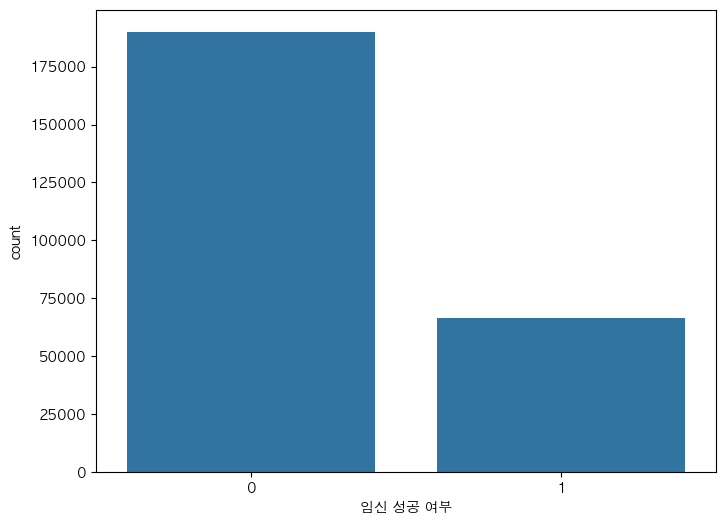

In [19]:
# 타겟 변수의 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='임신 성공 여부')
plt.show()

- 결측치 처리
    - PGD, PGS 시술 여부는 결측치가 너무 많아 제거 고려
    - 나머지 결측치들은 패턴이 있는 것으로 보이므로, 해당 패턴 분석 후 적절한 처리 방법 결정
- 범주형 변수 인코딩
    - 배란 유도 유형 등의 범주형 변수들에 대한 적절한 인코딩 방식 선택

# 상관관계 분석

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


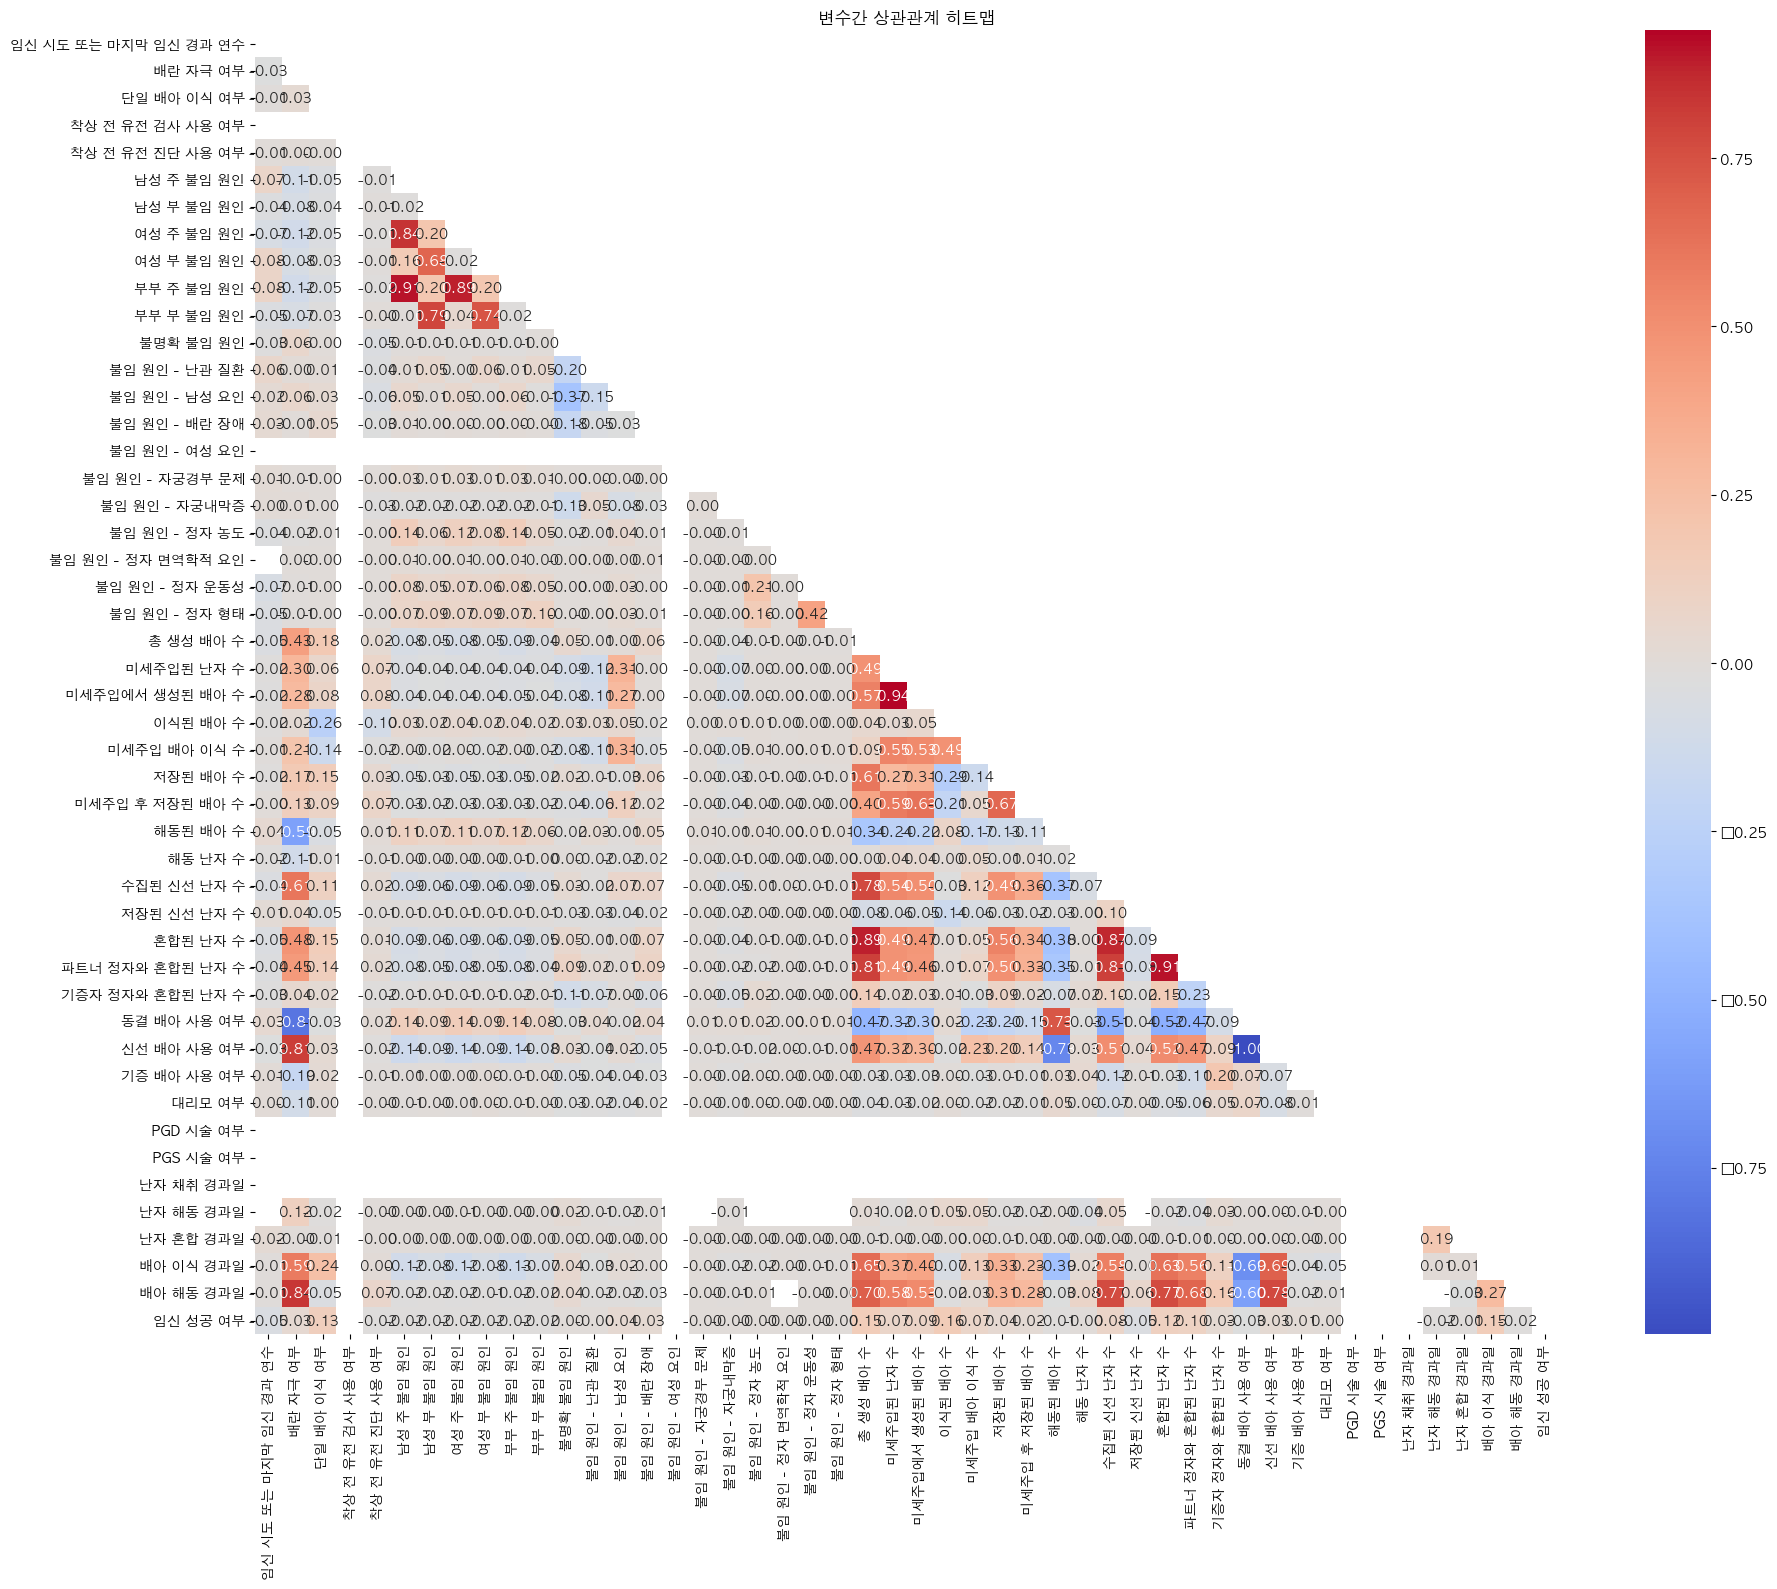

In [3]:
# 1. 수치형 변수들의 상관관계 분석
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# 상관계수 행렬 계산
correlation_matrix = train[numeric_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, 
            annot=True,  # 상관계수 표시
            fmt='.2f',   # 소수점 2자리까지
            cmap='coolwarm',  # 색상 맵
            square=True,     # 정사각형 형태로
            mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))  # 상삼각행렬만 표시
           )
plt.title('변수간 상관관계 히트맵')
plt.tight_layout()
plt.show()


/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


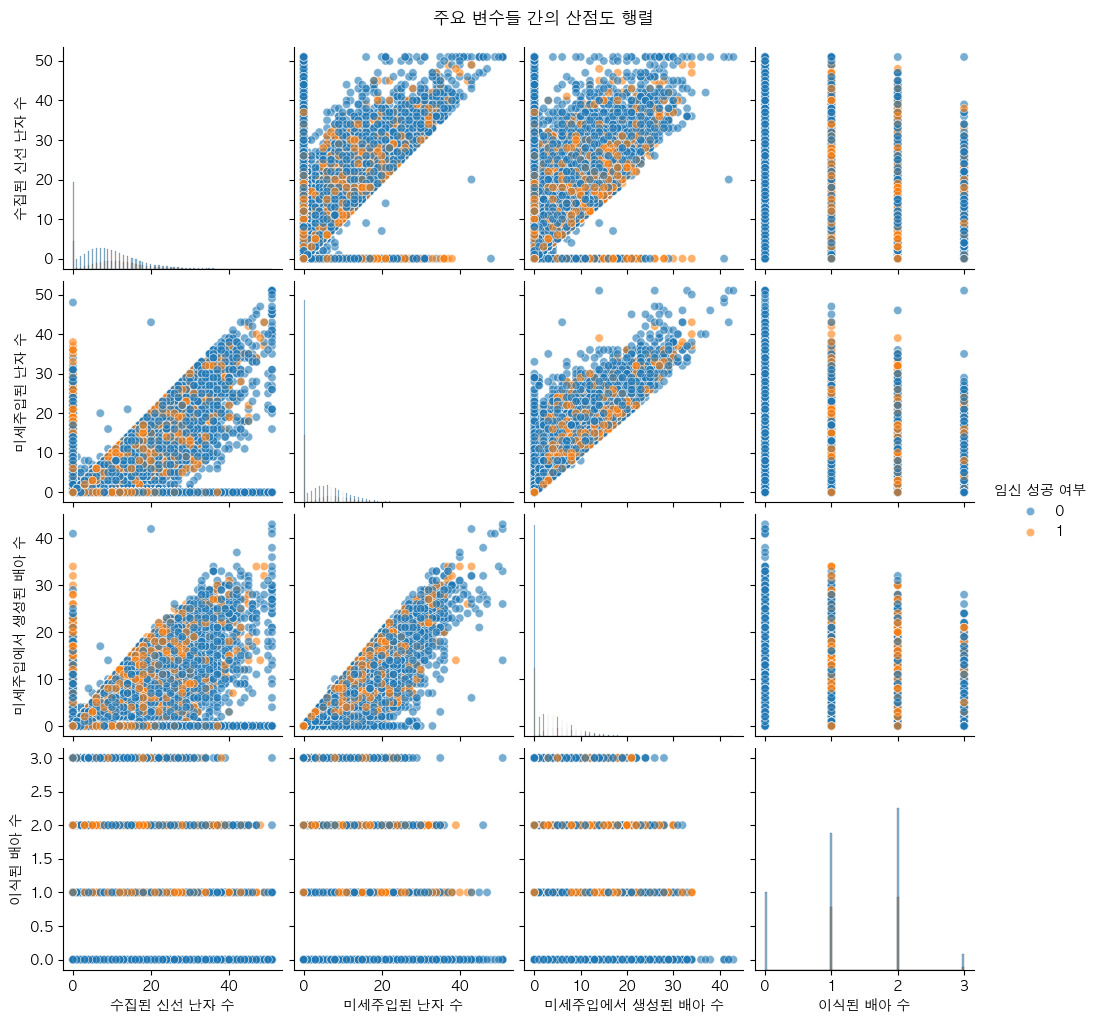

In [4]:
# 2. 주요 변수들 간의 산점도 (임신 성공 여부로 색상 구분)
important_features = [
    '수집된 신선 난자 수',
    '미세주입된 난자 수',
    '미세주입에서 생성된 배아 수',
    '이식된 배아 수'
]

# 산점도 행렬 그리기
sns.pairplot(train[important_features + ['임신 성공 여부']], 
             hue='임신 성공 여부',
             diag_kind='hist',
             plot_kws={'alpha': 0.6})
plt.suptitle('주요 변수들 간의 산점도 행렬', y=1.02)
plt.show()

In [5]:
# 3. 상관계수가 높은 변수쌍 확인
# 절대값 0.5 이상인 상관계수만 추출
high_correlation = np.where(np.abs(correlation_matrix) > 0.5)
high_correlation = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                   for x, y in zip(*high_correlation) if x != y]

print("\n=== 높은 상관관계를 보이는 변수쌍 (|상관계수| > 0.5) ===")
for var1, var2, corr in sorted(high_correlation, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} - {var2}: {corr:.3f}")


=== 높은 상관관계를 보이는 변수쌍 (|상관계수| > 0.5) ===
동결 배아 사용 여부 - 신선 배아 사용 여부: -0.997
신선 배아 사용 여부 - 동결 배아 사용 여부: -0.997
미세주입된 난자 수 - 미세주입에서 생성된 배아 수: 0.940
미세주입에서 생성된 배아 수 - 미세주입된 난자 수: 0.940
남성 주 불임 원인 - 부부 주 불임 원인: 0.914
부부 주 불임 원인 - 남성 주 불임 원인: 0.914
혼합된 난자 수 - 파트너 정자와 혼합된 난자 수: 0.913
파트너 정자와 혼합된 난자 수 - 혼합된 난자 수: 0.913
여성 주 불임 원인 - 부부 주 불임 원인: 0.893
부부 주 불임 원인 - 여성 주 불임 원인: 0.893
총 생성 배아 수 - 혼합된 난자 수: 0.892
혼합된 난자 수 - 총 생성 배아 수: 0.892
수집된 신선 난자 수 - 혼합된 난자 수: 0.872
혼합된 난자 수 - 수집된 신선 난자 수: 0.872
남성 주 불임 원인 - 여성 주 불임 원인: 0.842
여성 주 불임 원인 - 남성 주 불임 원인: 0.842
배란 자극 여부 - 배아 해동 경과일: 0.837
배아 해동 경과일 - 배란 자극 여부: 0.837
배란 자극 여부 - 신선 배아 사용 여부: 0.812
신선 배아 사용 여부 - 배란 자극 여부: 0.812
배란 자극 여부 - 동결 배아 사용 여부: -0.811
동결 배아 사용 여부 - 배란 자극 여부: -0.811
총 생성 배아 수 - 파트너 정자와 혼합된 난자 수: 0.811
파트너 정자와 혼합된 난자 수 - 총 생성 배아 수: 0.811
수집된 신선 난자 수 - 파트너 정자와 혼합된 난자 수: 0.810
파트너 정자와 혼합된 난자 수 - 수집된 신선 난자 수: 0.810
남성 부 불임 원인 - 부부 부 불임 원인: 0.793
부부 부 불임 원인 - 남성 부 불임 원인: 0.793
신선 배아 사용 여부 - 배아 해동 경과일: 0.780
배아 해동 경과일 - 신선 배아 사용 여부: 0.7